# Mentoría 7, Trabajo Práctico N° 3 - Grupo 2

Benitez, Macarena<br>
Castro Luna, Eduardo<br>
Gutierrez, Federico<br>
Wolowski, Mauro

## Tabla de Contenidos

0. [Importación de librerías y datasets](#0.-Importación-de-librerías-y-datasets)
1. [Visualización de los datasets](#1.-Visualización-de-los-datasets)
    1. [Visualización rápida de una muestra de cada dataset](#1.A.-Visualización-rápida-de-una-muestra-de-cada-dataset)
    2. [Tipos de datos y Descripciones Estadísticas de las Variables](#1.B.-Tipos-de-datos-y-Descripción-Estadística-de-las-Variables)
    3. [Estructura de datos faltantes](#1.C.-Estructura-de-datos-faltantes)
    4. [Valores outliers](#1.D.-Valores-outliers)
    5. [Verificación de Existencia de Muestras Repetidas](#1.E.-Verificación-de-Existencia-de-Muestas-Repetidas)
2. [Modelos de Regresión](#2.-Modelos-de-Regresión)
    1. [Regresión Polinómica](#2.A.-Regresión-Polinómica)
    2. [Ajuste Polinómico con LASSO](#2.B.-Ajusto-Polinómico-con-LASSO)
    3. [Algoritmos Basados en Árboles de Decisión](#2.C.-Algoritmos-Basados-en-Árboles-de-Decisión)
        1. [Random Forest](#2.C.a.-Random-Forest)
        2. [Boosting](#2.C.b.-Boosting)
    4. [Redes Neuronales](#2.D.-Redes-Neuronales)
3. [Métricas](#3.-Métricas)
4. [Selección de Modelo](#4.-Selección-de-Modelo)
5. [Entrenamiento del Modelo Final](#5.-Entrenamiento-del-Modelo-Final)
6. [Utilización de Datos Satelitales para Complementar la Base de Datos](#6.-Utilización-de-Datos-Satelitales-para-Complementar-la-Base-de-Datos)
7. [Resultados Finales y Conclusiones](#7.-Resultados-Finales-y-Conclusiones)

## 0. Importación de librerías y datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from missingno import matrix

In [3]:
## Importamos los datasets A

# Etiquetas
y_A_train = pd.read_csv("./A_sets/y_train_inicial.csv")
y_A_test = pd.read_csv("./A_sets/y_test_inicial.csv")
# Datos escaleados
X_A_train_scaled = pd.read_csv("./A_sets/x_A_train_norm.csv")
X_A_test_scaled = pd.read_csv("./A_sets/x_A_test_norm.csv")
# Datos estandarizados
X_A_train_std = pd.read_csv("./A_sets/x_A_train_std.csv")
X_A_test_std = pd.read_csv("./A_sets/x_A_test_std.csv")

In [4]:
## Importamos los datasets B

# Etiquetas
y_B_train = pd.read_csv("./B_sets/y_train_inicial.csv")
y_B_test = pd.read_csv("./B_sets/y_test_inicial.csv")
# Datos escaleados
X_B_train_scaled = pd.read_csv("./B_sets/x_B_train_norm.csv")
X_B_test_scaled = pd.read_csv("./B_sets/x_B_test_norm.csv")
# Datos estandarizados
X_B_train_std = pd.read_csv("./B_sets/x_B_train_std.csv")
X_B_test_std = pd.read_csv("./B_sets/x_B_test_std.csv")

## 1. Visualización de los datasets

Realizamos una rápida visualización de los datasets para verificar que estén en condiciones de ser usados por los modelos a ensayar.

Iniciamos creando copias de los dataframes de datos de entradas con los datos de y_train e y_test añadidos como columnas, para visualizar también los valores de la variable objetivo.

Además, para simplificar aún más la mayoría de las visualizaciones, concatenaremos los datasets test y train para las opciones A y B.

In [5]:
## Creamos copias de los datasets A añadiendo a cada uno las correspondientes etiquetas
## (sólo para las visualizaciones)

# Datos escaleados
X_A_train_scaled_vis = pd.concat([X_A_train_scaled, y_A_train], axis=1)
X_A_test_scaled_vis = pd.concat([X_A_test_scaled, y_A_test], axis=1)
# Datos estandarizados
X_A_train_std_vis = pd.concat([X_A_train_std, y_A_train], axis=1)
X_A_test_std_vis = pd.concat([X_A_test_std, y_A_test], axis=1)

## Concatenamos train y test para cada opción
X_A_scaled_vis = pd.concat([X_A_train_scaled_vis, X_A_test_scaled_vis], ignore_index=True)
X_A_std_vis = pd.concat([X_A_train_std_vis, X_A_test_std_vis], ignore_index=True)

In [6]:
## Creamos copias de los datasets B añadiendo a cada uno las correspondientes etiquetas
## (sólo para las visualizaciones)

# Datos escaleados
X_B_train_scaled_vis = pd.concat([X_B_train_scaled, y_B_train], axis=1)
X_B_test_scaled_vis = pd.concat([X_B_test_scaled, y_B_test], axis=1)
# Datos estandarizados
X_B_train_std_vis = pd.concat([X_B_train_std, y_B_train], axis=1)
X_B_test_std_vis = pd.concat([X_B_test_std, y_B_test], axis=1)

## Concatenamos train y test para cada opción
X_B_scaled_vis = pd.concat([X_B_train_scaled_vis, X_B_test_scaled_vis], ignore_index=True)
X_B_std_vis = pd.concat([X_B_train_std_vis, X_B_test_std_vis], ignore_index=True)

In [7]:
# Creamos diccionarios de los datasets sin concatenar, serán usados en algunas visualizaciones puntuales
datasets_A_tt = {
    'A train escalado' : X_A_train_scaled_vis,
    'A test escalado' : X_A_test_scaled_vis,
    'A train estandarizado' : X_A_train_std_vis,
    'A test estandarizado' : X_A_test_std_vis
}
datasets_B_tt = {
    'B train escalado' : X_B_train_scaled_vis,
    'B test escalado' : X_B_test_scaled_vis,
    'B train estandarizado' : X_B_train_std_vis,
    'B test estandarizado' : X_B_test_std_vis
}
datasets_tt = datasets_A_tt | datasets_B_tt

In [8]:
## Diccionario con los datasets concatenados, será usado en la mayoría de las visualizaciones
datasets_A = {
    'A escalado' : X_A_scaled_vis,
    'A estandarizado' : X_A_std_vis
}
datasets_B = {
    'B escalado' : X_B_scaled_vis,
    'B estandarizado' : X_B_std_vis
}
datasets = datasets_A | datasets_B

### 1.A. Visualización rápida de una muestra de cada dataset

Iniciamos revisando el tamaño de cada dataset por separado. Luego, visualizaremos algunos registros de cada dataset concatenado.

In [9]:
## Revisamos el tamaño de los datasets
resumen_df = pd.DataFrame([
    {
        'dataset': name,
        'filas': df.shape[0],
        'columnas': df.shape[1]
    }
    for name, df in datasets_tt.items()
])

display(resumen_df)

,dataset,filas,columnas
0,A train escalado,407,26
1,A test escalado,102,26
2,A train estandarizado,407,26
3,A test estandarizado,102,26
4,B train escalado,407,25
5,B test escalado,102,25
6,B train estandarizado,407,25
7,B test estandarizado,102,25


In [10]:
## Visualizamos una muestra aleatoria de los datos
for name, dataset in datasets.items():
    print(f"Dataset {name}:")
    display(dataset.sample(10, random_state=0))
    print("=======================================================================================")

Dataset A escalado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
90,0.0,0.0,0.0,0.0,0.312500,0.241379,0.510052,0.484076,0.028570,0.058318,...,0.063071,0.000000,0.071388,0.078508,2021.0,0.0,0.0,0.0,40.0,43.0
107,0.0,0.0,0.0,0.0,0.736607,0.827586,0.496267,0.484076,0.004284,0.000817,...,0.063071,0.000000,0.186216,0.143290,2021.0,0.0,1.0,0.0,25.0,53.0
295,0.0,0.0,0.0,1.0,0.848214,0.344828,0.313038,0.396421,0.021427,0.039151,...,0.085923,0.000000,0.035196,0.039814,2023.0,0.0,0.0,1.0,27.0,35.0
276,0.0,0.0,0.0,0.0,0.383929,0.137931,0.433659,0.569002,0.002284,0.001650,...,0.241316,0.000000,0.000000,0.000000,2022.0,1.0,0.0,0.0,23.0,55.0
208,0.0,0.0,0.0,0.0,0.358929,0.241379,0.621482,0.589324,0.002284,0.013317,...,0.159049,0.000000,0.096384,0.076482,2022.0,0.0,1.0,0.0,12.0,40.0
15,0.0,0.0,0.0,0.0,0.446429,0.655172,0.315910,0.367304,0.000003,0.006983,...,0.309872,0.000000,0.186216,0.143290,2023.0,1.0,0.0,0.0,25.0,37.0
387,0.0,1.0,0.0,1.0,0.767857,0.965517,0.212522,0.297240,0.021427,0.099985,...,0.085923,0.000000,0.125241,0.035673,2021.0,0.0,1.0,0.0,37.0,34.0
282,0.0,0.0,0.0,0.0,0.758929,0.965517,0.340034,0.350318,0.007141,0.016650,...,0.140768,0.058824,0.125241,0.035673,2021.0,0.0,1.0,0.0,39.0,49.0
162,0.0,1.0,0.0,0.0,0.834821,0.758621,0.236071,0.443737,0.005101,0.008436,...,0.131627,0.000000,0.125241,0.035673,2021.0,0.0,0.0,1.0,36.0,49.0
196,0.0,0.0,0.0,0.0,0.361607,0.310345,0.268237,0.369427,0.057142,0.166653,...,0.145991,0.323529,0.125241,0.035673,2021.0,1.0,0.0,0.0,33.0,35.0


Dataset A estandarizado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
90,0.0,0.0,0.0,0.0,-1.145579,-1.218744,0.955571,0.074273,-0.068145,0.094905,...,-0.657326,-0.238749,-0.303213,-0.149438,2021.0,0.0,0.0,0.0,40.0,43.0
107,0.0,0.0,0.0,0.0,0.819274,1.572626,0.871071,0.074273,-0.356869,-0.402735,...,-0.657326,-0.238749,0.195195,0.126301,2021.0,0.0,1.0,0.0,25.0,53.0
295,0.0,0.0,0.0,1.0,1.336340,-0.726149,-0.252067,-0.520677,-0.153064,-0.070975,...,-0.505005,-0.238749,-0.460304,-0.314129,2023.0,0.0,0.0,1.0,27.0,35.0
276,0.0,0.0,0.0,0.0,-0.814657,-1.711339,0.487303,0.650696,-0.380647,-0.395523,...,0.530779,-0.238749,-0.613072,-0.483594,2022.0,1.0,0.0,0.0,23.0,55.0
208,0.0,0.0,0.0,0.0,-0.930480,-1.218744,1.638608,0.788625,-0.380647,-0.294552,...,-0.017577,-0.238749,-0.194718,-0.158061,2022.0,0.0,1.0,0.0,12.0,40.0
15,0.0,0.0,0.0,0.0,-0.525099,0.751635,-0.234463,-0.718308,-0.407770,-0.349365,...,0.987742,-0.238749,0.195195,0.126301,2023.0,1.0,0.0,0.0,25.0,37.0
387,0.0,1.0,0.0,1.0,0.964052,2.229419,-0.868209,-1.193856,-0.153064,0.455514,...,-0.505005,-0.238749,-0.069464,-0.331755,2021.0,0.0,1.0,0.0,37.0,34.0
282,0.0,0.0,0.0,0.0,0.922687,2.229419,-0.086589,-0.833592,-0.322902,-0.265704,...,-0.139434,0.404362,-0.069464,-0.331755,2021.0,0.0,1.0,0.0,39.0,49.0
162,0.0,1.0,0.0,0.0,1.274292,1.244230,-0.723856,-0.199527,-0.347164,-0.336795,...,-0.200362,-0.238749,-0.069464,-0.331755,2021.0,0.0,0.0,1.0,36.0,49.0
196,0.0,0.0,0.0,0.0,-0.918070,-0.890348,-0.526691,-0.703897,0.271530,1.032489,...,-0.104618,3.298364,-0.069464,-0.331755,2021.0,1.0,0.0,0.0,33.0,35.0


Dataset B escalado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
90,0.0,0.0,0.0,0.0,0.312500,0.241379,0.510052,0.484076,0.028570,0.058318,...,0.126697,0.063071,0.000000,0.071388,2021.0,0.0,0.0,0.0,40.0,43.0
107,0.0,0.0,0.0,0.0,0.736607,0.827586,0.496267,0.484076,0.004284,0.000817,...,0.176471,0.063071,0.000000,0.186216,2021.0,0.0,1.0,0.0,25.0,53.0
295,0.0,0.0,0.0,1.0,0.848214,0.344828,0.313038,0.396421,0.021427,0.039151,...,0.009050,0.085923,0.000000,0.035196,2023.0,0.0,0.0,1.0,27.0,35.0
276,0.0,0.0,0.0,0.0,0.383929,0.137931,0.433659,0.569002,0.002284,0.001650,...,0.018100,0.241316,0.000000,0.000000,2022.0,1.0,0.0,0.0,23.0,55.0
208,0.0,0.0,0.0,0.0,0.358929,0.241379,0.621482,0.589324,0.002284,0.013317,...,0.180995,0.159049,0.000000,0.096384,2022.0,0.0,1.0,0.0,12.0,40.0
15,0.0,0.0,0.0,0.0,0.446429,0.655172,0.315910,0.367304,0.000003,0.006983,...,0.112476,0.309872,0.000000,0.186216,2023.0,1.0,0.0,0.0,25.0,37.0
387,0.0,1.0,0.0,1.0,0.767857,0.965517,0.212522,0.297240,0.021427,0.099985,...,0.104072,0.085923,0.000000,0.125241,2021.0,0.0,1.0,0.0,37.0,34.0
282,0.0,0.0,0.0,0.0,0.758929,0.965517,0.340034,0.350318,0.007141,0.016650,...,0.087912,0.140768,0.058824,0.125241,2021.0,0.0,1.0,0.0,39.0,49.0
162,0.0,1.0,0.0,0.0,0.834821,0.758621,0.236071,0.443737,0.005101,0.008436,...,0.081448,0.131627,0.000000,0.125241,2021.0,0.0,0.0,1.0,36.0,49.0
196,0.0,0.0,0.0,0.0,0.361607,0.310345,0.268237,0.369427,0.057142,0.166653,...,0.253394,0.145991,0.323529,0.125241,2021.0,1.0,0.0,0.0,33.0,35.0


Dataset B estandarizado:


,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,...,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
90,0.0,0.0,0.0,0.0,-1.147986,-1.218648,0.966082,0.082366,-0.068812,0.095200,...,-0.210504,-0.658091,-0.238146,-0.303213,2021.0,0.0,0.0,0.0,40.0,43.0
107,0.0,0.0,0.0,0.0,0.817672,1.573294,0.881426,0.082366,-0.357499,-0.402528,...,0.150697,-0.658091,-0.238146,0.195195,2021.0,0.0,1.0,0.0,25.0,53.0
295,0.0,0.0,0.0,1.0,1.334950,-0.725952,-0.243787,-0.516552,-0.153720,-0.070710,...,-1.064251,-0.505751,-0.238146,-0.460304,2023.0,0.0,0.0,1.0,27.0,35.0
276,0.0,0.0,0.0,0.0,-0.816928,-1.711343,0.496949,0.662632,-0.381274,-0.395315,...,-0.998578,0.530160,-0.238146,-0.613072,2022.0,1.0,0.0,0.0,23.0,55.0
208,0.0,0.0,0.0,0.0,-0.932798,-1.218648,1.650381,0.801481,-0.381274,-0.294327,...,0.183534,-0.018264,-0.238146,-0.194718,2022.0,0.0,1.0,0.0,12.0,40.0
15,0.0,0.0,0.0,0.0,-0.527252,0.752135,-0.226151,-0.715500,-0.408393,-0.349149,...,-0.313704,0.987179,-0.238146,0.195195,2023.0,1.0,0.0,0.0,25.0,37.0
387,0.0,1.0,0.0,1.0,0.962509,2.230221,-0.861067,-1.194220,-0.153720,0.455872,...,-0.374686,-0.505751,-0.238146,-0.069464,2021.0,0.0,1.0,0.0,37.0,34.0
282,0.0,0.0,0.0,0.0,0.921127,2.230221,-0.078003,-0.831554,-0.323536,-0.265473,...,-0.491959,-0.140135,0.405108,-0.069464,2021.0,0.0,1.0,0.0,39.0,49.0
162,0.0,1.0,0.0,0.0,1.272876,1.244830,-0.716447,-0.193261,-0.347796,-0.336577,...,-0.538868,-0.201071,-0.238146,-0.069464,2021.0,0.0,0.0,1.0,36.0,49.0
196,0.0,0.0,0.0,0.0,-0.920384,-0.890184,-0.518918,-0.700994,0.270820,1.032948,...,0.708917,-0.105315,3.299751,-0.069464,2021.0,1.0,0.0,0.0,33.0,35.0


### 1.B. Tipos de datos y Descripción Estadística de las Variables

Verificamos los tipos de datos de cada columna en cada dataset. Además, realizamos una rápida visualización estadística de las variables.

In [11]:
def visor_tipos_datos(datasets, cols):
    """
    Crea y muestra un dataframe para ver el tipo de datos de ciertas columnas en un conjunto de datasets
    (dataframes de pandas).
    
    No devuelve ningún valor.
    
    Argumentos:
    -----------------------------------------------
        datasets : dict
            Diccionario con los dataframes a explorar. Las llaves serán los nombres con los que se identifica a
            cada dataframe, y los valores (de tipo pandas.Dataframe) serán los dataframes. Cada dataframe debe
            tener entre sus columnas todas las que aparezcan en cols.
        cols : list | tuple
            Iterable con los nombres de las columnas a explorar (strings). Todas las columnas dadas deben estar
            en todos los dataframes.
    """
    data = []
    for col in cols:
        col_dict = {'Columna' : col}
        for name, dataset in datasets.items():
            data_type = dataset[col].dtype
            col_dict[name] = data_type
        data.append(col_dict)

    df_resultados = pd.DataFrame(data)

    print("Tipo de datos según variable y dataframe:")
    display(df_resultados)

In [12]:
## Obtenemos las columnas de cada dataset:
cols_A = X_A_scaled_vis.columns
cols_B = X_B_scaled_vis.columns

In [13]:
## Tipos de datos en datasets A
visor_tipos_datos(datasets_A, cols_A)
## Tipos de datos en datasets B
visor_tipos_datos(datasets_B, cols_B)

Tipo de datos según variable y dataframe:


,Columna,A escalado,A estandarizado
0,olores,float64,float64
1,color,float64,float64
2,espumas,float64,float64
3,mat_susp,float64,float64
4,tem_agua,float64,float64
5,tem_aire,float64,float64
6,od,float64,float64
7,ph,float64,float64
8,colif_fecales_ufc_100ml,float64,float64
9,escher_coli_ufc_100ml,float64,float64


Tipo de datos según variable y dataframe:


,Columna,B escalado,B estandarizado
0,olores,float64,float64
1,color,float64,float64
2,espumas,float64,float64
3,mat_susp,float64,float64
4,tem_agua,float64,float64
5,tem_aire,float64,float64
6,od,float64,float64
7,ph,float64,float64
8,colif_fecales_ufc_100ml,float64,float64
9,escher_coli_ufc_100ml,float64,float64


Para la visualización estadística de los datos, vamos a hacerlo dividiendo por train y test. Esto es para verificar que los train sets hayan quedado correctamente escalados o normalizados. Los test sets pueden tener elementos que no estén en el rango de valores de train.

In [14]:
pd.set_option('display.max_columns', None)

for name, dataset in datasets_tt.items():
    print(f"Breve descripción estadística de dataset {name}:\n")
    display(dataset.describe())
    print("==========================================================================\n")

Breve descripción estadística de dataset A train escalado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.093366,0.105651,0.046683,0.226044,0.559770,0.497324,0.354161,0.473134,0.034302,0.047352,0.058627,0.223578,0.090471,0.149198,0.206102,0.155245,0.161686,0.021838,0.141245,0.113617,2022.230958,0.226044,0.287469,0.282555,22.012285,43.486486
std,0.291303,0.307769,0.211219,0.418783,0.216112,0.210265,0.163340,0.147514,0.084218,0.115689,0.130065,0.184022,0.142664,0.138631,0.164118,0.138004,0.150209,0.091580,0.230673,0.235232,1.002816,0.418783,0.453139,0.450796,12.661853,11.075833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,0.386161,0.310345,0.247559,0.369730,0.001427,0.001650,0.004941,0.104545,0.015729,0.059603,0.097449,0.077569,0.067642,0.000000,0.035196,0.035673,2021.000000,0.000000,0.000000,0.000000,10.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.562500,0.487685,0.351522,0.443737,0.005999,0.008317,0.017942,0.174026,0.040565,0.112583,0.164286,0.113122,0.116545,0.000000,0.099276,0.070254,2022.000000,0.000000,0.000000,0.000000,23.000000,40.000000
75%,0.000000,0.000000,0.000000,0.000000,0.758929,0.655172,0.463527,0.569002,0.028570,0.037901,0.047300,0.272727,0.102840,0.193945,0.271429,0.197156,0.202468,0.000000,0.125241,0.083552,2023.000000,0.000000,1.000000,1.000000,33.000000,49.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,1.000000,1.000000,1.000000,42.000000,93.000000



Breve descripción estadística de dataset A test escalado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.078431,0.068627,0.029412,0.225490,0.530071,0.462243,0.346330,0.460704,6.541437e-02,0.032694,0.038336,0.228979,0.057809,0.129394,0.204202,0.154981,0.175579,0.021778,0.132076,0.101066,2022.235294,0.196078,0.254902,0.284314,21.392157,45.264706
std,0.270177,0.254068,0.169792,0.419968,0.229938,0.206907,0.149592,0.168863,2.884639e-01,0.075171,0.069626,0.167823,0.100417,0.107764,0.161547,0.130823,0.170981,0.081207,0.205566,0.209411,1.073317,0.398989,0.437958,0.453315,13.029408,11.763281
min,0.000000,0.000000,0.000000,0.000000,-0.044643,0.000000,0.005744,-0.065817,1.428573e-07,-0.000008,0.000041,0.009091,0.000479,0.000000,0.007143,0.000000,0.012340,0.000000,0.000000,0.000000,2021.000000,0.000000,0.000000,0.000000,-1.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,0.349330,0.305172,0.247990,0.362678,1.427145e-03,0.001650,0.003941,0.101136,0.017908,0.063742,0.121429,0.077569,0.085923,0.000000,0.044244,0.035673,2021.000000,0.000000,0.000000,0.000000,9.000000,38.000000
50%,0.000000,0.000000,0.000000,0.000000,0.535714,0.465517,0.351809,0.443737,4.284292e-03,0.005900,0.013691,0.184416,0.039911,0.094371,0.167857,0.111829,0.127057,0.000000,0.099276,0.039814,2022.000000,0.000000,0.000000,0.000000,23.000000,42.500000
75%,0.000000,0.000000,0.000000,0.000000,0.714286,0.620690,0.455629,0.528132,1.971289e-02,0.024984,0.039782,0.306818,0.069104,0.167219,0.240306,0.193439,0.195612,0.000000,0.125241,0.083552,2023.000000,0.000000,0.750000,1.000000,33.000000,51.000000
max,1.000000,1.000000,1.000000,1.000000,0.919643,0.865517,0.719127,1.101911,2.285716e+00,0.416657,0.464968,0.868182,0.956429,0.602649,0.928571,0.683258,1.210238,0.470588,1.000000,1.000000,2024.000000,1.000000,1.000000,1.000000,42.000000,92.000000



Breve descripción estadística de dataset A train estandarizado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,407.000000,407.000000,407.000000,407.000000,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.093366,0.105651,0.046683,0.226044,1.898563e-16,6.110318e-17,-9.601929e-17,7.026866e-16,2.182257e-17,5.237416e-17,7.856124e-17,-1.920386e-16,-3.491610e-17,-9.165478e-17,8.729026e-18,-4.015352e-16,1.745805e-17,7.419672e-17,-3.928062e-17,-3.055159e-17,2022.230958,0.226044,0.287469,0.282555,22.012285,43.486486
std,0.291303,0.307769,0.211219,0.418783,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.002816,0.418783,0.453139,0.450796,12.661853,11.075833
min,0.000000,0.000000,0.000000,0.000000,-2.593366e+00,-2.368132e+00,-2.170909e+00,-3.211335e+00,-4.078038e-01,-4.098030e-01,-4.513048e-01,-1.216449e+00,-6.349400e-01,-1.077554e+00,-1.257361e+00,-1.126319e+00,-1.077732e+00,-2.387492e-01,-6.130718e-01,-4.835941e-01,2021.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,-8.043154e-01,-8.903476e-01,-6.534397e-01,-7.018384e-01,-3.908370e-01,-3.955228e-01,-4.132710e-01,-6.476343e-01,-5.245508e-01,-6.470866e-01,-6.628576e-01,-5.635456e-01,-6.268616e-01,-2.387492e-01,-4.603044e-01,-3.317551e-01,2021.000000,0.000000,0.000000,0.000000,10.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,1.264989e-02,-4.589943e-02,-1.617299e-02,-1.995274e-01,-3.364890e-01,-3.378254e-01,-3.131923e-01,-2.696024e-01,-3.502520e-01,-2.644486e-01,-2.551094e-01,-3.056077e-01,-3.008944e-01,-2.387492e-01,-1.821664e-01,-1.845686e-01,2022.000000,0.000000,0.000000,0.000000,23.000000,40.000000
75%,0.000000,0.000000,0.000000,0.000000,9.226871e-01,7.516349e-01,6.703851e-01,6.506958e-01,-6.814541e-02,-8.179300e-02,-8.719020e-02,2.674149e-01,8.680538e-02,3.231739e-01,3.985328e-01,3.040637e-01,2.718331e-01,-2.387492e-01,-6.946358e-02,-1.279659e-01,2023.000000,0.000000,1.000000,1.000000,33.000000,49.000000
max,1.000000,1.000000,1.000000,1.000000,2.039551e+00,2.393617e+00,3.958822e+00,3.576040e+00,1.148082e+01,8.244669e+00,7.246604e+00,4.224384e+00,6.383184e+00,6.144737e+00,4.843300e+00,6.128770e+00,5.587841e+00,1.069415e+01,3.727410e+00,3.772767e+00,2024.000000,1.000000,1.000000,1.000000,42.000000,93.000000



Breve descripción estadística de dataset A test estandarizado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,Personas_con_cloacas,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.078431,0.068627,0.029412,0.225490,-0.137592,-0.167047,-0.047998,-0.084364,0.369883,-0.126854,-0.156196,0.029387,-0.229228,-0.143032,-0.011596,-0.001921,0.092602,-0.000649,-0.039798,-0.053422,2022.235294,0.196078,0.254902,0.284314,21.392157,45.264706
std,0.270177,0.254068,0.169792,0.419968,1.065286,0.985238,0.916957,1.146138,3.429439,0.650566,0.535977,0.913097,0.704737,0.778305,0.985544,0.949133,1.139689,0.887825,0.892256,0.891329,1.073317,0.398989,0.437958,0.453315,13.029408,11.763281
min,0.000000,0.000000,0.000000,0.000000,-2.800192,-2.368132,-2.135701,-3.658062,-0.407802,-0.409875,-0.450993,-1.166987,-0.631576,-1.077554,-1.213785,-1.126319,-0.995479,-0.238749,-0.613072,-0.483594,2021.000000,0.000000,0.000000,0.000000,-1.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,-0.974947,-0.914977,-0.650799,-0.749702,-0.390837,-0.395523,-0.420969,-0.666183,-0.509261,-0.617193,-0.516566,-0.563546,-0.505005,-0.238749,-0.421032,-0.331755,2021.000000,0.000000,0.000000,0.000000,9.000000,38.000000
50%,0.000000,0.000000,0.000000,0.000000,-0.111446,-0.151455,-0.014413,-0.199527,-0.356869,-0.358741,-0.345910,-0.213074,-0.354839,-0.395980,-0.233321,-0.314987,-0.230827,-0.238749,-0.182166,-0.314129,2022.000000,0.000000,0.000000,0.000000,23.000000,42.500000
75%,0.000000,0.000000,0.000000,0.000000,0.715860,0.587437,0.621974,0.373292,-0.173445,-0.193582,-0.145065,0.452898,-0.149961,0.130147,0.208665,0.277097,0.226137,-0.238749,-0.069464,-0.127966,2023.000000,0.000000,0.750000,1.000000,33.000000,51.000000
max,1.000000,1.000000,1.000000,1.000000,1.667263,1.753244,2.237146,4.267747,26.766211,3.196143,3.127978,3.507184,6.077397,3.274952,4.407538,3.830778,6.989195,4.906142,3.727410,3.772767,2024.000000,1.000000,1.000000,1.000000,42.000000,92.000000



Breve descripción estadística de dataset B train escalado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.093366,0.105651,0.046683,0.226044,0.560188,0.497251,0.352736,0.472022,0.034359,0.047320,0.058745,0.223633,0.090157,0.149294,0.205980,0.155704,0.161789,0.021778,0.141245,2022.230958,0.226044,0.287469,0.282555,22.012285,43.486486
std,0.291303,0.307769,0.211219,0.418783,0.216024,0.210222,0.163039,0.146537,0.084228,0.115669,0.130385,0.183984,0.142508,0.138668,0.164180,0.137970,0.150191,0.091559,0.230673,1.002816,0.418783,0.453139,0.450796,12.661853,11.075833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,0.386161,0.310345,0.245549,0.369730,0.001427,0.001650,0.004941,0.104545,0.015729,0.059603,0.097449,0.077569,0.067642,0.000000,0.035196,2021.000000,0.000000,0.000000,0.000000,10.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.572704,0.487685,0.350373,0.443737,0.005999,0.008317,0.017942,0.174026,0.040565,0.112583,0.164286,0.113122,0.117002,0.000000,0.099276,2022.000000,0.000000,0.000000,0.000000,23.000000,40.000000
75%,0.000000,0.000000,0.000000,0.000000,0.758929,0.655172,0.460080,0.569002,0.028570,0.037901,0.047300,0.272727,0.100133,0.196310,0.271429,0.203620,0.202468,0.000000,0.125241,2023.000000,0.000000,1.000000,1.000000,33.000000,49.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,1.000000,1.000000,1.000000,42.000000,93.000000



Breve descripción estadística de dataset B test escalado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.078431,0.068627,0.029412,0.225490,0.530071,0.462364,0.346330,0.460704,6.545008e-02,0.032880,0.038579,0.228979,0.057895,0.129297,0.204482,0.154981,0.175579,0.021511,0.132076,2022.235294,0.196078,0.254902,0.284314,21.392157,45.264706
std,0.270177,0.254068,0.169792,0.419968,0.229938,0.207113,0.149592,0.168863,2.884565e-01,0.075118,0.069558,0.167823,0.100379,0.107733,0.161439,0.130823,0.170981,0.081121,0.205566,1.073317,0.398989,0.437958,0.453315,13.029408,11.763281
min,0.000000,0.000000,0.000000,0.000000,-0.044643,0.000000,0.005744,-0.065817,1.428573e-07,-0.000008,0.000041,0.009091,0.000479,0.000000,0.007143,0.000000,0.012340,0.000000,0.000000,2021.000000,0.000000,0.000000,0.000000,-1.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,0.349330,0.305172,0.247990,0.362678,1.427145e-03,0.001650,0.003941,0.101136,0.018370,0.063742,0.121429,0.077569,0.085923,0.000000,0.044244,2021.000000,0.000000,0.000000,0.000000,9.000000,38.000000
50%,0.000000,0.000000,0.000000,0.000000,0.535714,0.460591,0.351809,0.443737,4.427149e-03,0.006317,0.014691,0.184416,0.039911,0.094371,0.167857,0.111829,0.127057,0.000000,0.099276,2022.000000,0.000000,0.000000,0.000000,23.000000,42.500000
75%,0.000000,0.000000,0.000000,0.000000,0.714286,0.620690,0.455629,0.528132,1.971289e-02,0.024984,0.039782,0.306818,0.069104,0.167219,0.240306,0.193439,0.195612,0.000000,0.125241,2023.000000,0.000000,0.750000,1.000000,33.000000,51.000000
max,1.000000,1.000000,1.000000,1.000000,0.919643,0.865517,0.719127,1.101911,2.285716e+00,0.416657,0.464968,0.868182,0.956429,0.602649,0.928571,0.683258,1.210238,0.470588,1.000000,2024.000000,1.000000,1.000000,1.000000,42.000000,92.000000



Breve descripción estadística de dataset B train estandarizado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,407.000000,407.000000,407.000000,407.000000,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.093366,0.105651,0.046683,0.226044,-2.051321e-16,3.469788e-16,-1.614870e-16,8.281664e-16,-1.745805e-17,6.546770e-17,8.292575e-17,-5.455641e-17,4.364513e-18,-3.055159e-16,-9.165478e-17,-3.055159e-16,4.800964e-17,8.292575e-17,-3.928062e-17,2022.230958,0.226044,0.287469,0.282555,22.012285,43.486486
std,0.291303,0.307769,0.211219,0.418783,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.001231e+00,1.002816,0.418783,0.453139,0.450796,12.661853,11.075833
min,0.000000,0.000000,0.000000,0.000000,-2.596365e+00,-2.368270e+00,-2.166174e+00,-3.225152e+00,-4.084274e-01,-4.095974e-01,-4.511023e-01,-1.216998e+00,-6.334201e-01,-1.077956e+00,-1.256140e+00,-1.129924e+00,-1.078549e+00,-2.381462e-01,-6.130718e-01,2021.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,-8.065823e-01,-8.901839e-01,-6.582467e-01,-6.989214e-01,-3.914627e-01,-3.953148e-01,-4.131618e-01,-6.480689e-01,-5.229105e-01,-6.476025e-01,-6.618599e-01,-5.670134e-01,-6.276228e-01,-2.381462e-01,-4.603044e-01,2021.000000,0.000000,0.000000,0.000000,10.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,5.801143e-02,-4.556295e-02,-1.451164e-02,-1.932608e-01,-3.371216e-01,-3.376072e-01,-3.133283e-01,-2.699607e-01,-3.484216e-01,-2.650664e-01,-2.542645e-01,-3.090129e-01,-2.985689e-01,-2.381462e-01,-1.821664e-01,2022.000000,0.000000,0.000000,0.000000,23.000000,40.000000
75%,0.000000,0.000000,0.000000,0.000000,9.211272e-01,7.521346e-01,6.592056e-01,6.626318e-01,-6.881208e-02,-8.152977e-02,-8.788016e-02,2.671650e-01,7.008919e-02,3.394773e-01,3.991326e-01,3.477158e-01,2.711819e-01,-2.381462e-01,-6.946358e-02,2023.000000,0.000000,1.000000,1.000000,33.000000,49.000000
max,1.000000,1.000000,1.000000,1.000000,2.038448e+00,2.394453e+00,3.974882e+00,3.607483e+00,1.147868e+01,8.246397e+00,7.227939e+00,4.224933e+00,6.392358e+00,6.142413e+00,4.842233e+00,6.126928e+00,5.587840e+00,1.069717e+01,3.727410e+00,2024.000000,1.000000,1.000000,1.000000,42.000000,93.000000



Breve descripción estadística de dataset B test estandarizado:



,olores,color,espumas,mat_susp,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,Poblacion_partido,año,campaña_otoño,campaña_primavera,campaña_verano,codigo,ica
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.078431,0.068627,0.029412,0.225490,-0.139586,-0.166161,-0.039341,-0.077329,0.369585,-0.124992,-0.154850,0.029089,-0.226661,-0.144385,-0.009134,-0.005253,0.091929,-0.002922,-0.039798,2022.235294,0.196078,0.254902,0.284314,21.392157,45.264706
std,0.270177,0.254068,0.169792,0.419968,1.065722,0.986420,0.918651,1.153781,3.428915,0.650221,0.534141,0.913281,0.705237,0.777874,0.984518,0.949363,1.139829,0.887088,0.892256,1.073317,0.398989,0.437958,0.453315,13.029408,11.763281
min,0.000000,0.000000,0.000000,0.000000,-2.803276,-2.368270,-2.130901,-3.674858,-0.408426,-0.409670,-0.450791,-1.167526,-0.630053,-1.077956,-1.212580,-1.129924,-0.996285,-0.238146,-0.613072,2021.000000,0.000000,0.000000,0.000000,-1.000000,23.000000
25%,0.000000,0.000000,0.000000,0.000000,-0.977284,-0.914819,-0.643256,-0.747104,-0.391463,-0.395315,-0.420841,-0.666621,-0.504357,-0.617717,-0.515623,-0.567013,-0.505751,-0.238146,-0.421032,2021.000000,0.000000,0.000000,0.000000,9.000000,38.000000
50%,0.000000,0.000000,0.000000,0.000000,-0.113429,-0.174602,-0.005693,-0.193261,-0.355801,-0.354919,-0.338287,-0.213421,-0.353013,-0.396563,-0.232485,-0.318395,-0.231539,-0.238146,-0.182166,2022.000000,0.000000,0.000000,0.000000,23.000000,42.500000
75%,0.000000,0.000000,0.000000,0.000000,0.714216,0.587903,0.631869,0.383379,-0.174098,-0.193338,-0.145614,0.452685,-0.147913,0.129424,0.209336,0.273834,0.225480,-0.238146,-0.069464,2023.000000,0.000000,0.750000,1.000000,33.000000,51.000000
max,1.000000,1.000000,1.000000,1.000000,1.666008,1.753949,2.250025,4.303802,26.762136,3.196983,3.119407,3.507588,6.086237,3.273393,4.406635,3.828378,6.989367,4.907885,3.727410,2024.000000,1.000000,1.000000,1.000000,42.000000,92.000000


### 1.C. Estructura de datos faltantes

Revisamos estructura de valores faltantes en cada datast y contamos la cantidad de filas con al menos un valor nulo.

Dataset A escalado:


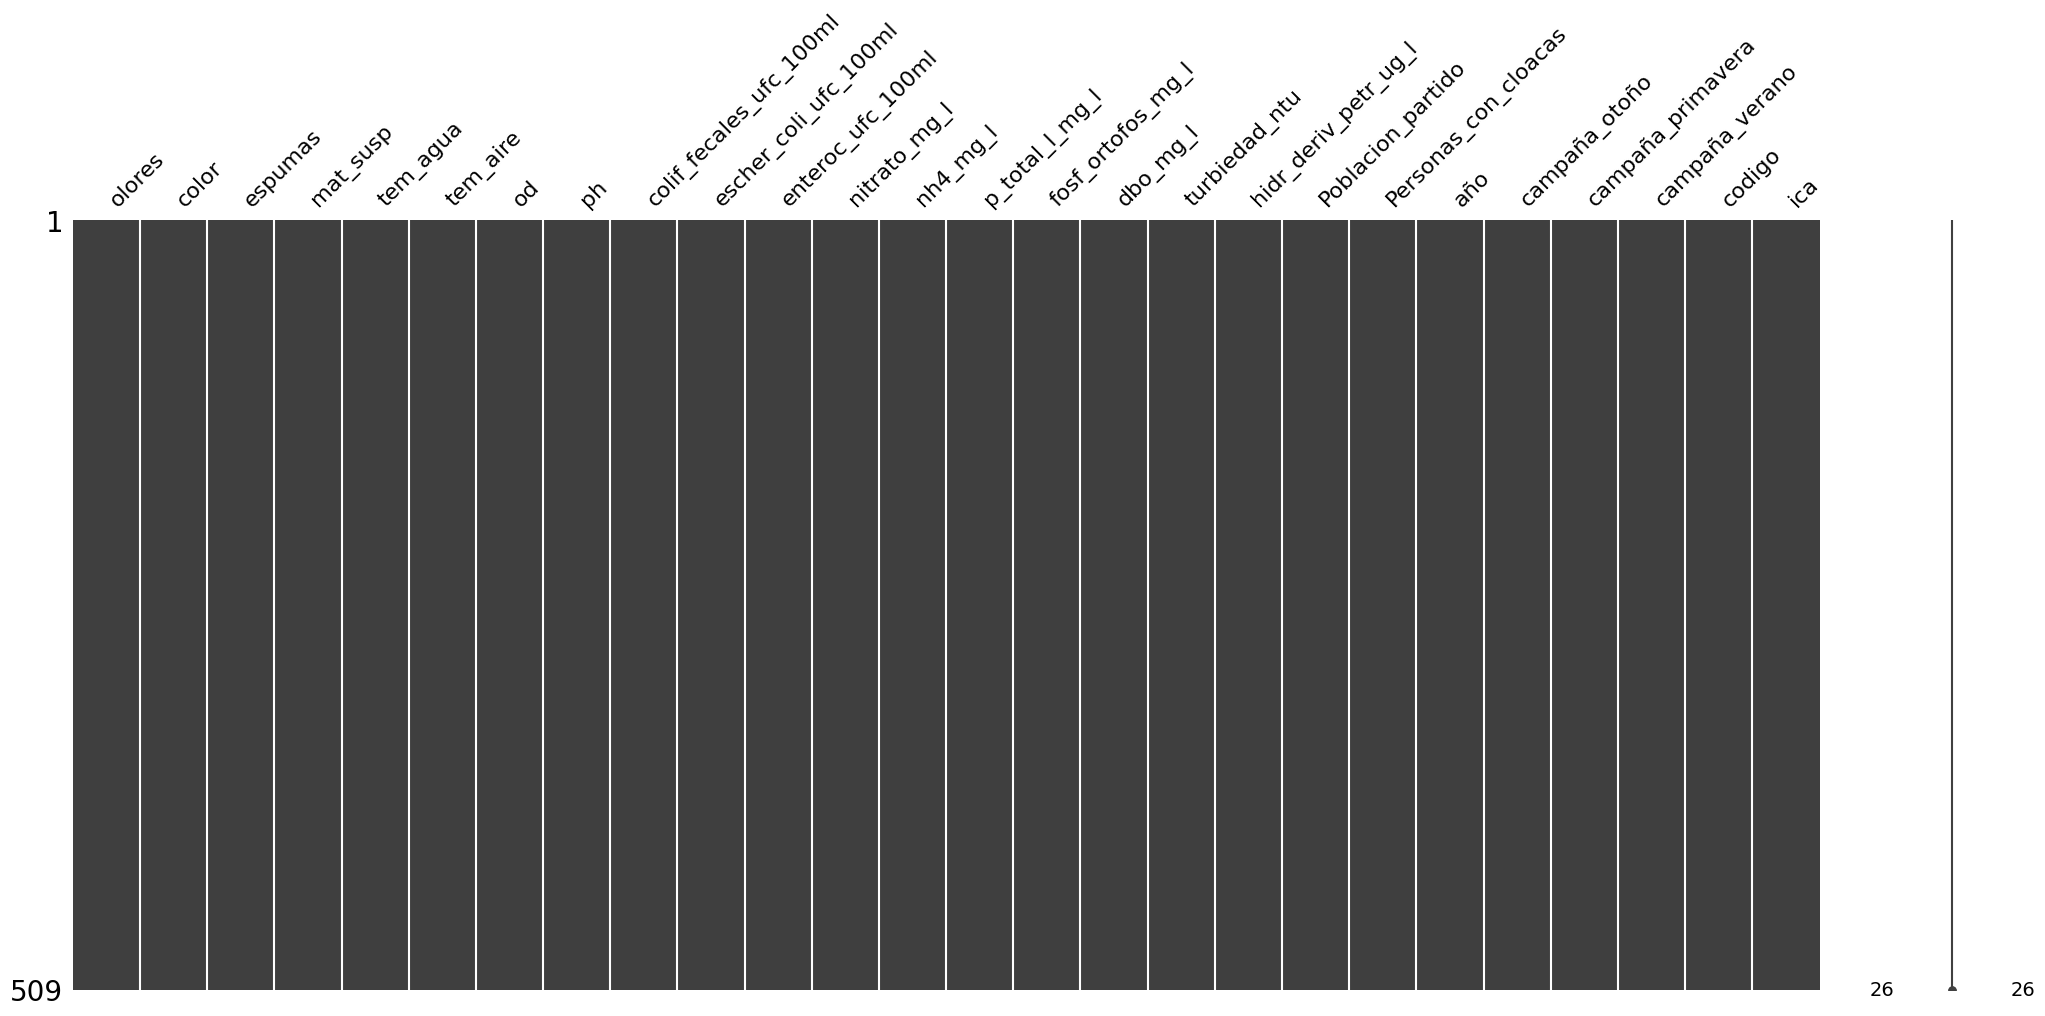

Dataset A estandarizado:


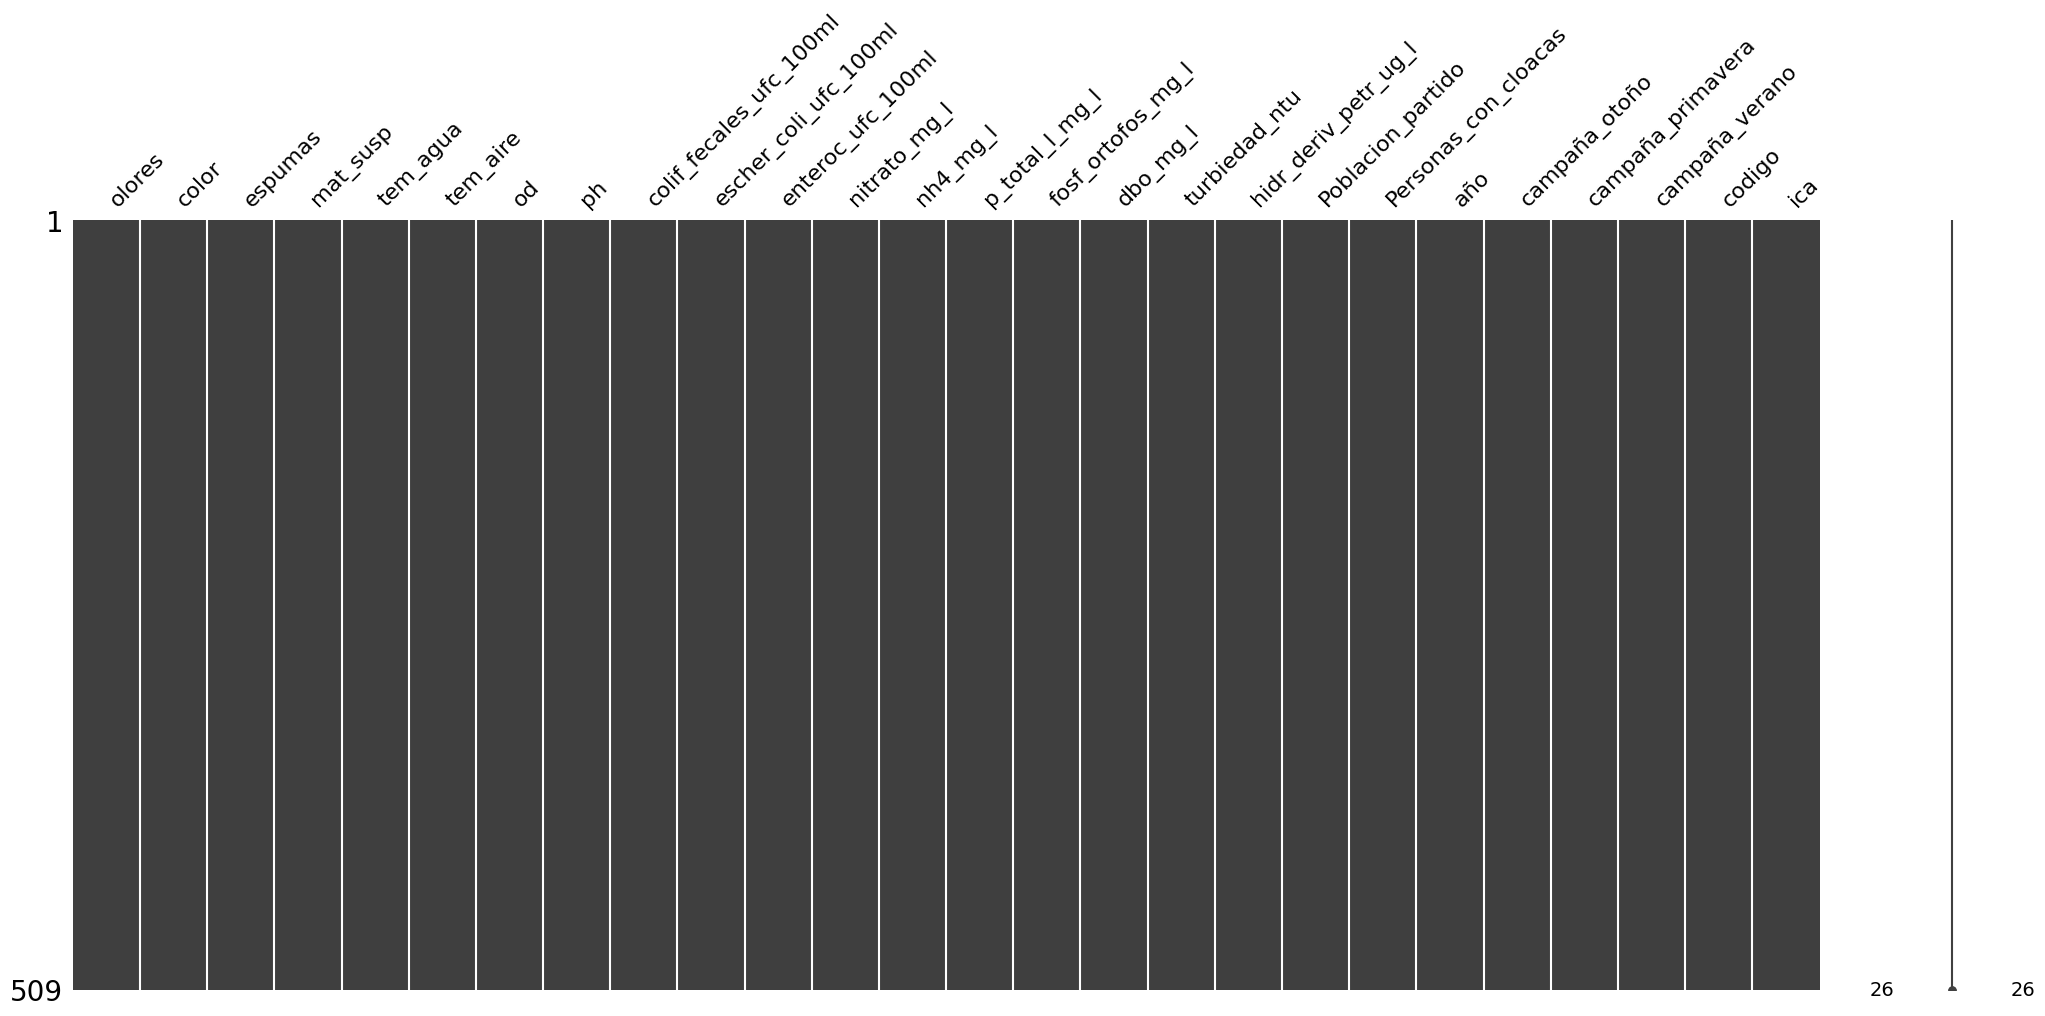

Dataset B escalado:


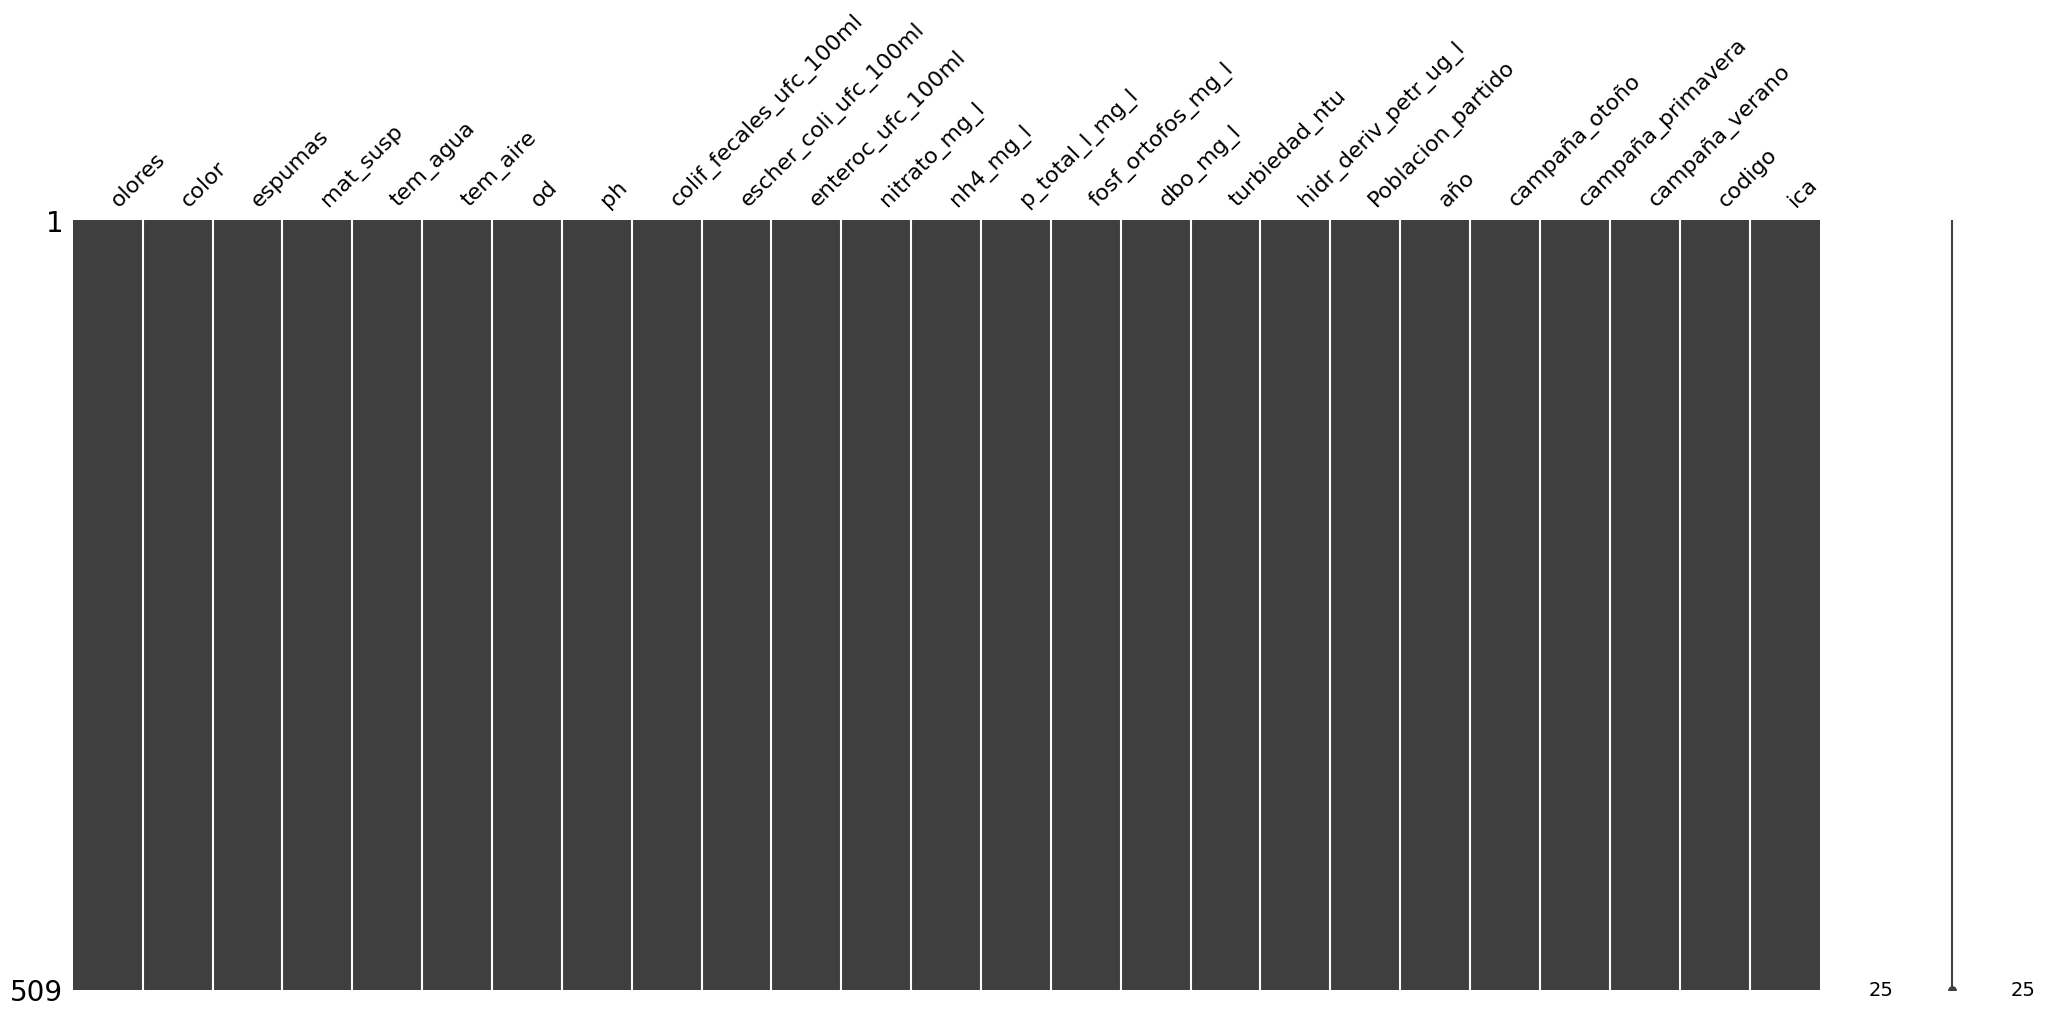

Dataset B estandarizado:


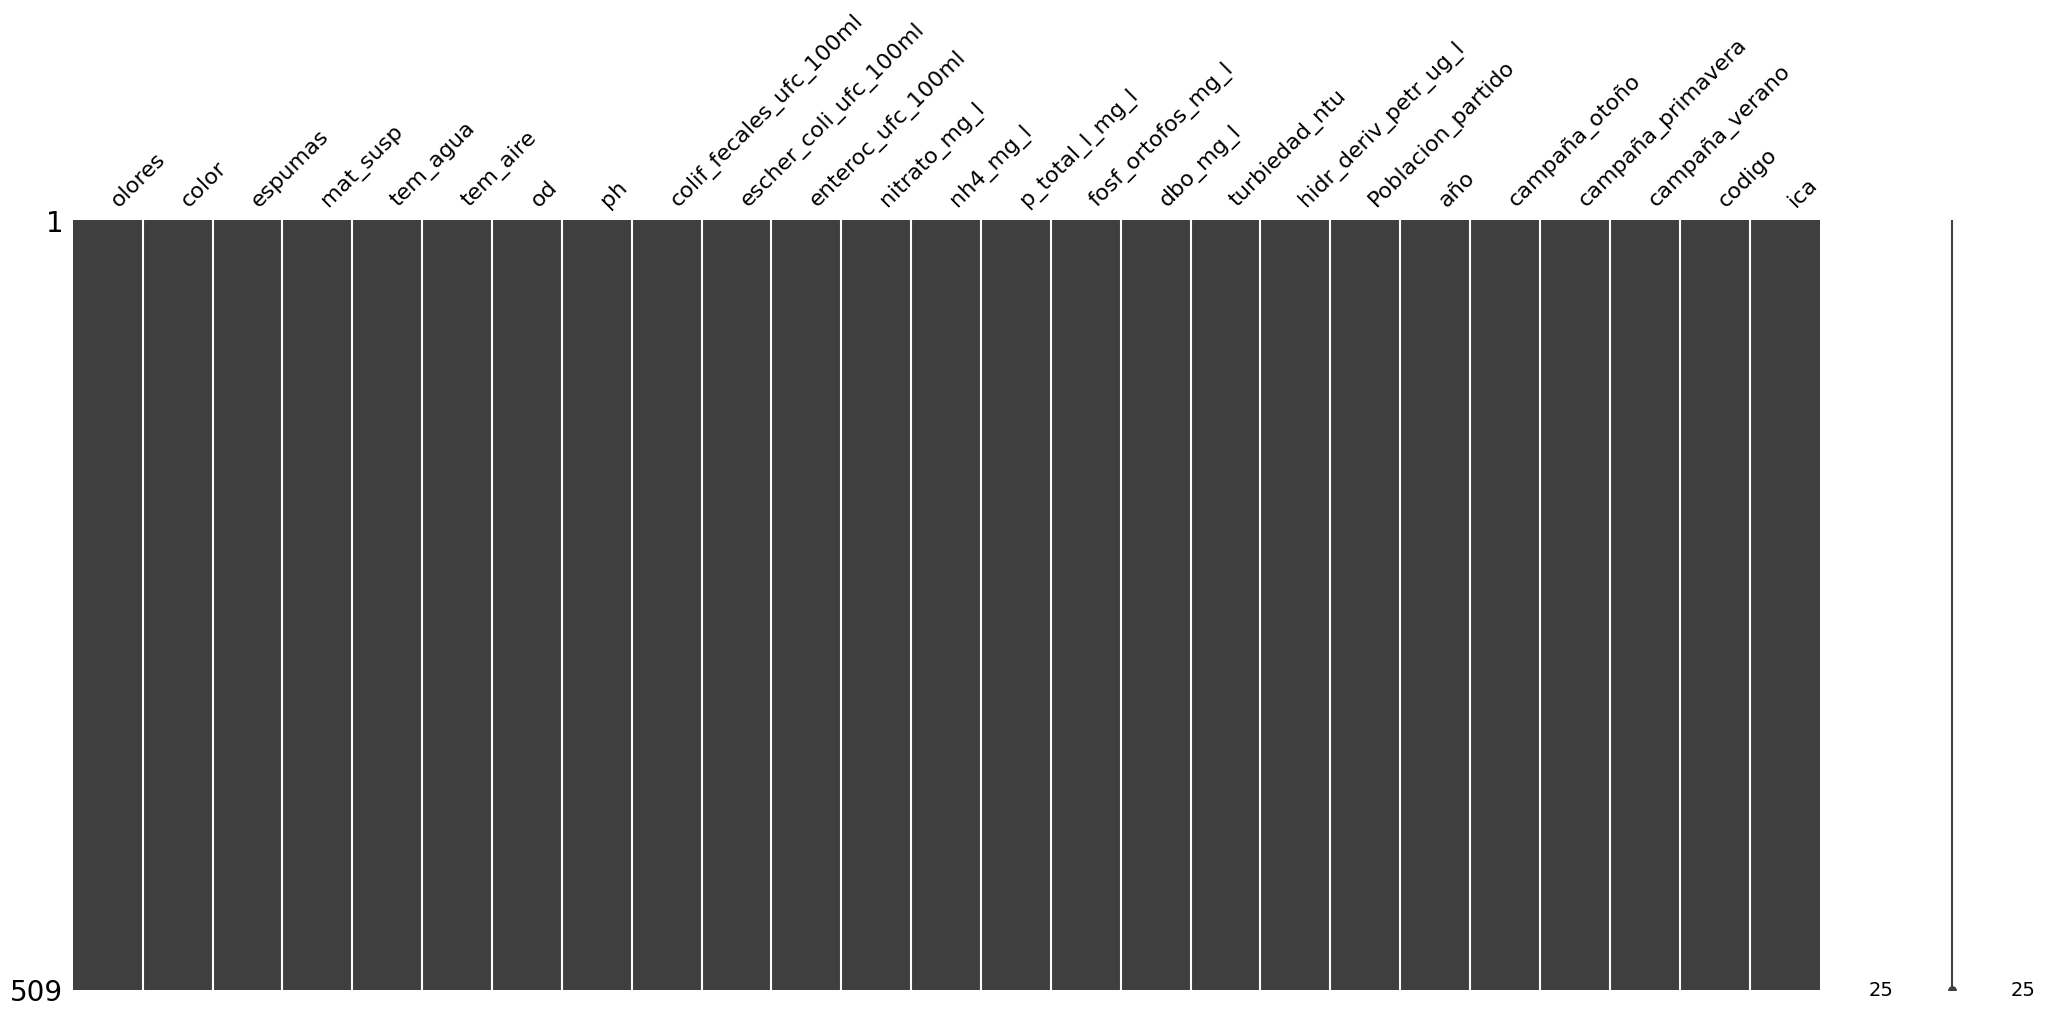

In [15]:
## Matriz de datos faltantes
for name, dataset in datasets.items():
    print(f"Dataset {name}:")
    matrix(dataset)
    plt.show()
    print("=======================================================================================")

In [16]:
## Conteo de datos faltantes
data = []
for name, dataset in datasets.items():
    registros_con_nulos = dataset.isna().any(axis=1).sum()
    data.append({'Dataset': name, 'Registros con nulos': registros_con_nulos})

df_resultados = pd.DataFrame(data)

print("Contamos la cantidad de filas con al menos un valor faltante en cada dataframe:")
display(df_resultados)

Contamos la cantidad de filas con al menos un valor faltante en cada dataframe:


,Dataset,Registros con nulos
0,A escalado,0
1,A estandarizado,0
2,B escalado,0
3,B estandarizado,0


### 1.D. Valores outliers

Realizamos boxplots para cada variable y dataset. Verificamos que no haya valores outliers indeseados.

In [17]:
def boxplots(datasets, cols, n_rows, n_cols):
    """
    Muestra gráficos boxplots de las variables dadas en argumento cols para varios dataframes
    dados en argumento datasets.
    
    No devuelve ningún valor.
    
    Argumentos:
    -----------------------------------------------
        datasets : dict
            Diccionario con los dataframes a explorar. Las llaves serán los nombres con los que se identifica a
            cada dataframe, y los valores (de tipo pandas.Dataframe) serán los dataframes. Cada dataframe debe
            tener entre sus columnas todas las que aparezcan en cols. La cantidad de dataframes totales debe ser
            igual a n_rowx x n_cols.
        cols : list | tuple
            Iterable con los nombres de las columnas a explorar (strings). Todas las columnas dadas deben estar
            en todos los dataframes.
        n_rows : int
            Cantidad de filas para los subplots.
        n_cols : int
            Cantidad de columnas para los subplors
    """
    for col in cols:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))
        axes = axes.flatten()
        plt.suptitle(f"Boxplots de {col}", fontsize=16)
        for i, ((name, dataset), ax) in enumerate(zip(datasets.items(), axes)):
            sns.boxplot(y=dataset[col], ax=ax)
            ax.set_title(name, fontsize=12)
            if i == 0 or i == 3:
                ax.set_ylabel(col)
            else:
                ax.set_ylabel('')
        plt.tight_layout()
        plt.show()

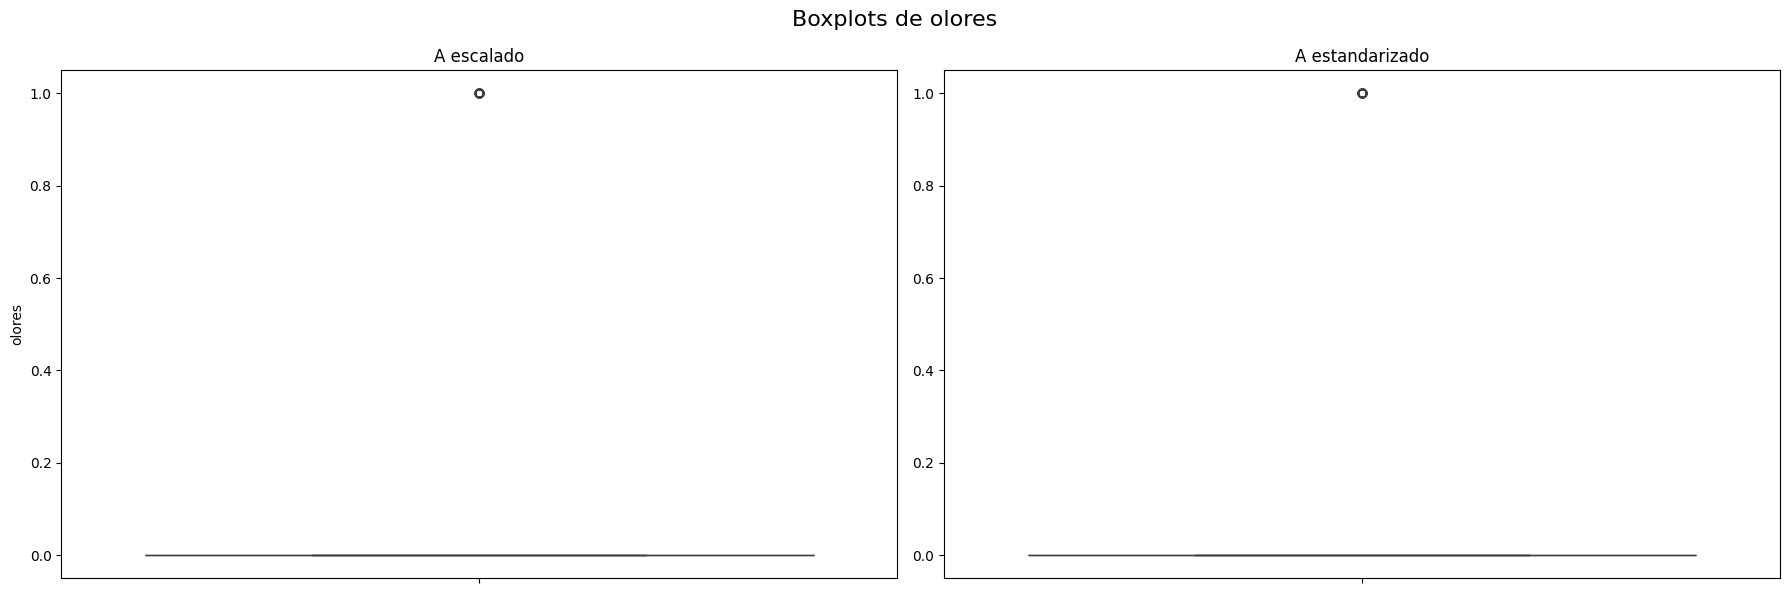

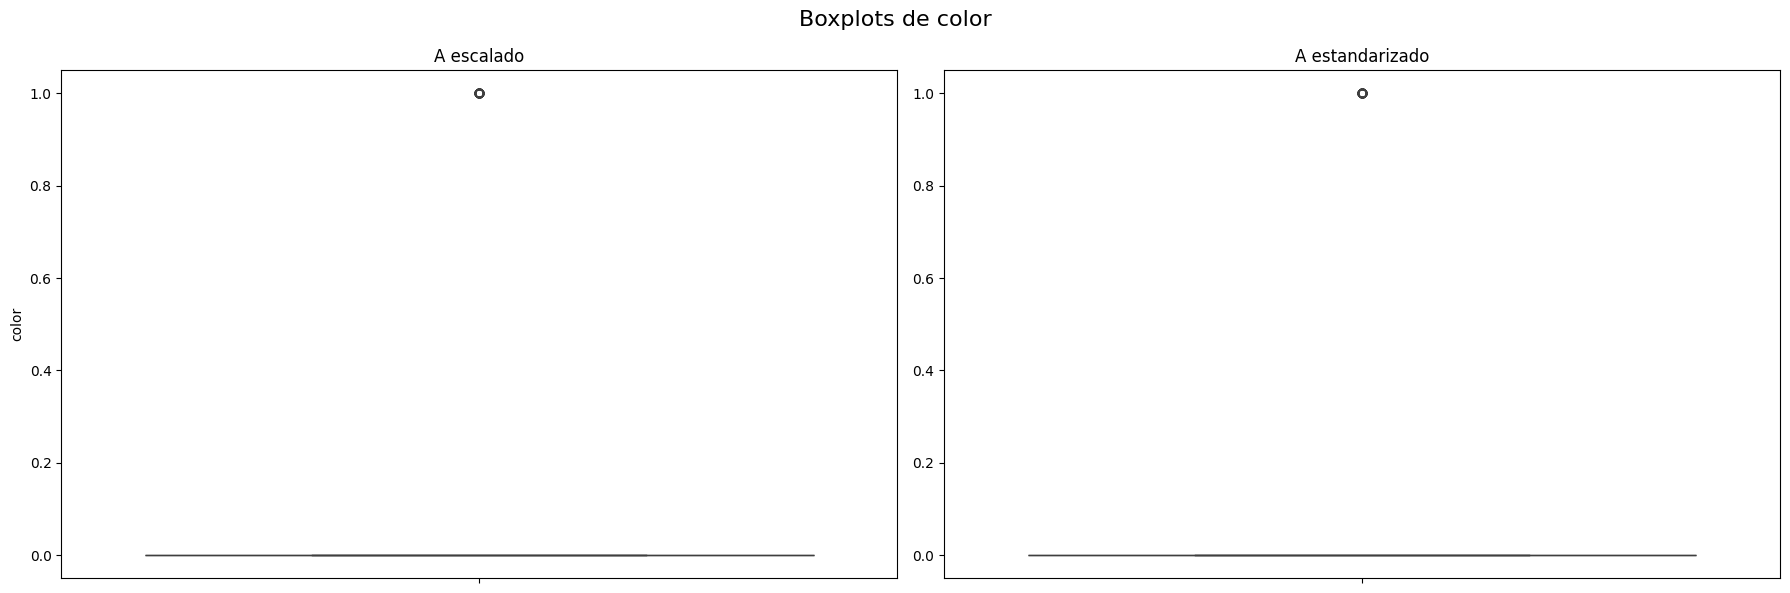

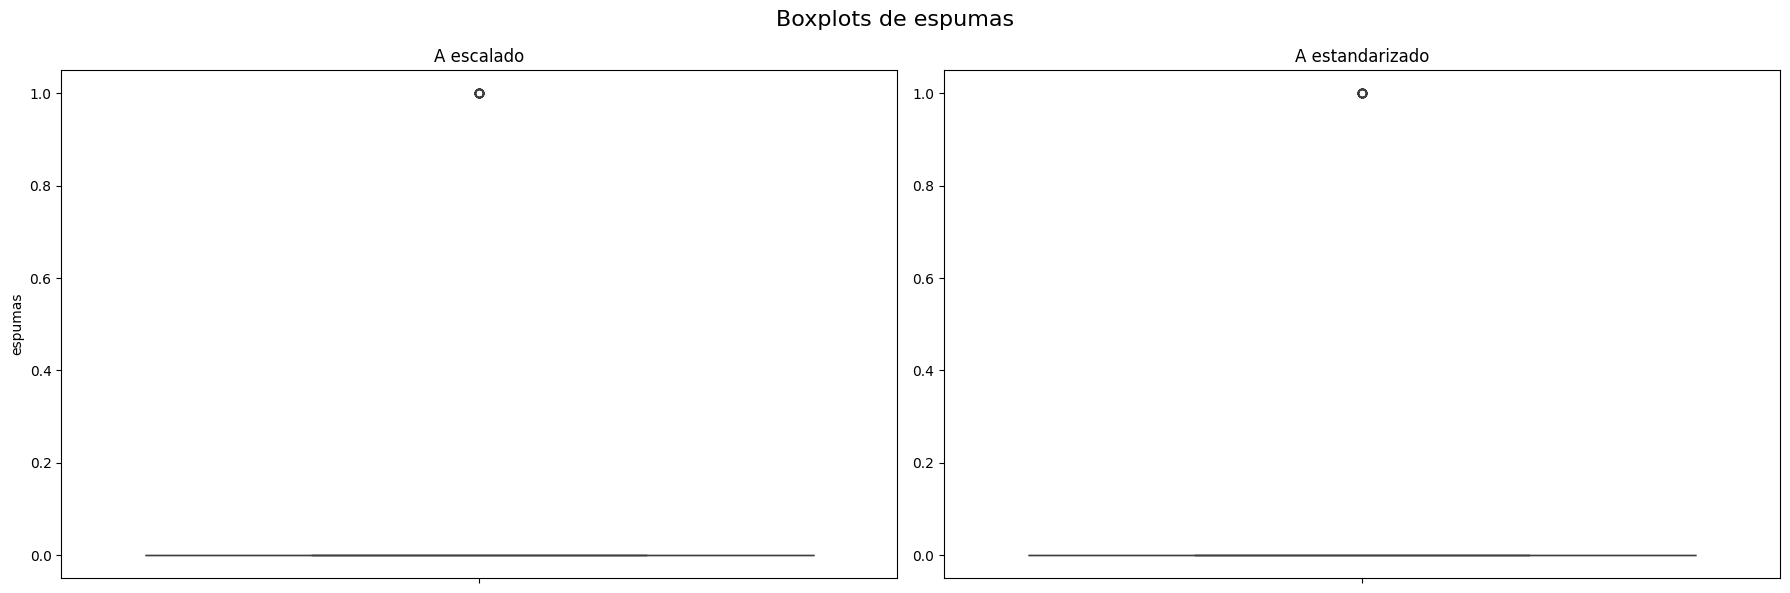

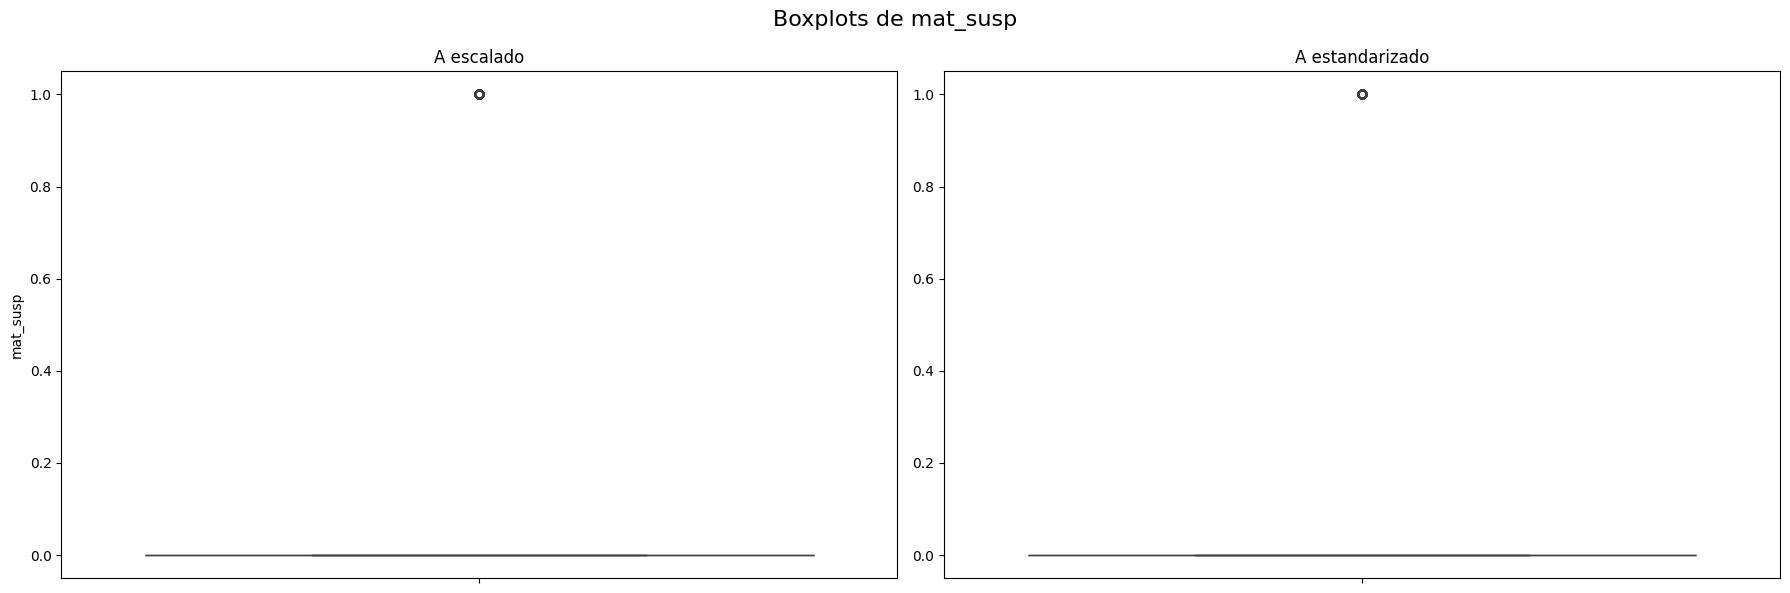

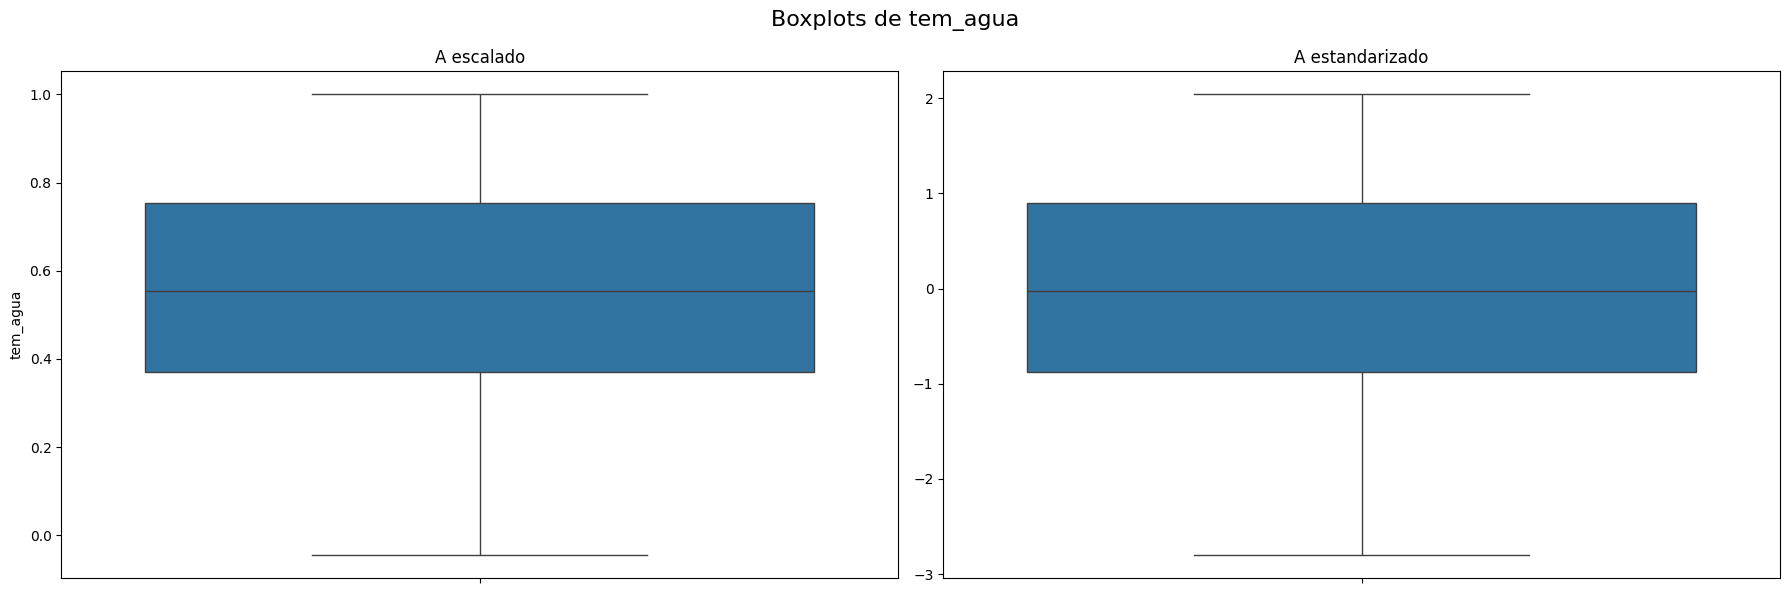

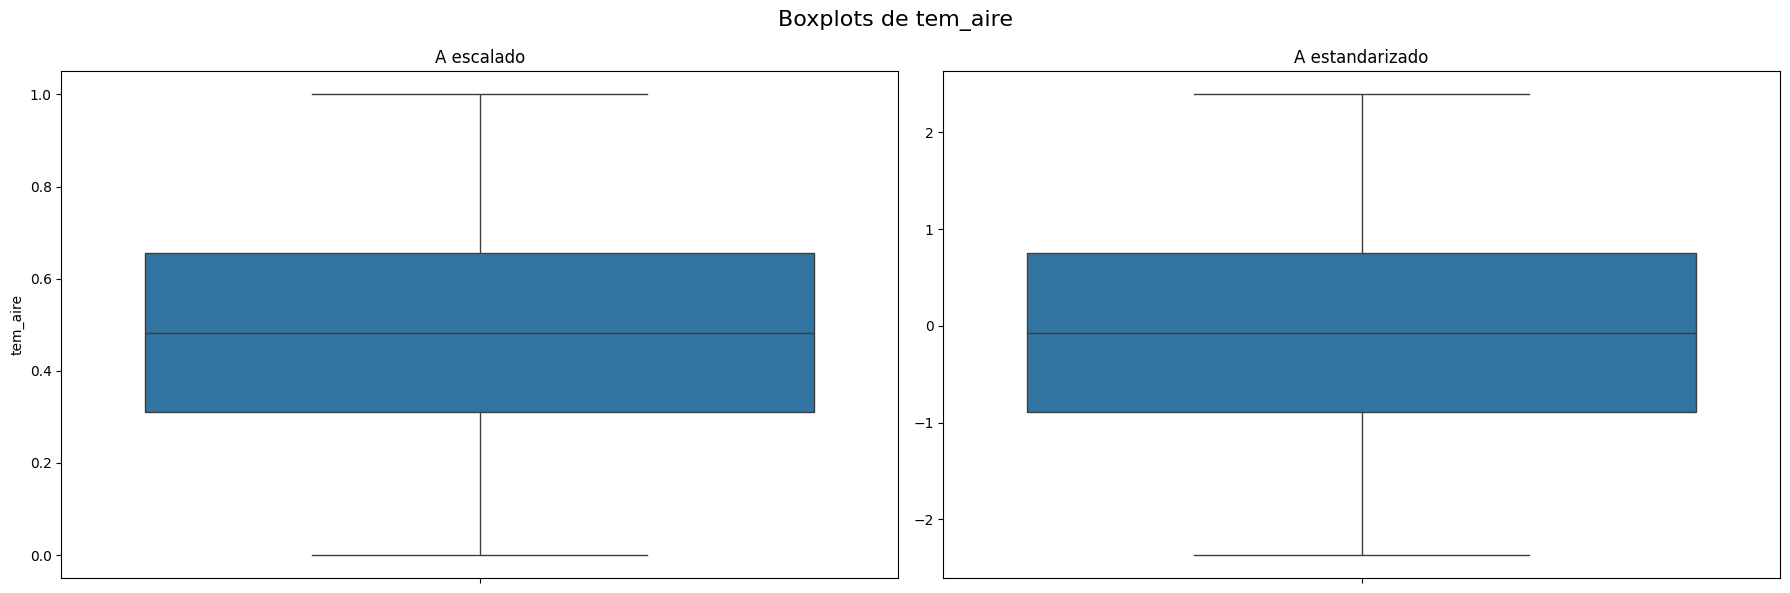

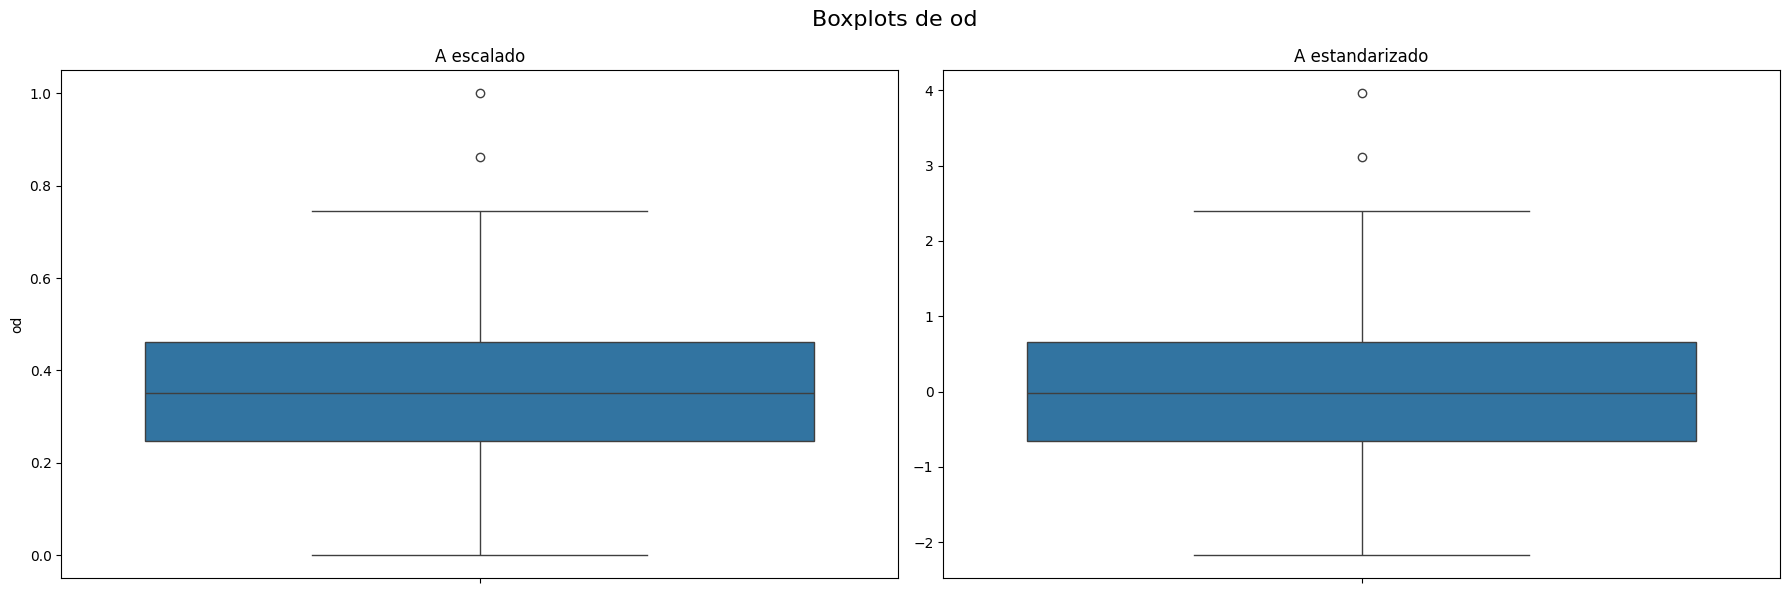

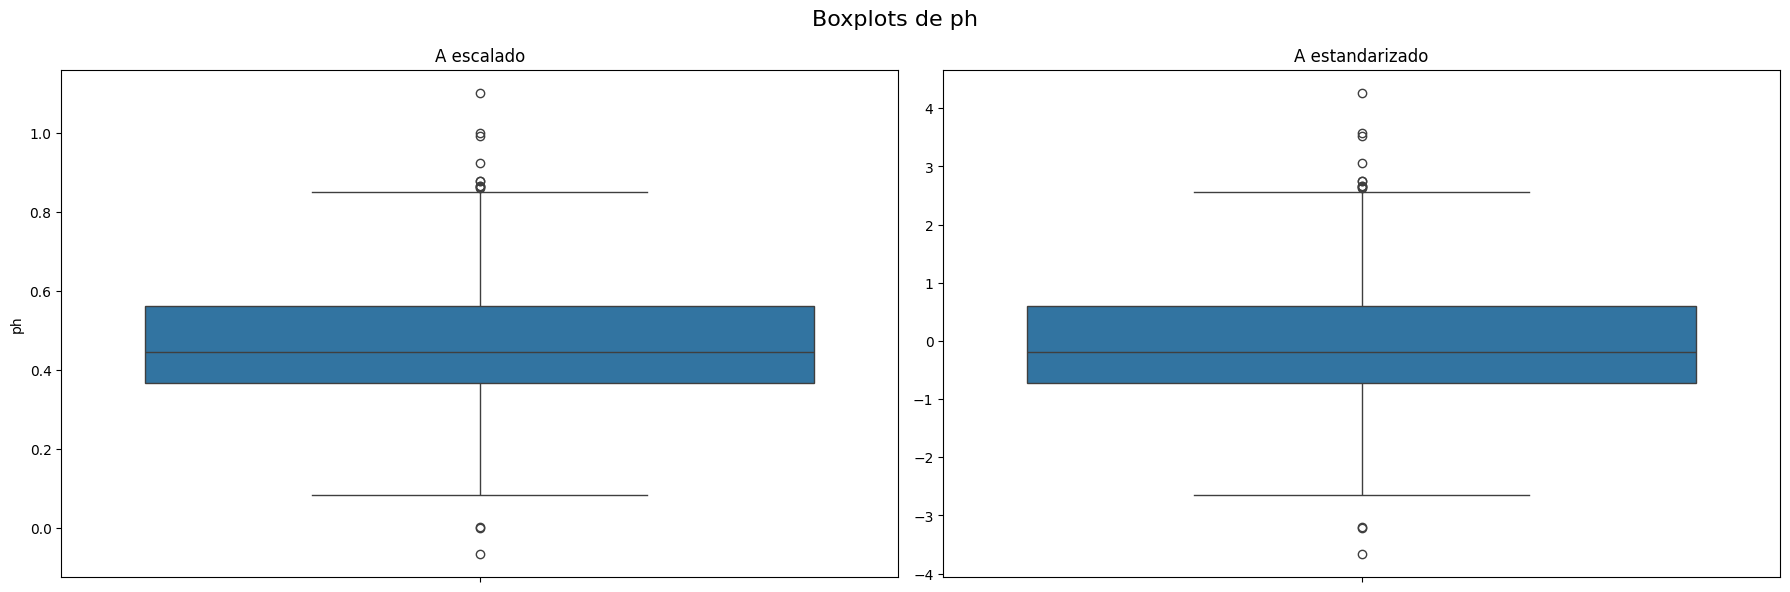

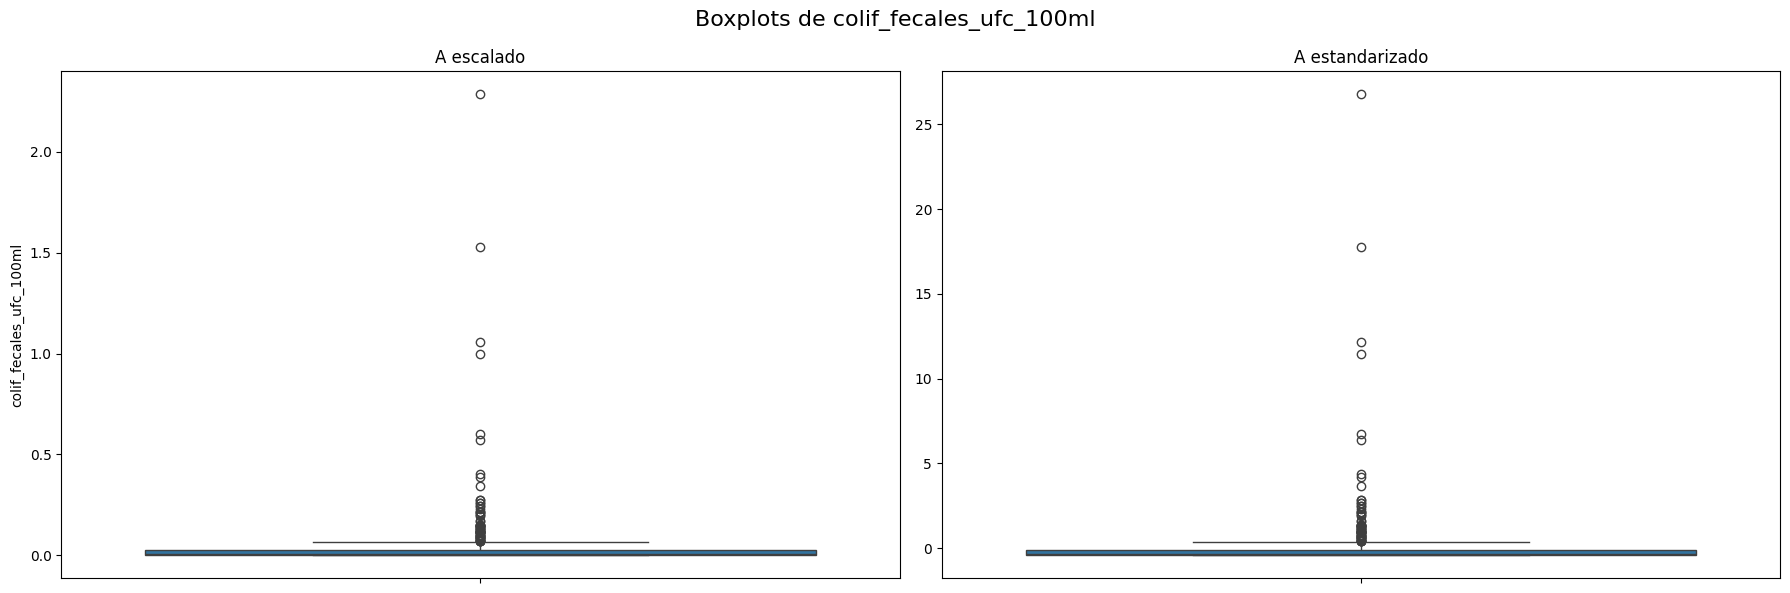

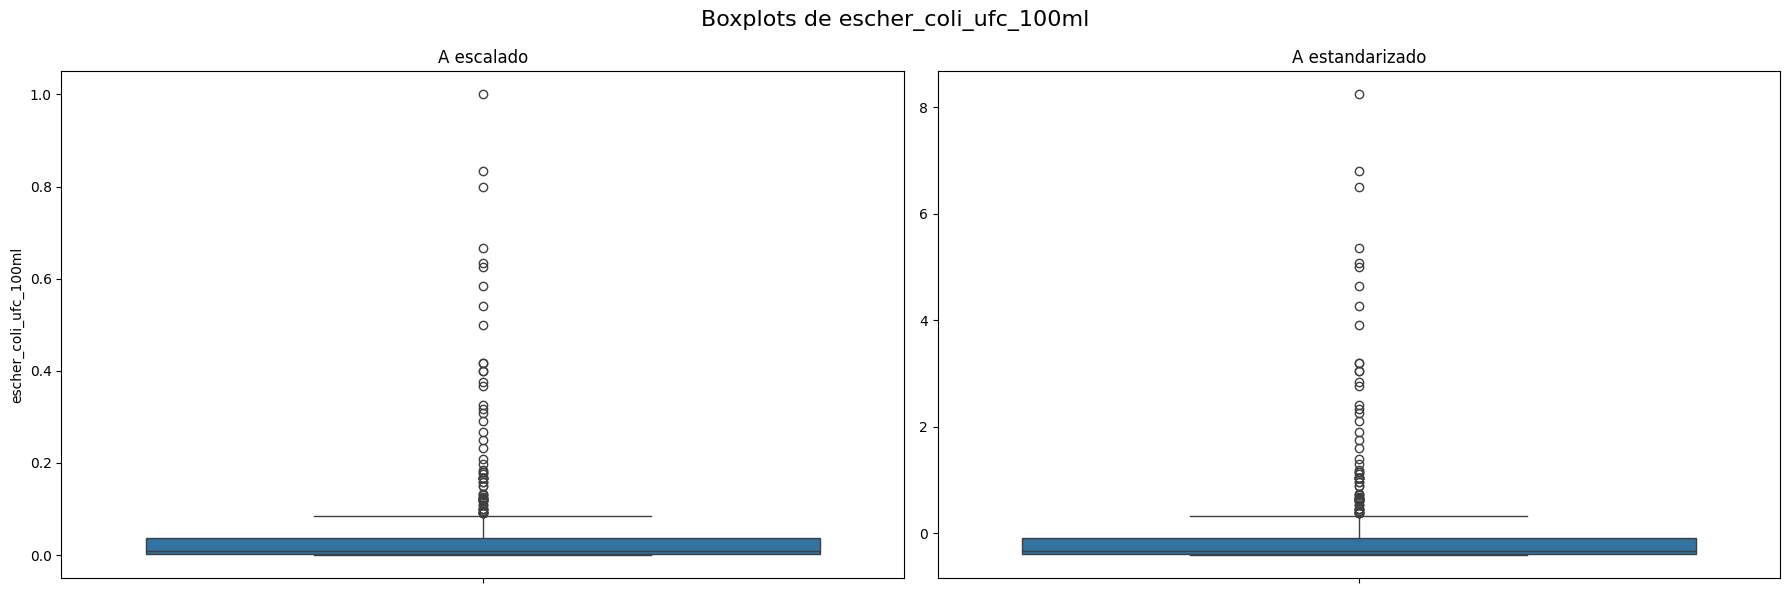

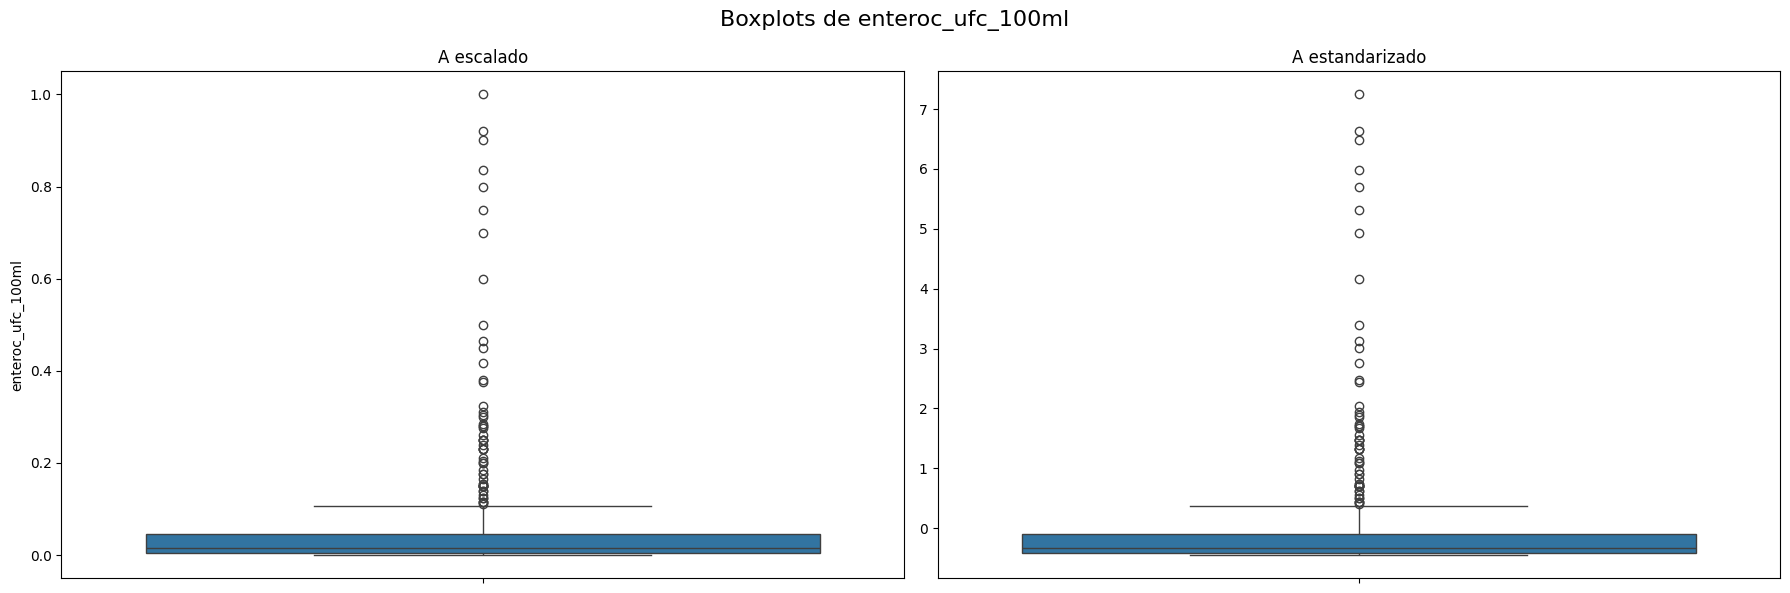

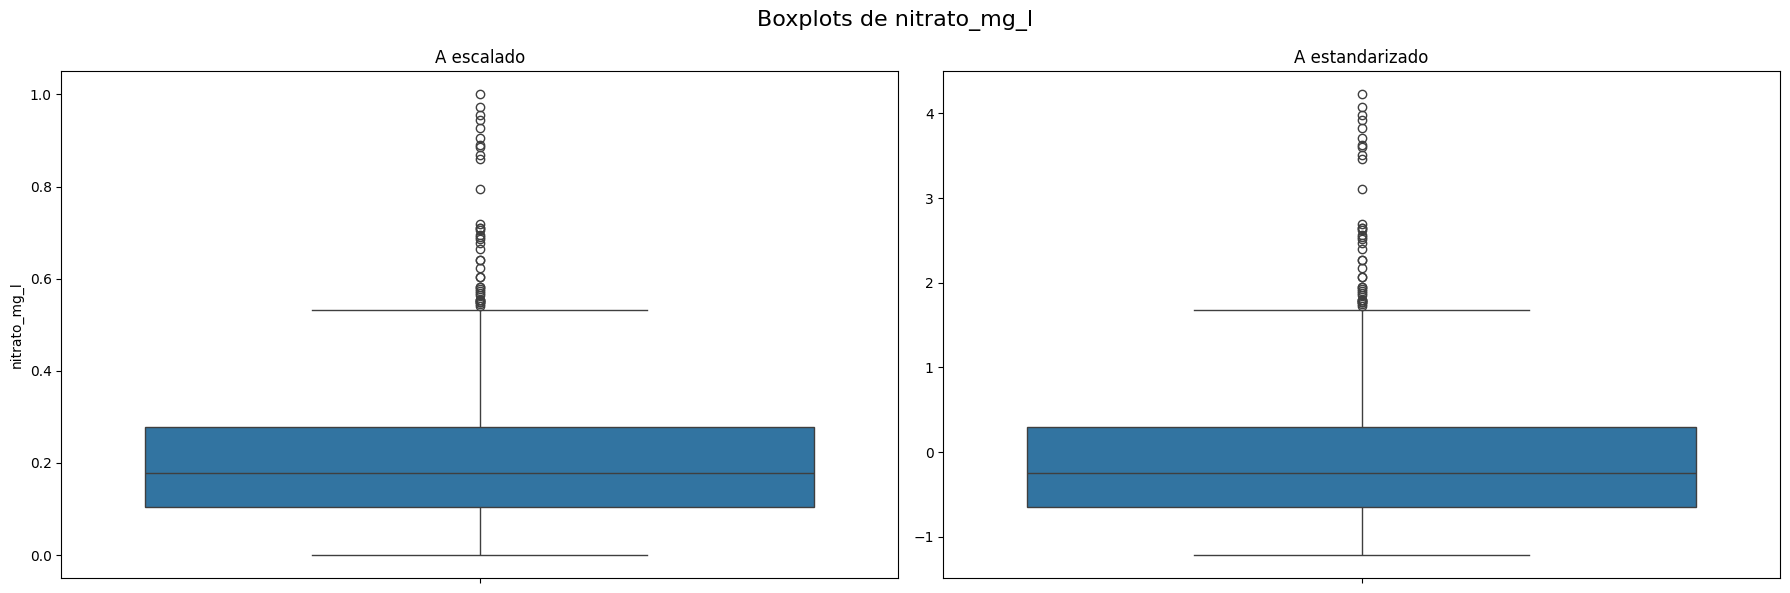

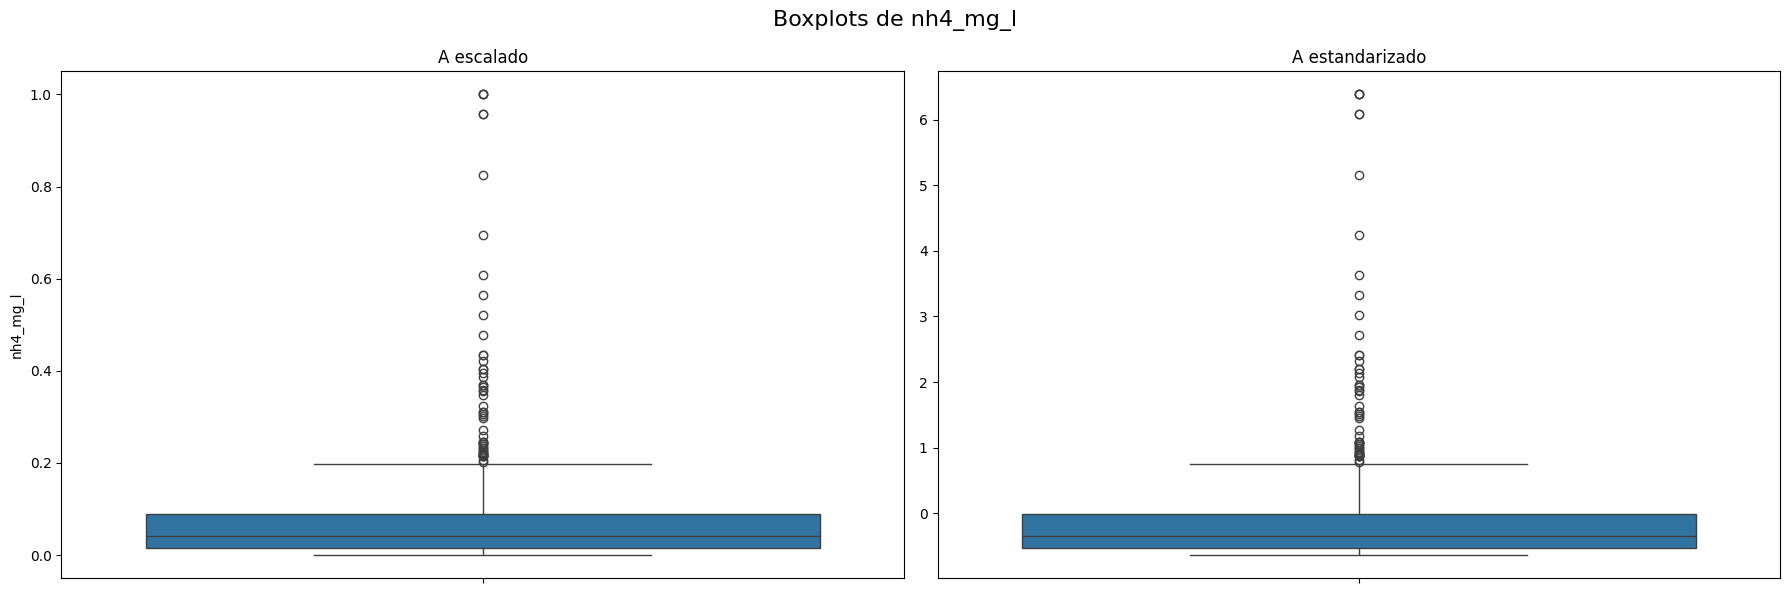

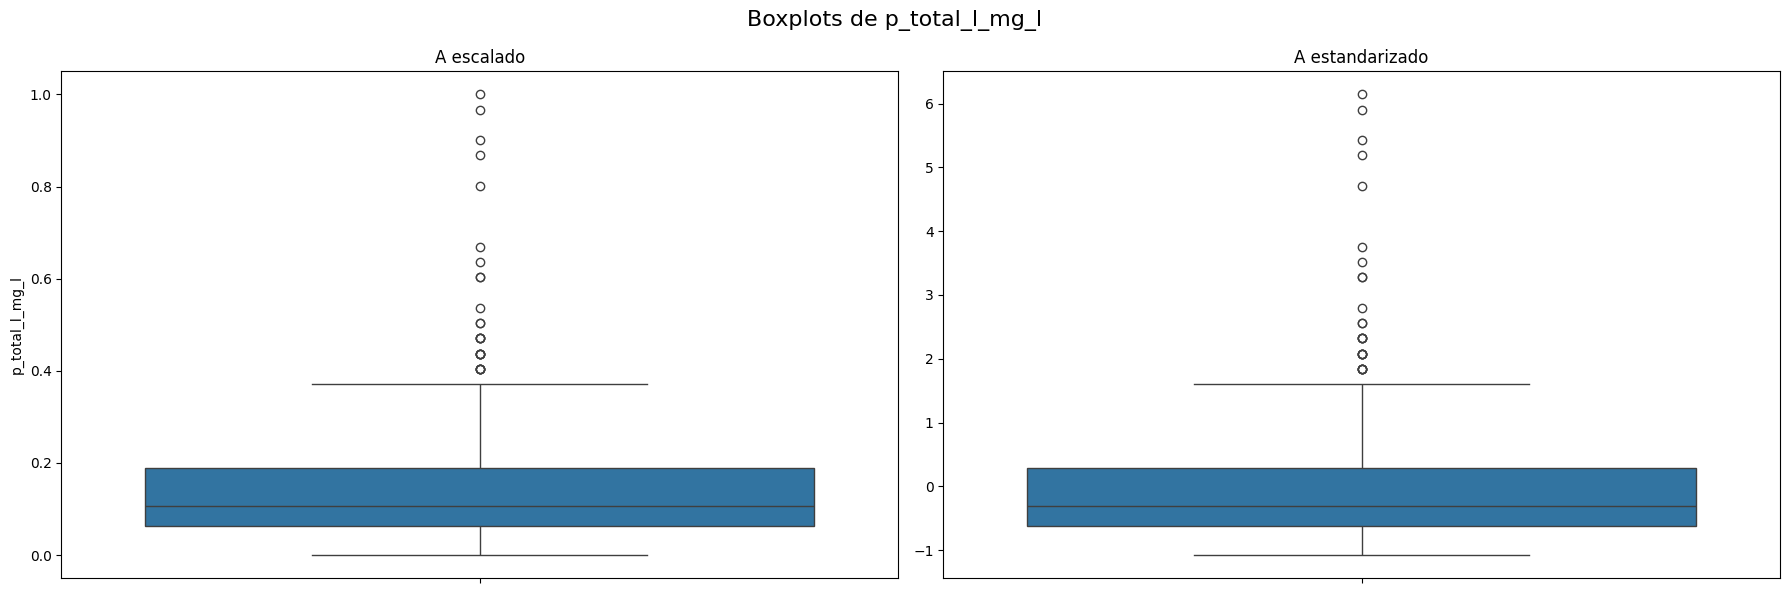

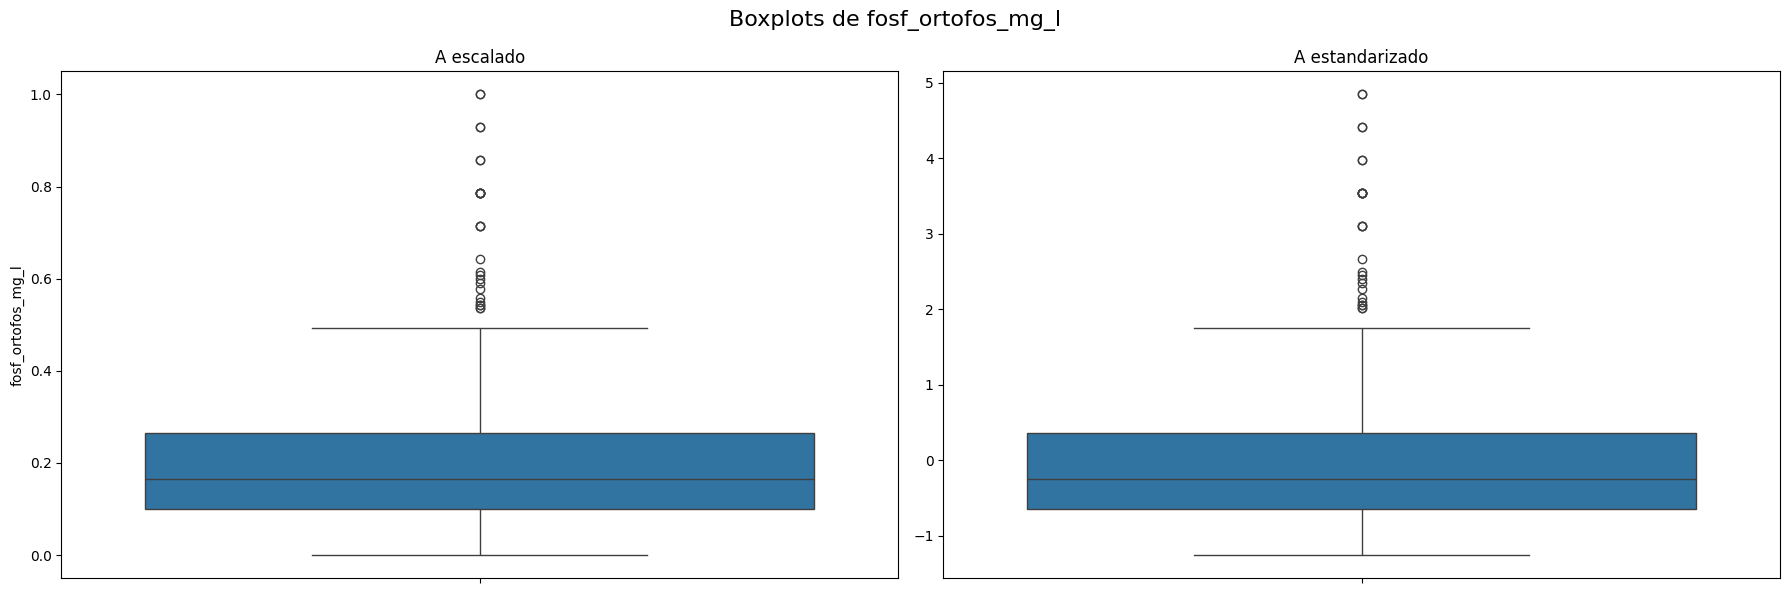

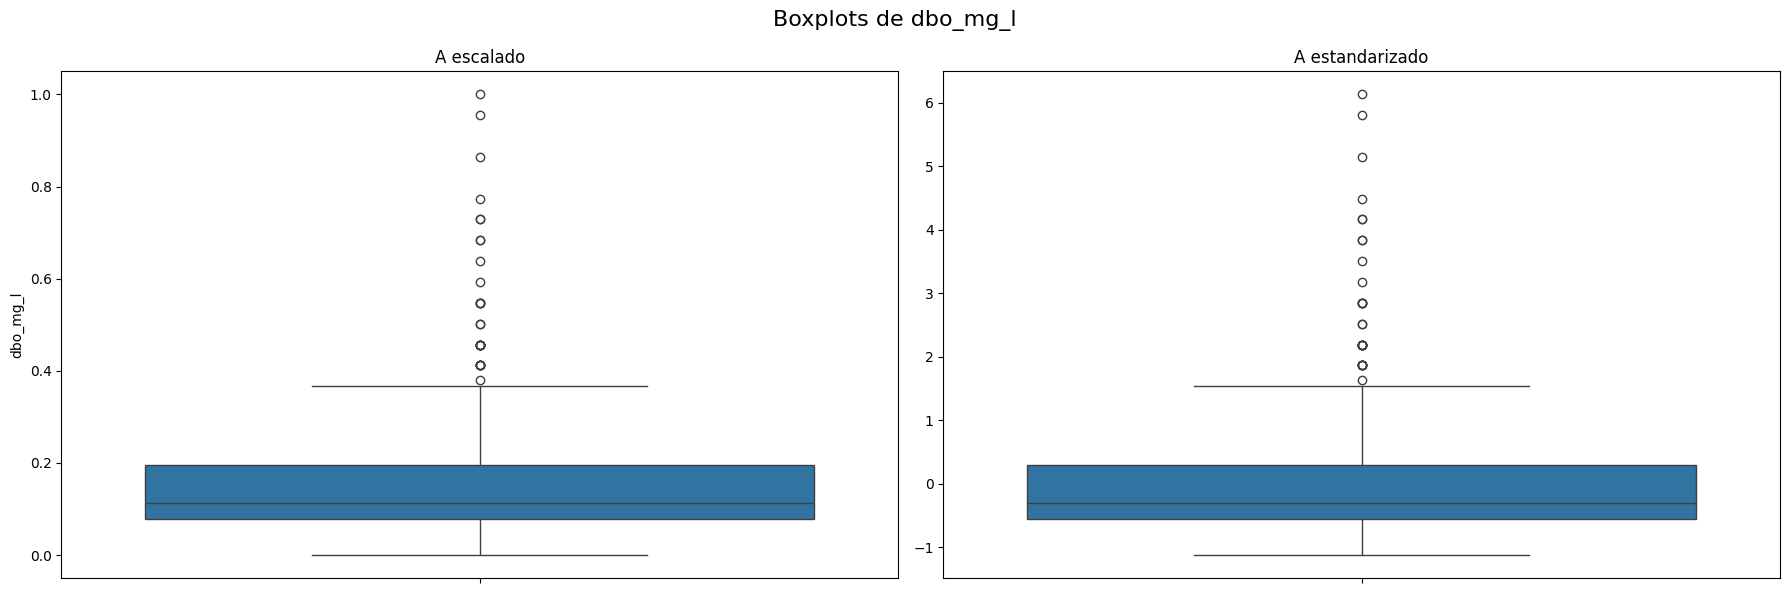

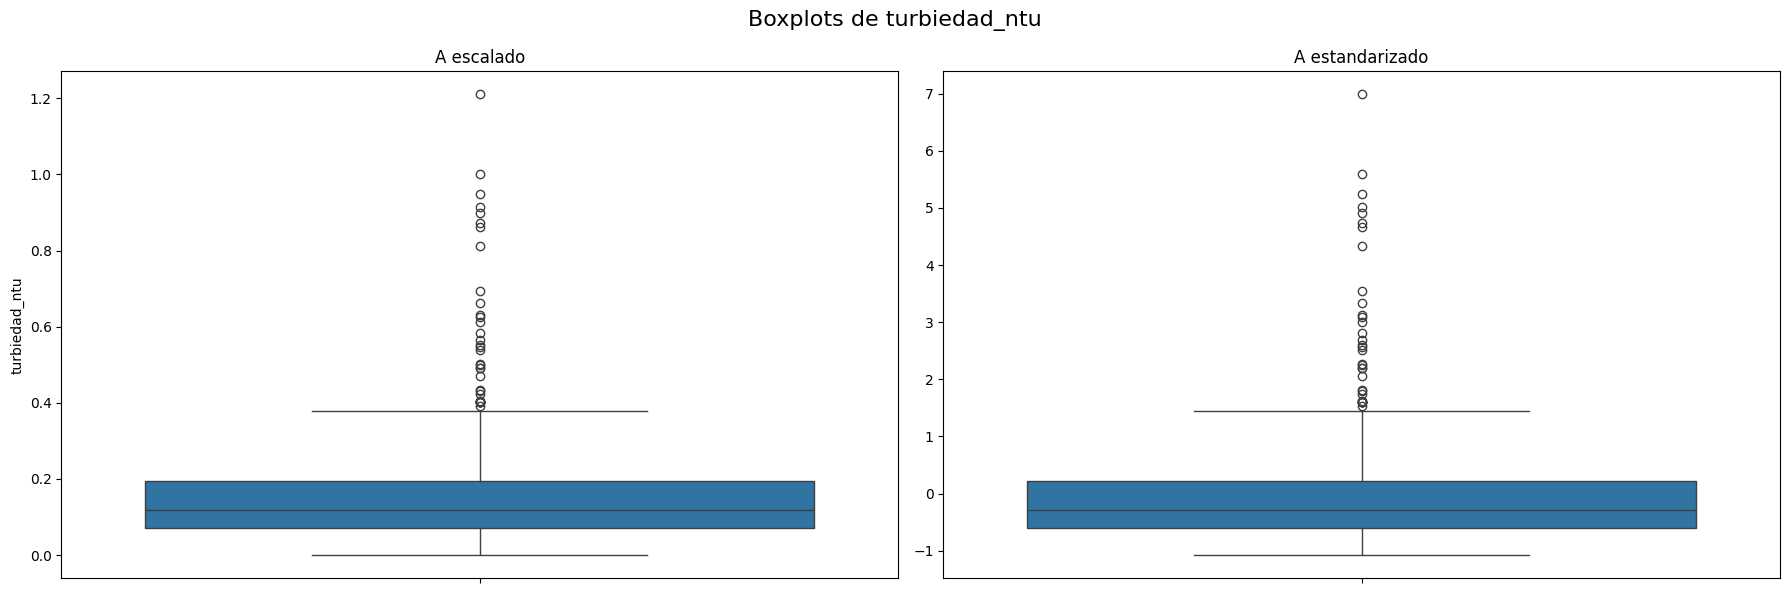

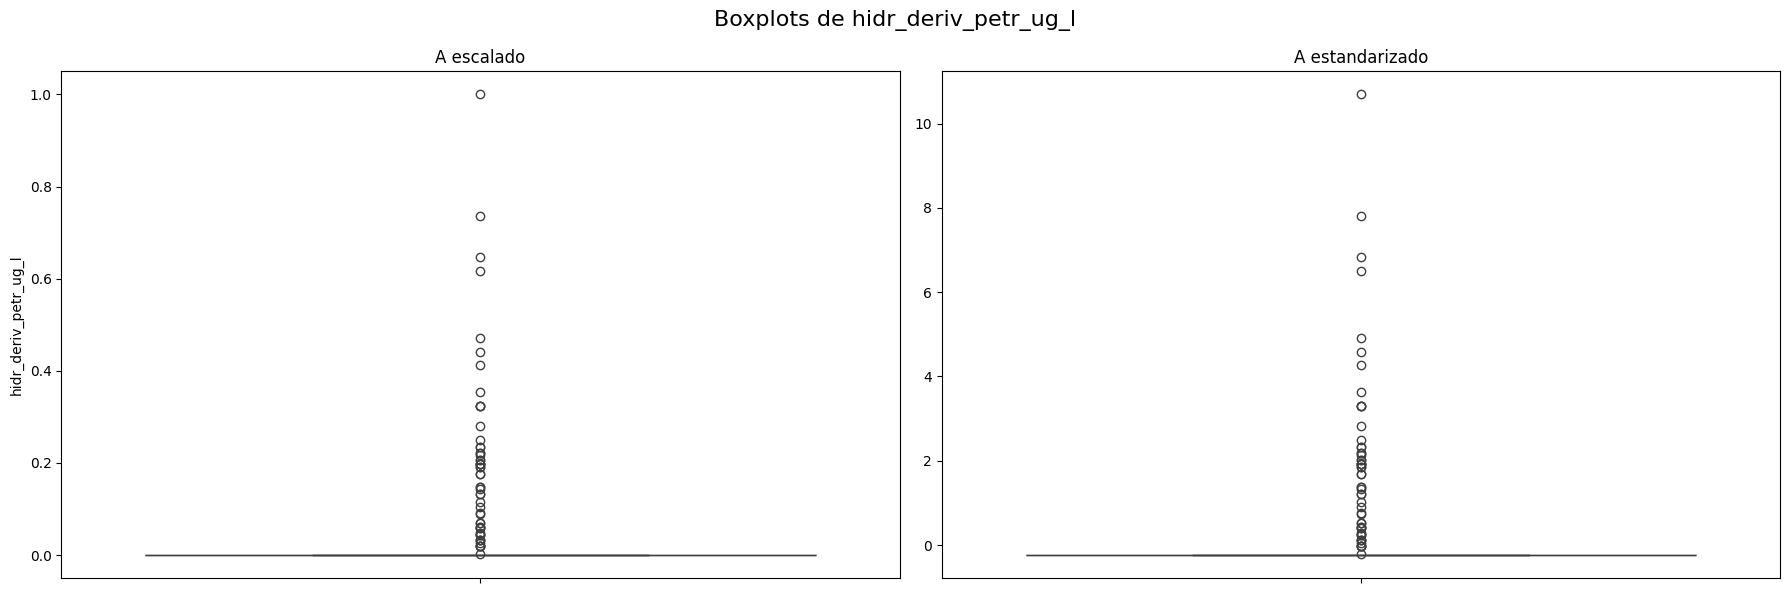

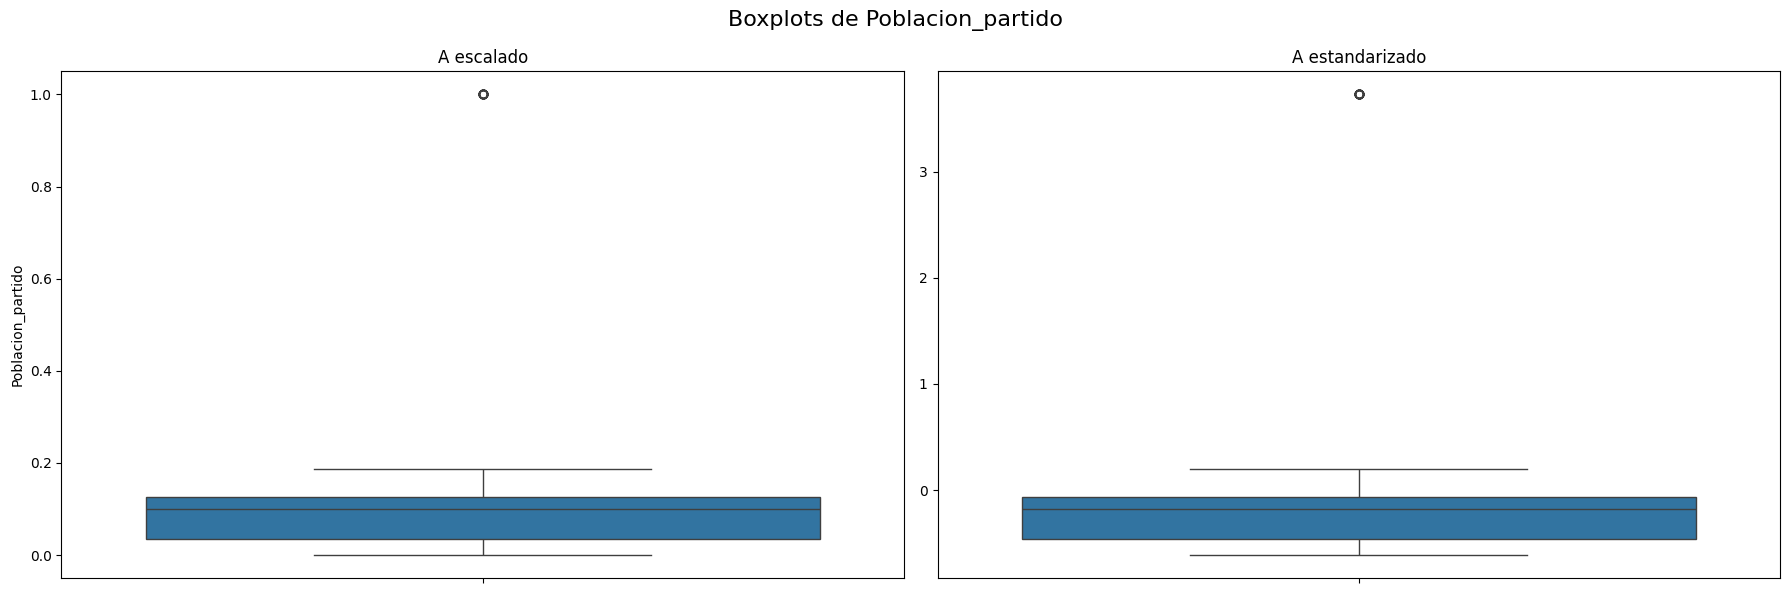

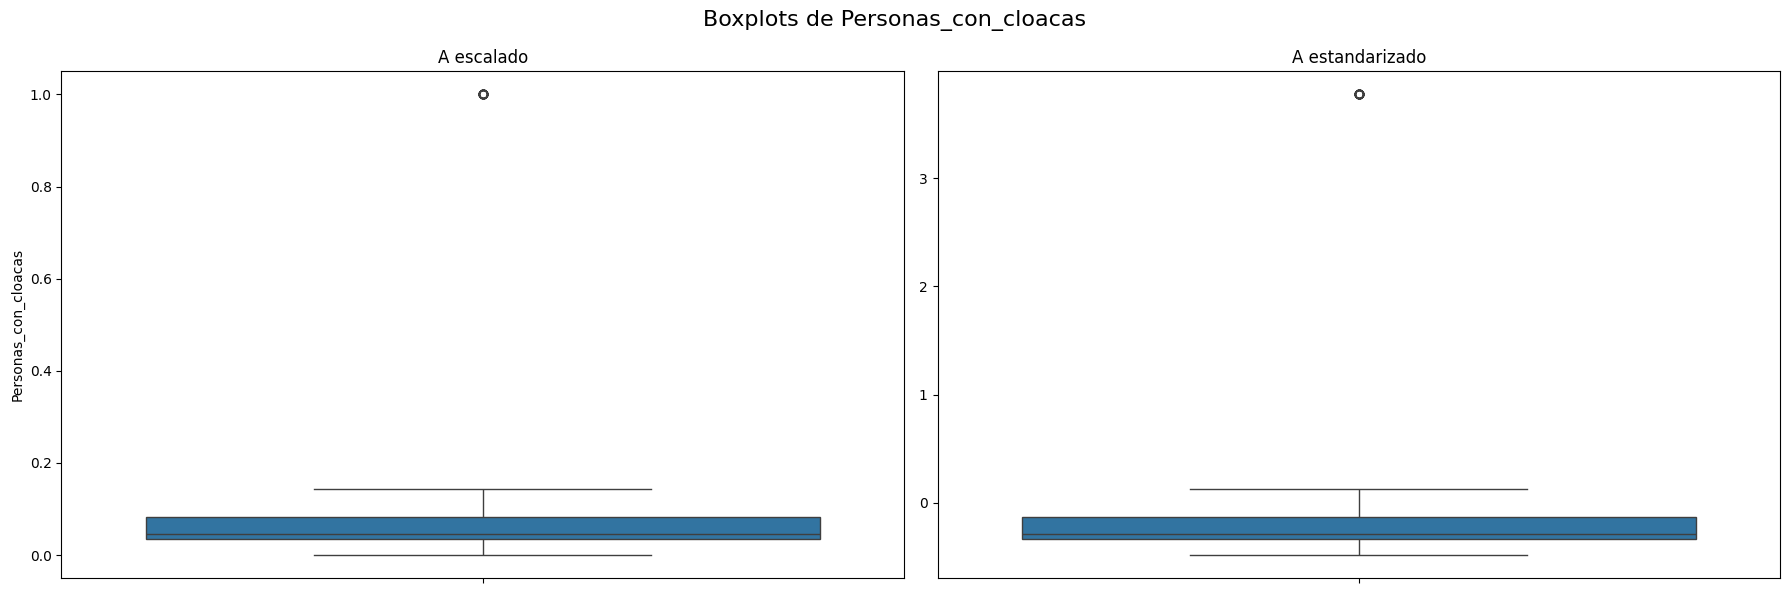

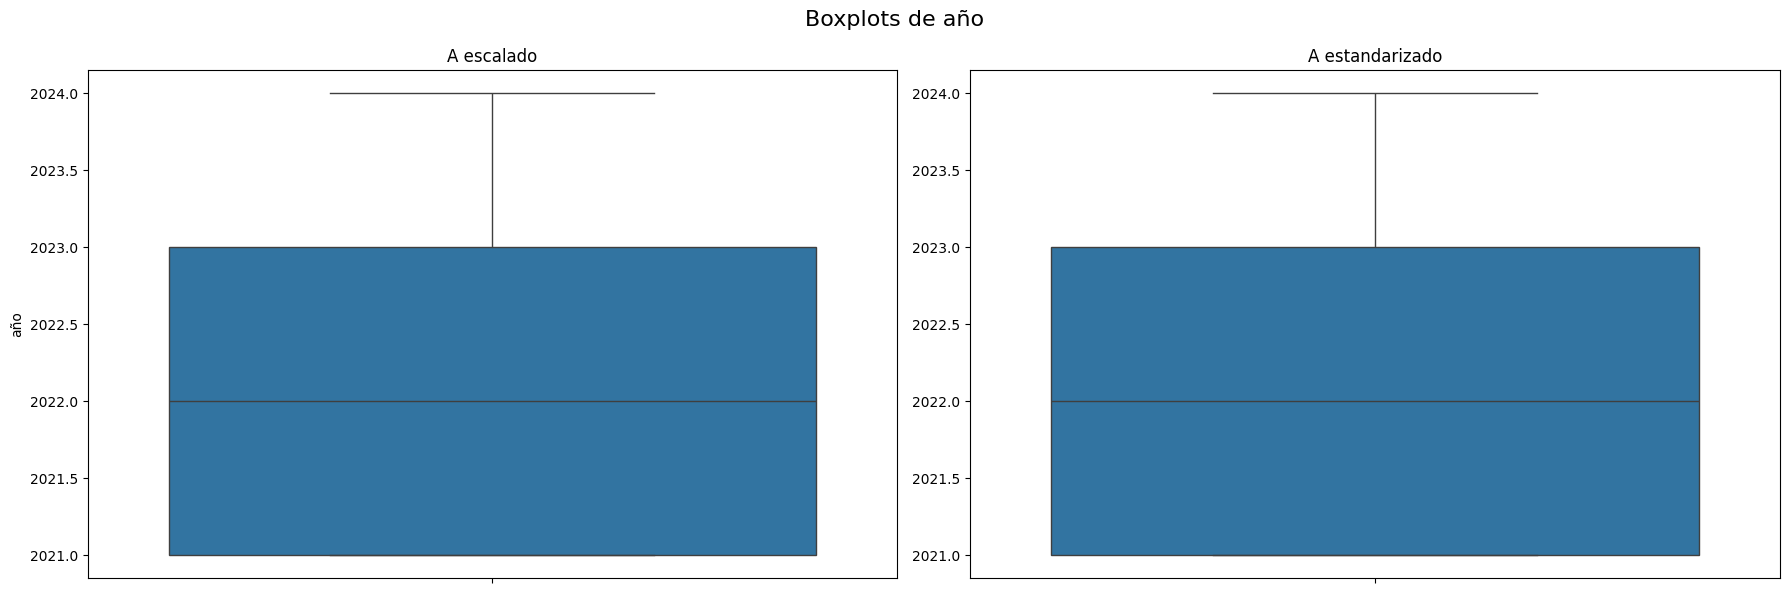

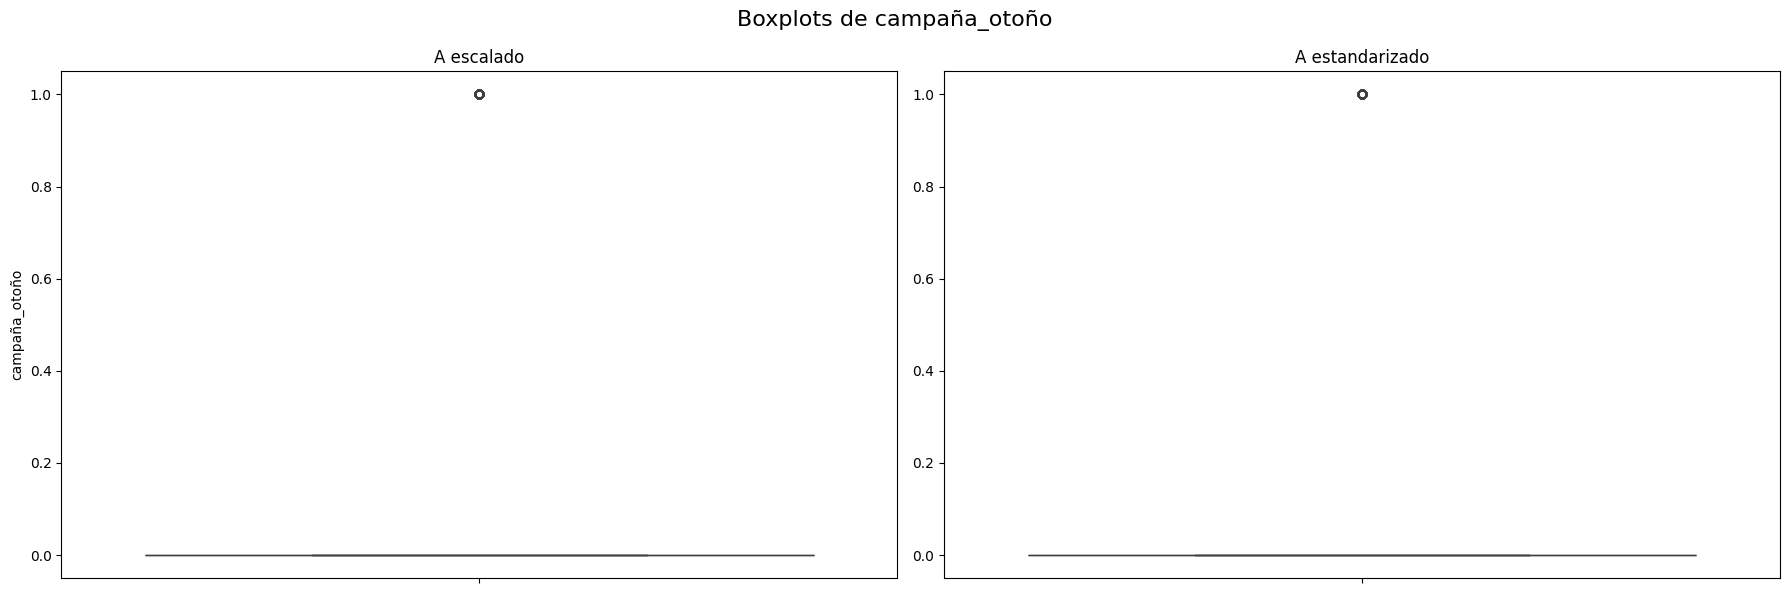

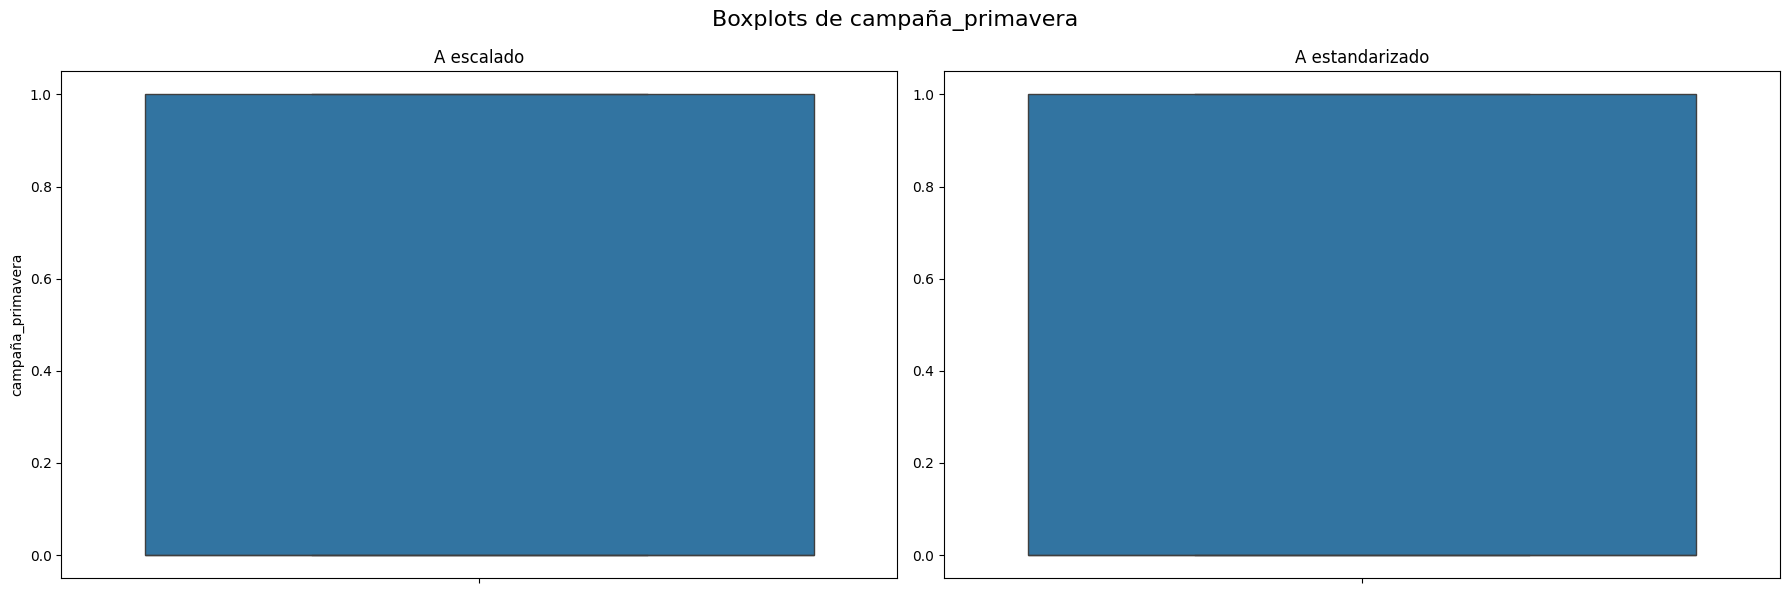

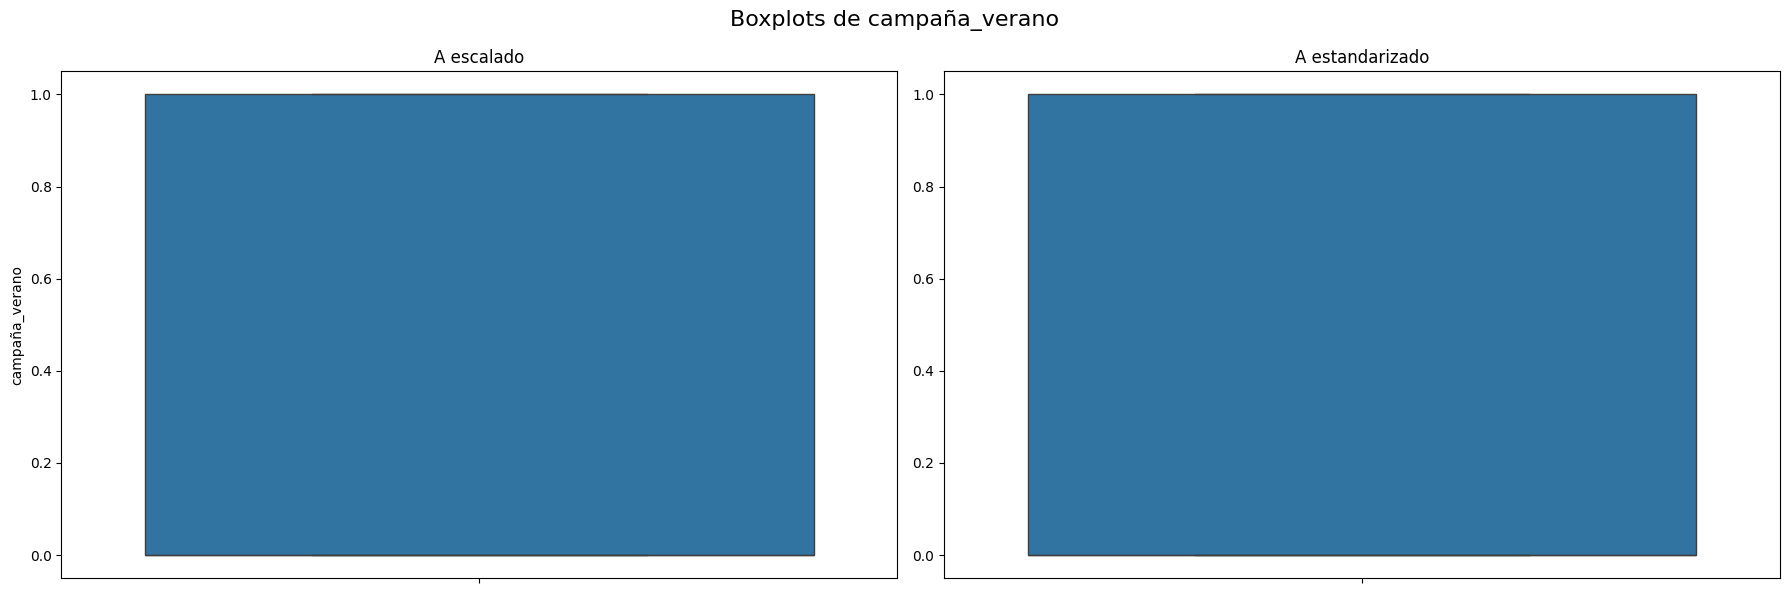

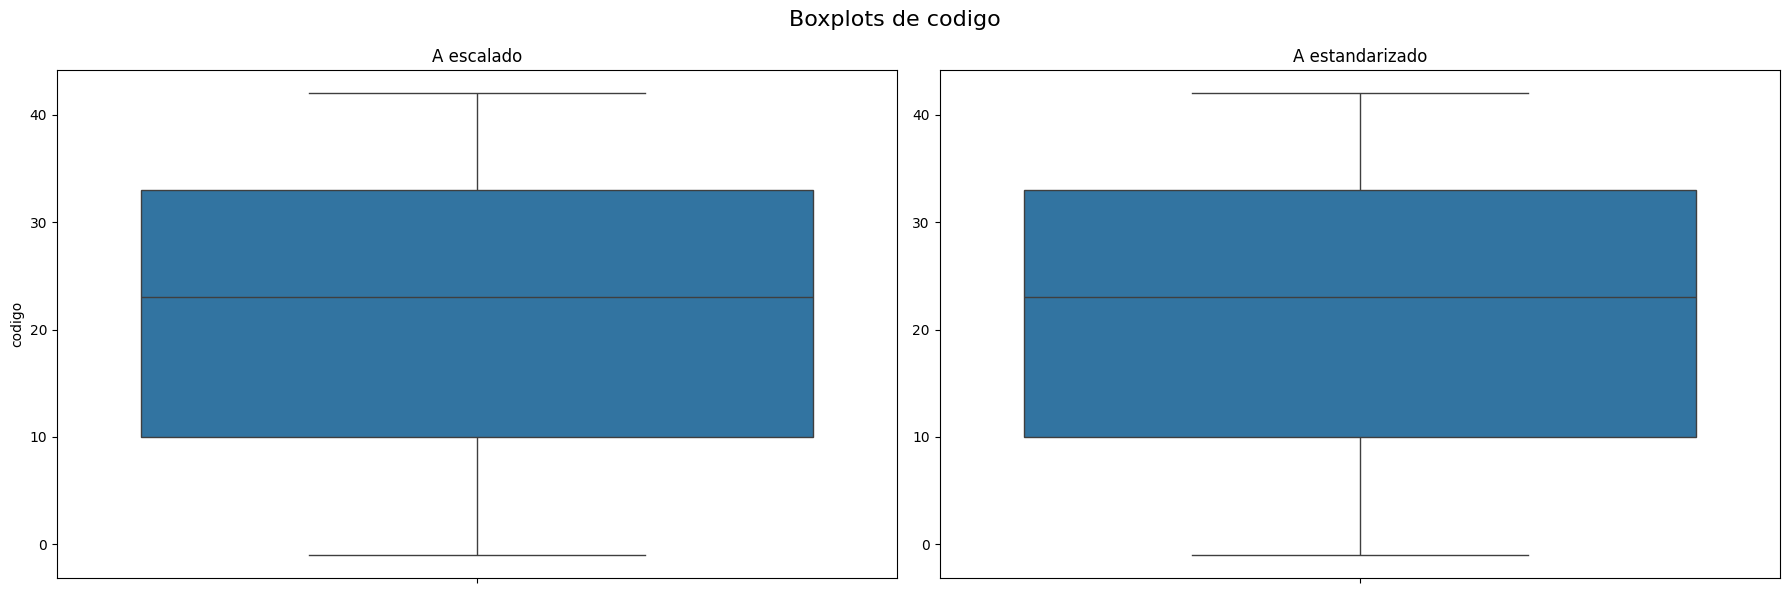

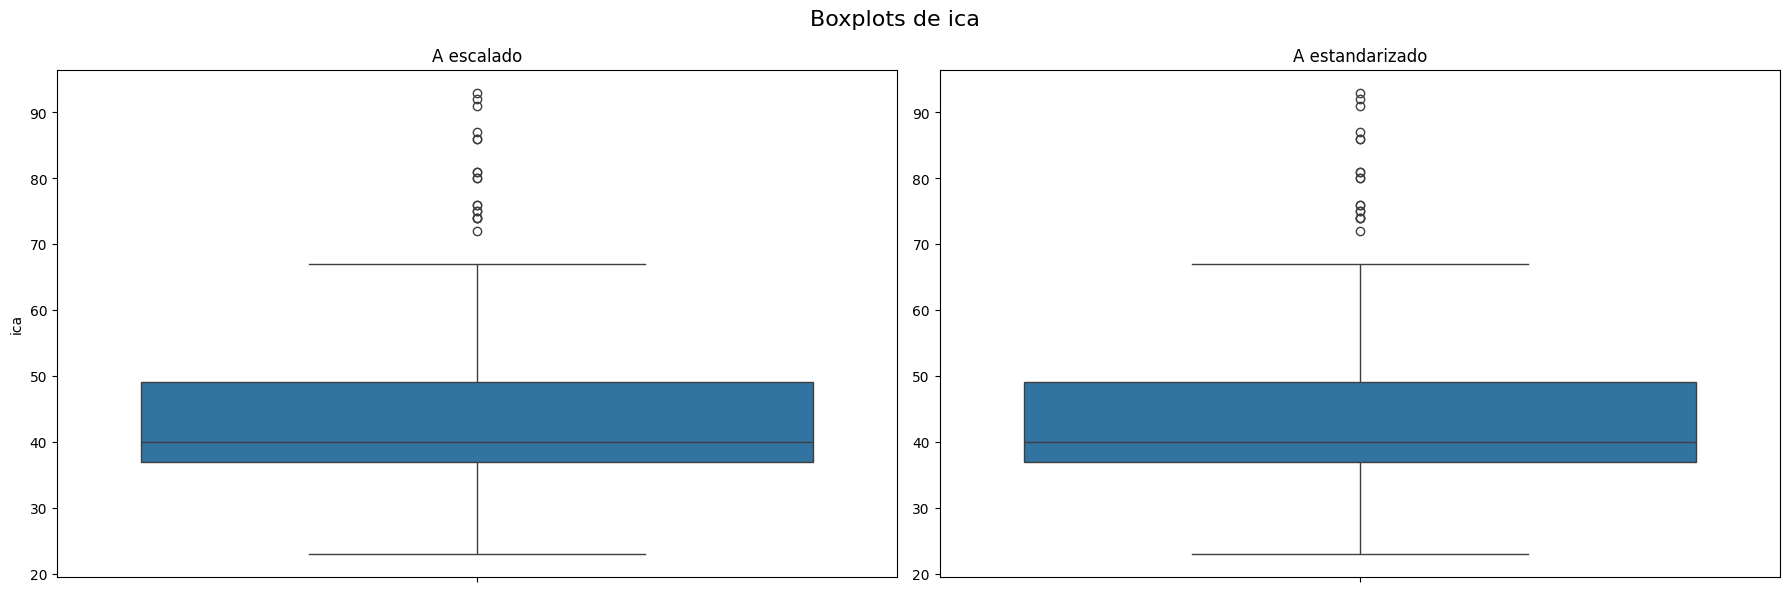

In [18]:
## Veamos boxplots para datasets A
boxplots(datasets_A, cols_A, 1, 2)

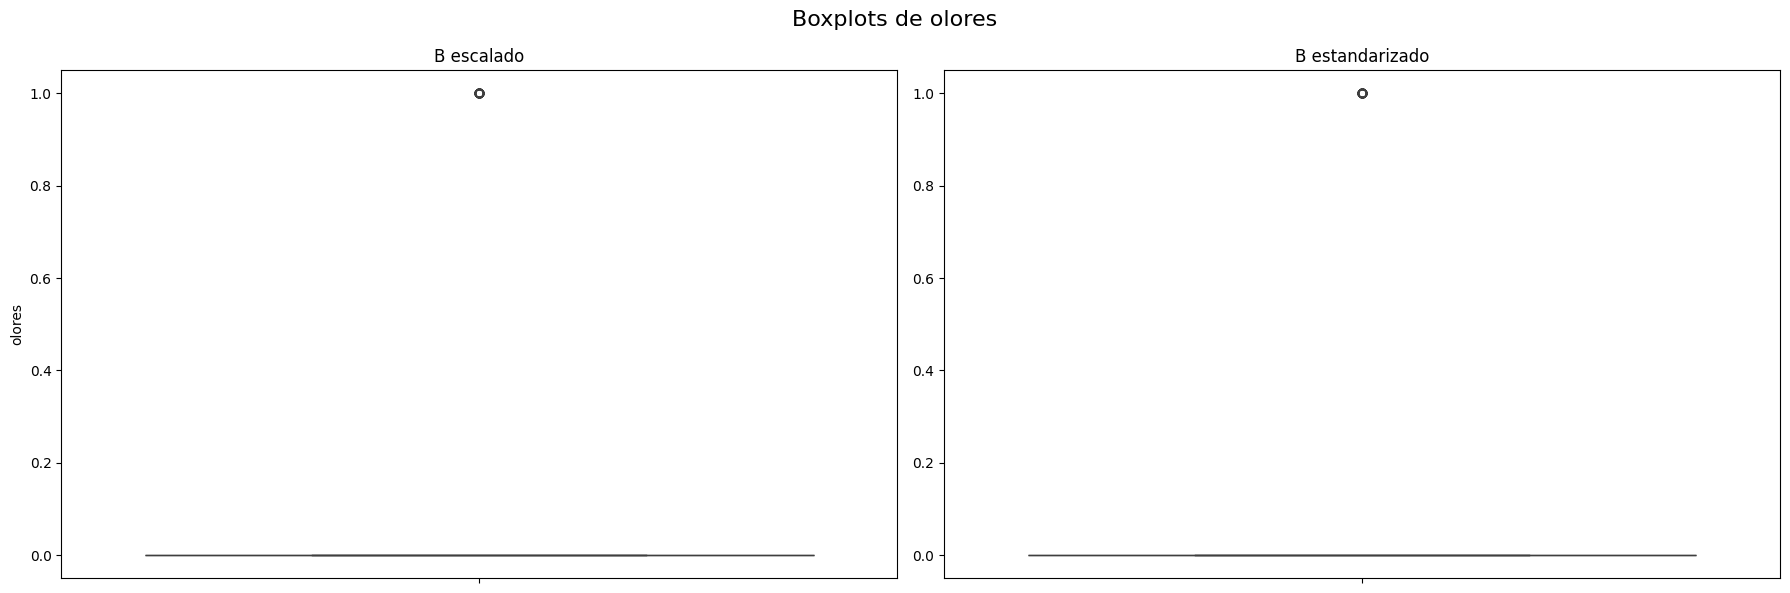

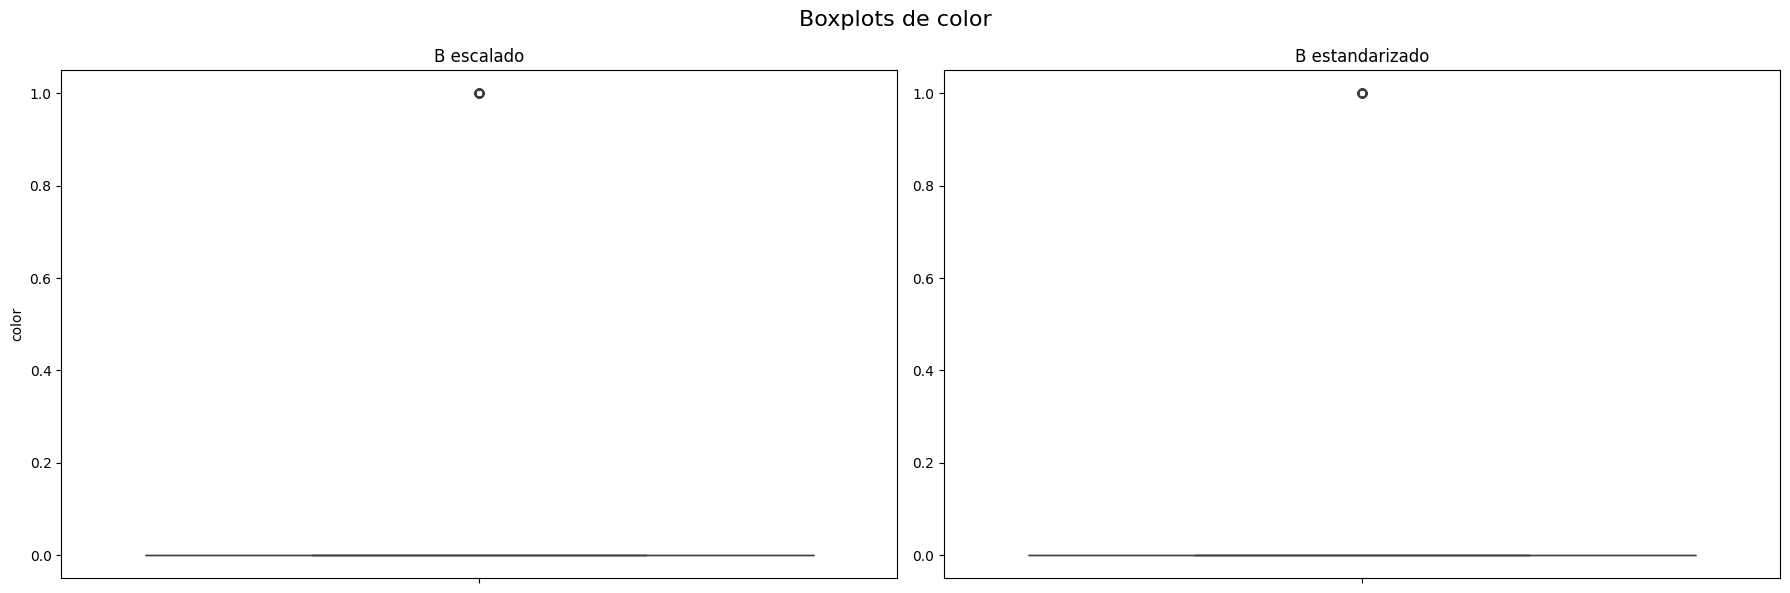

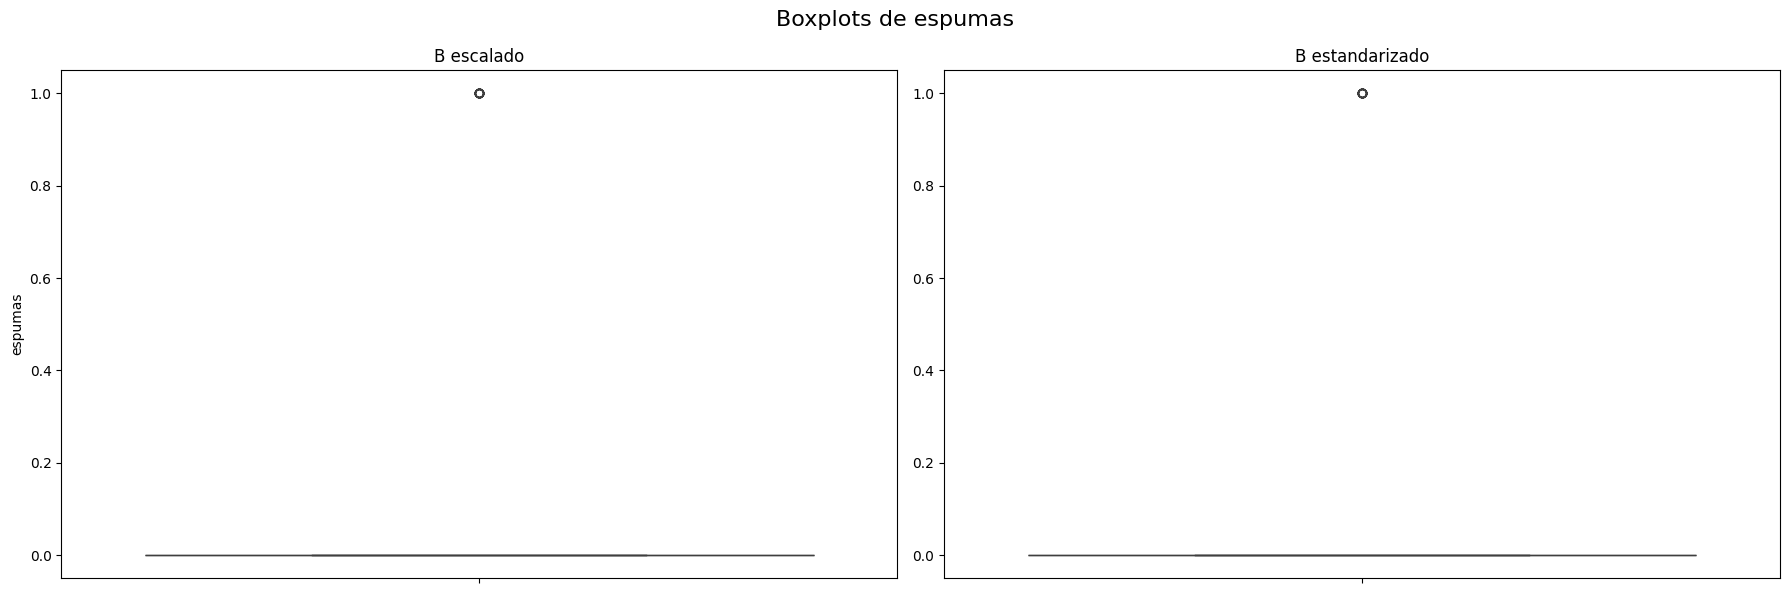

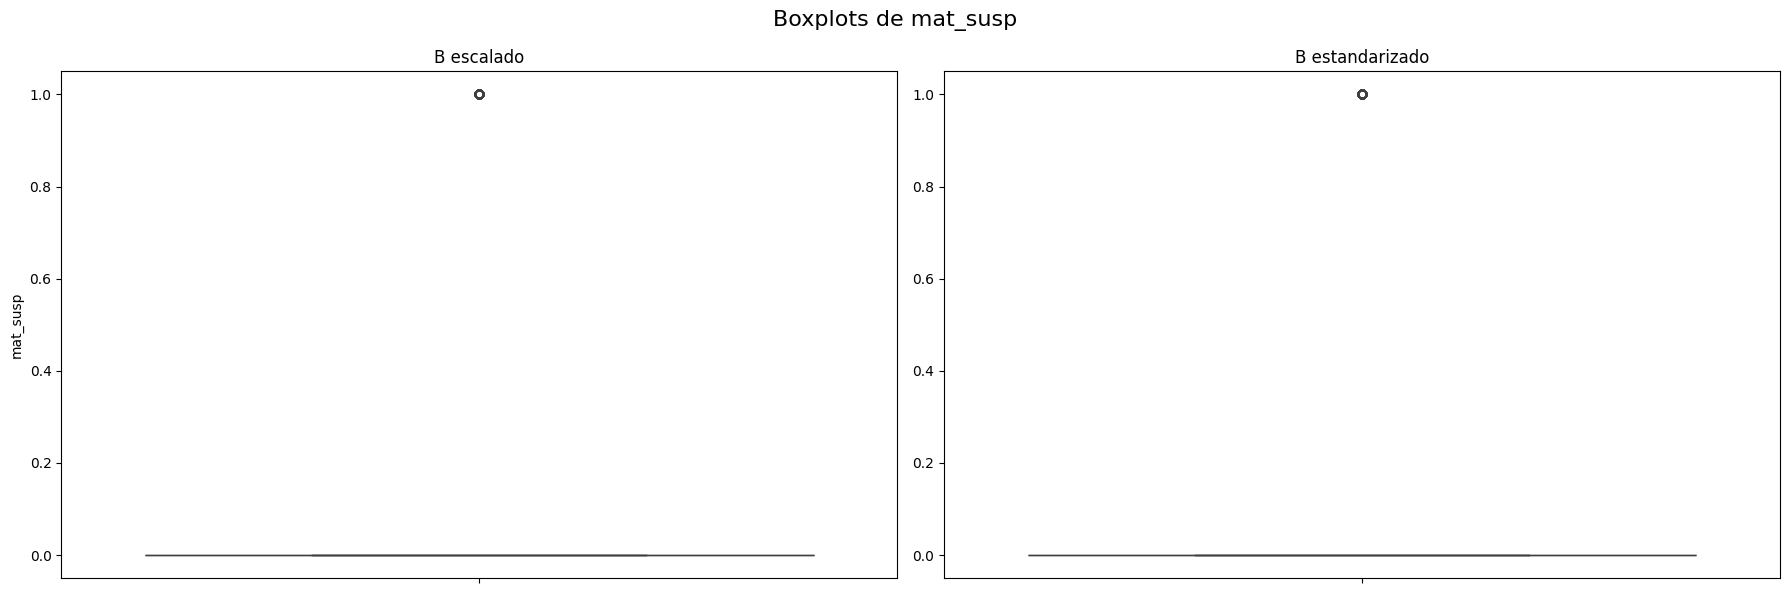

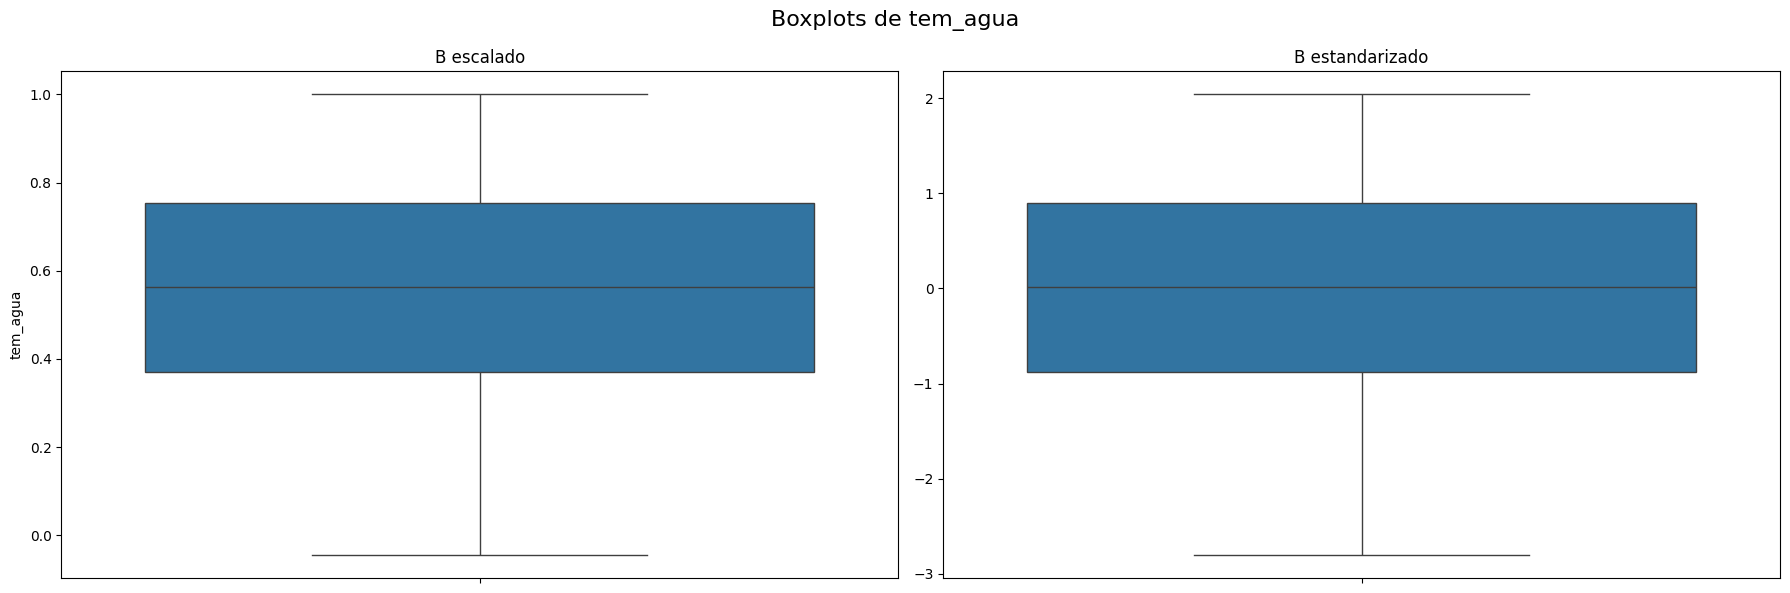

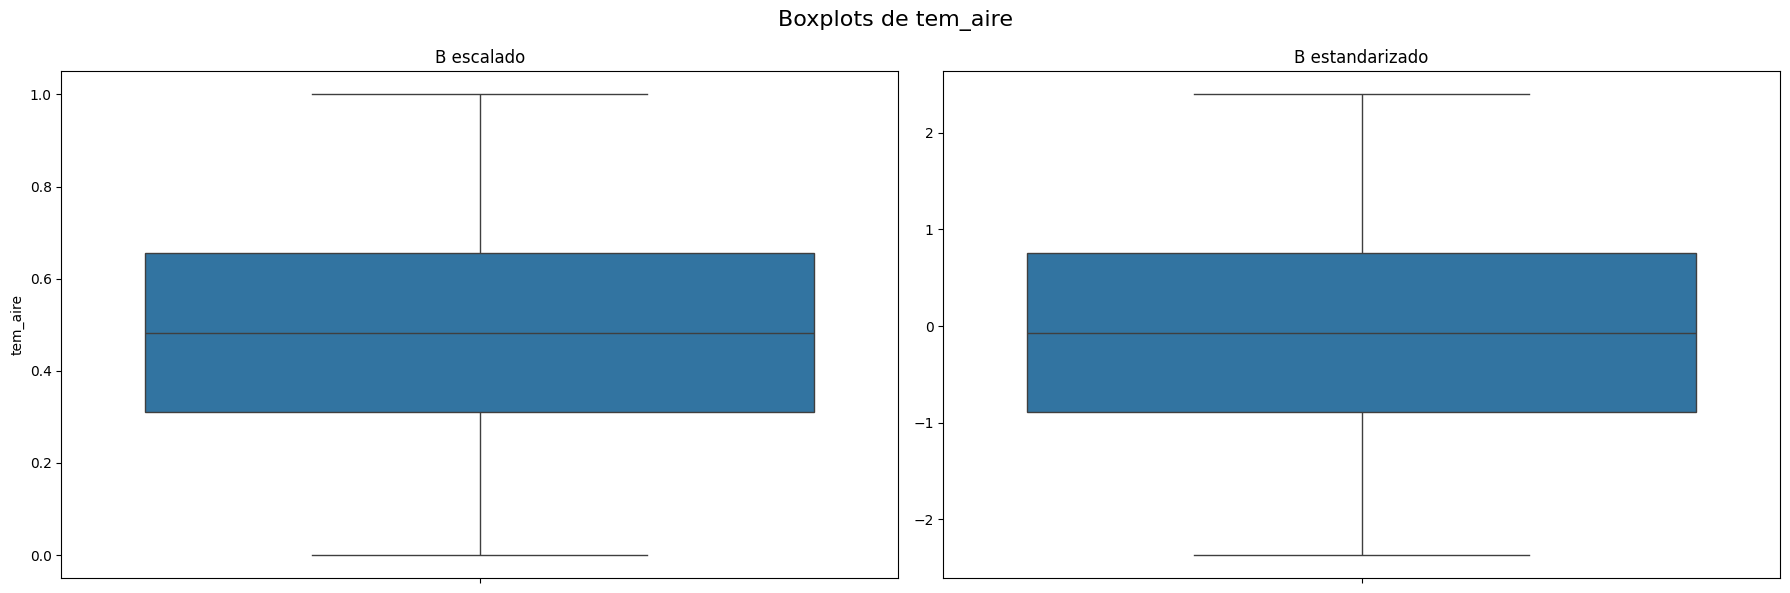

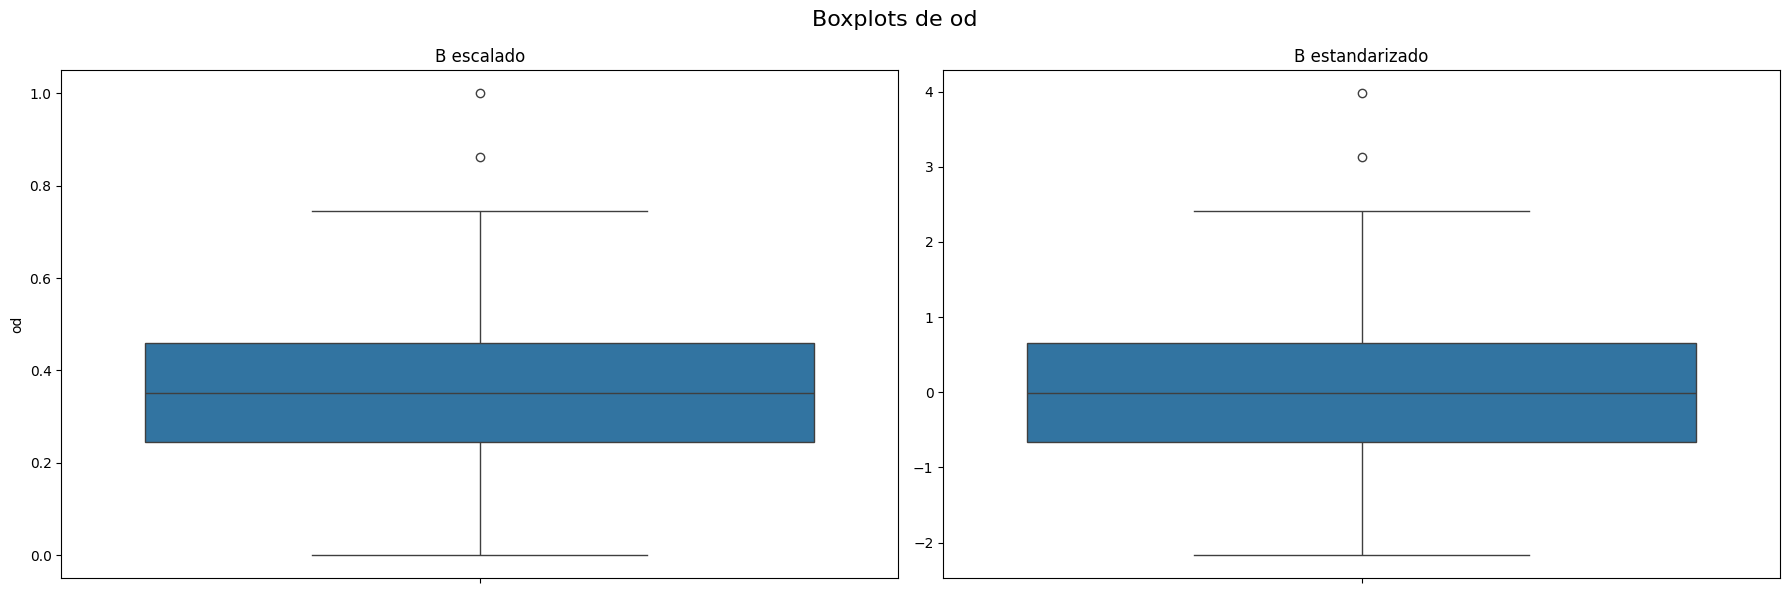

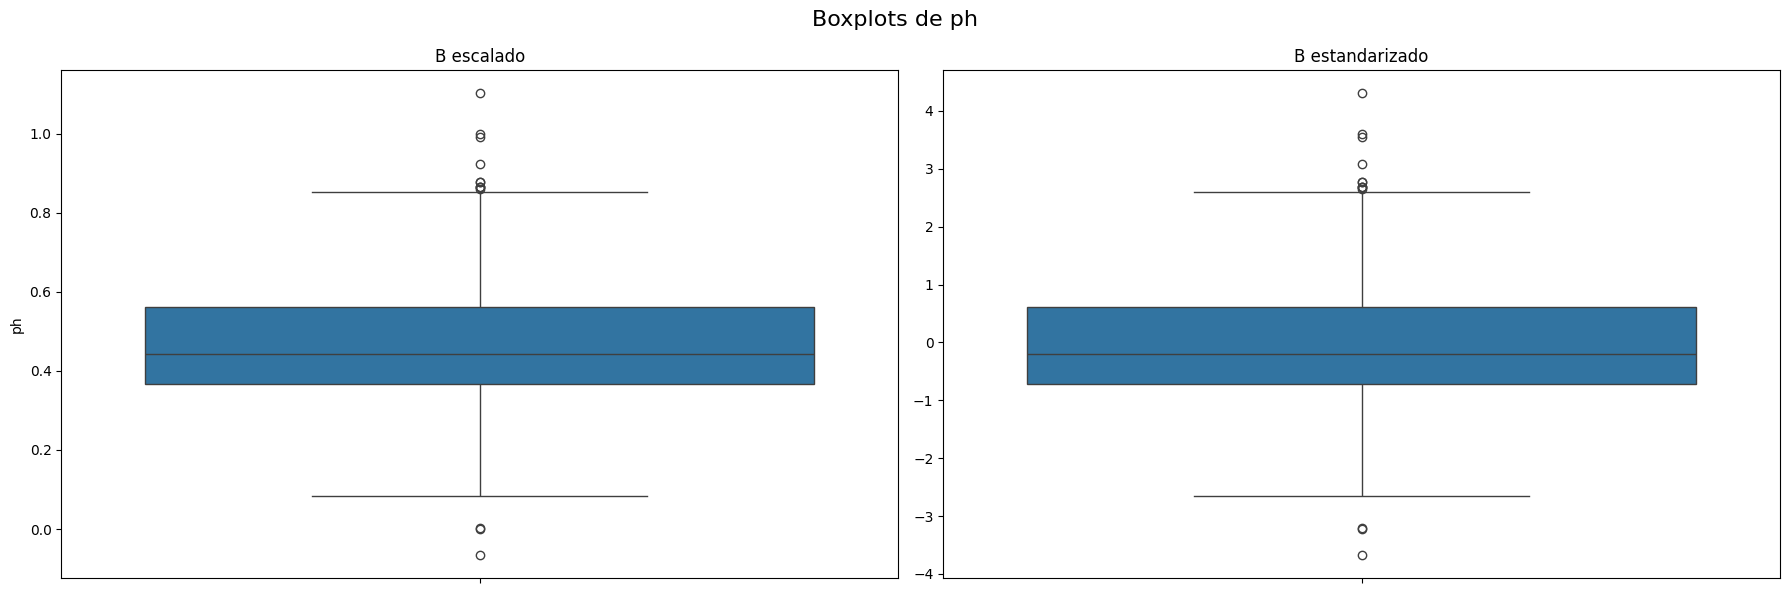

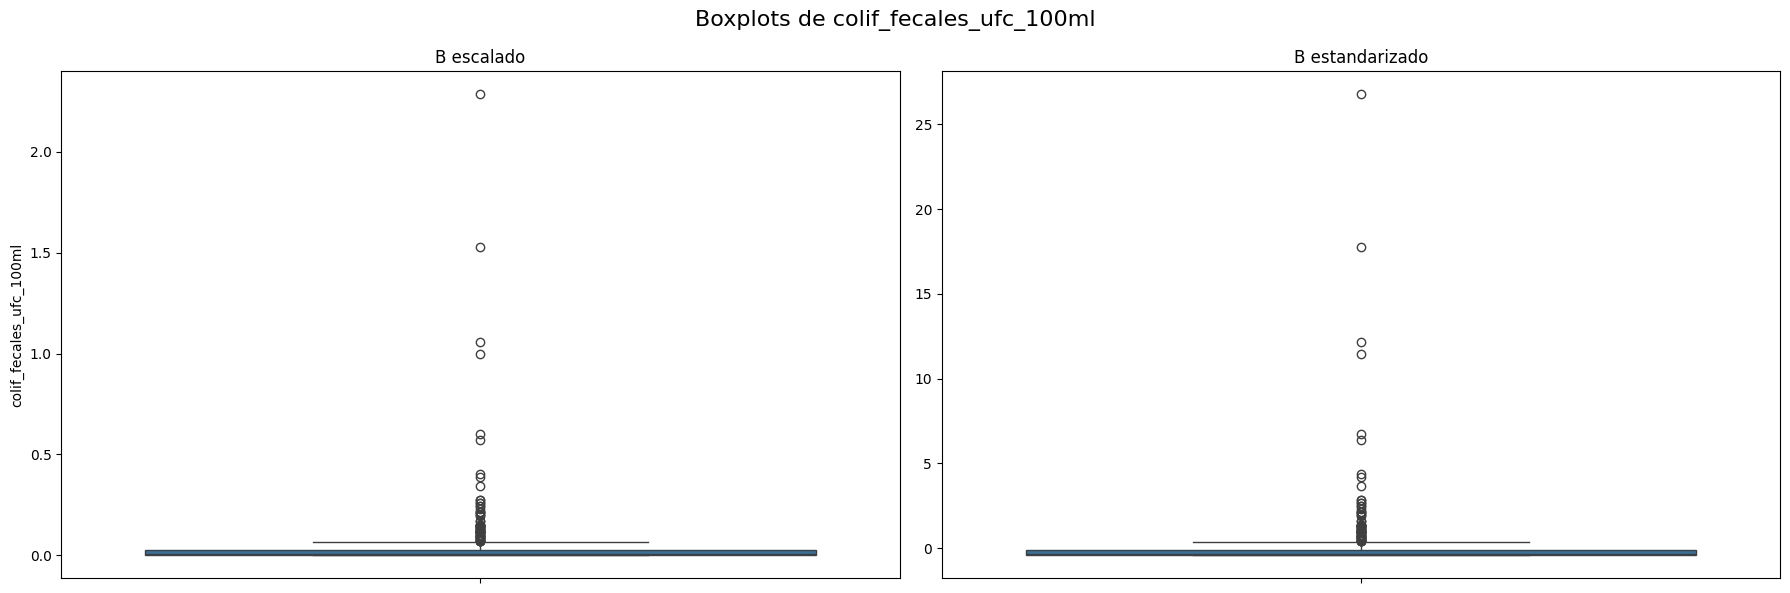

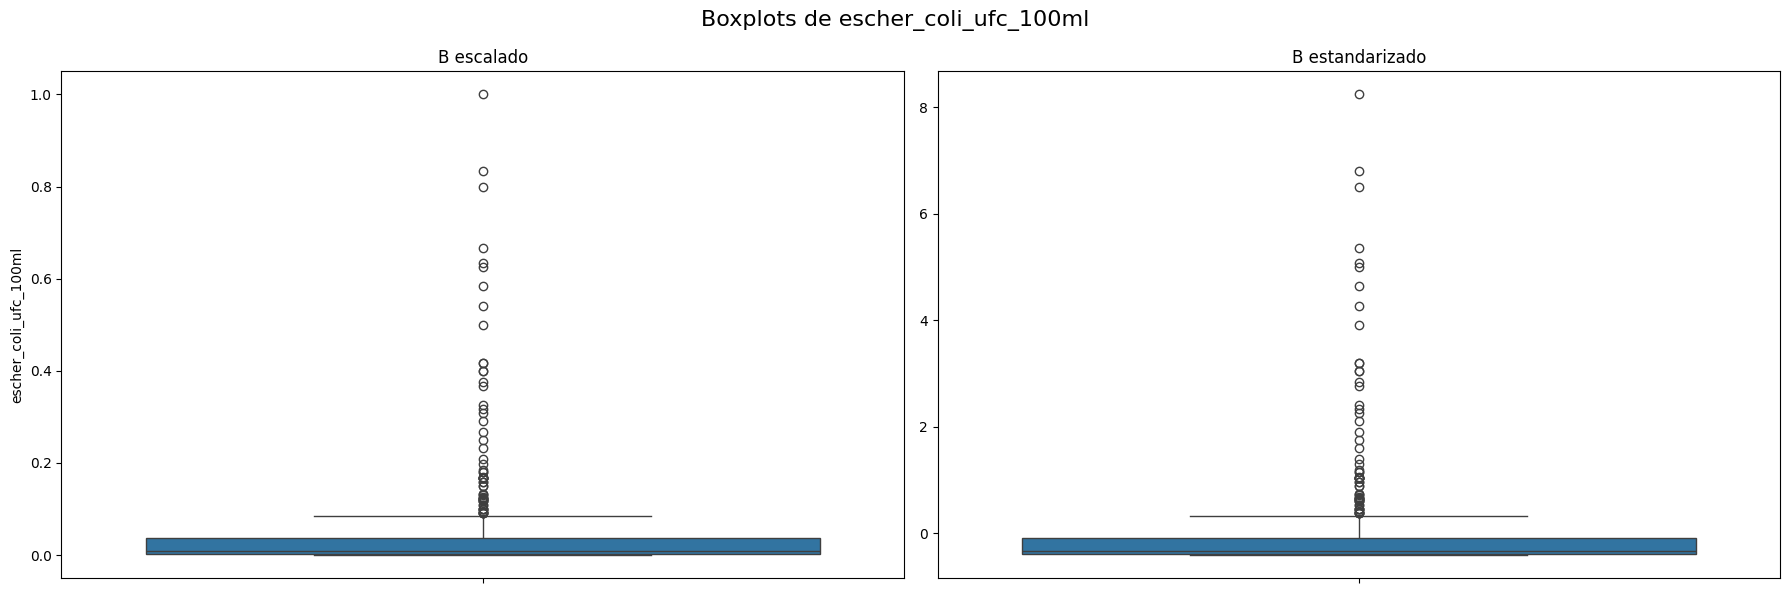

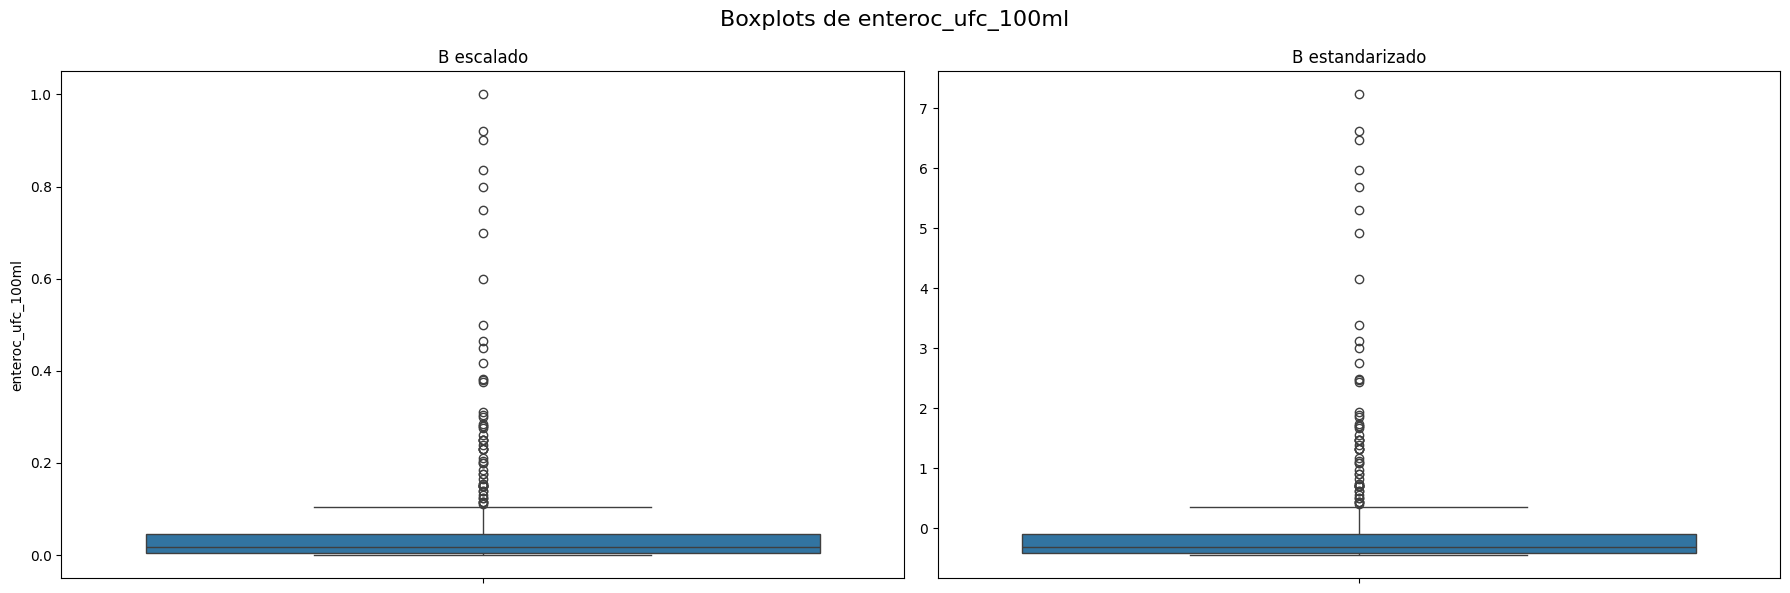

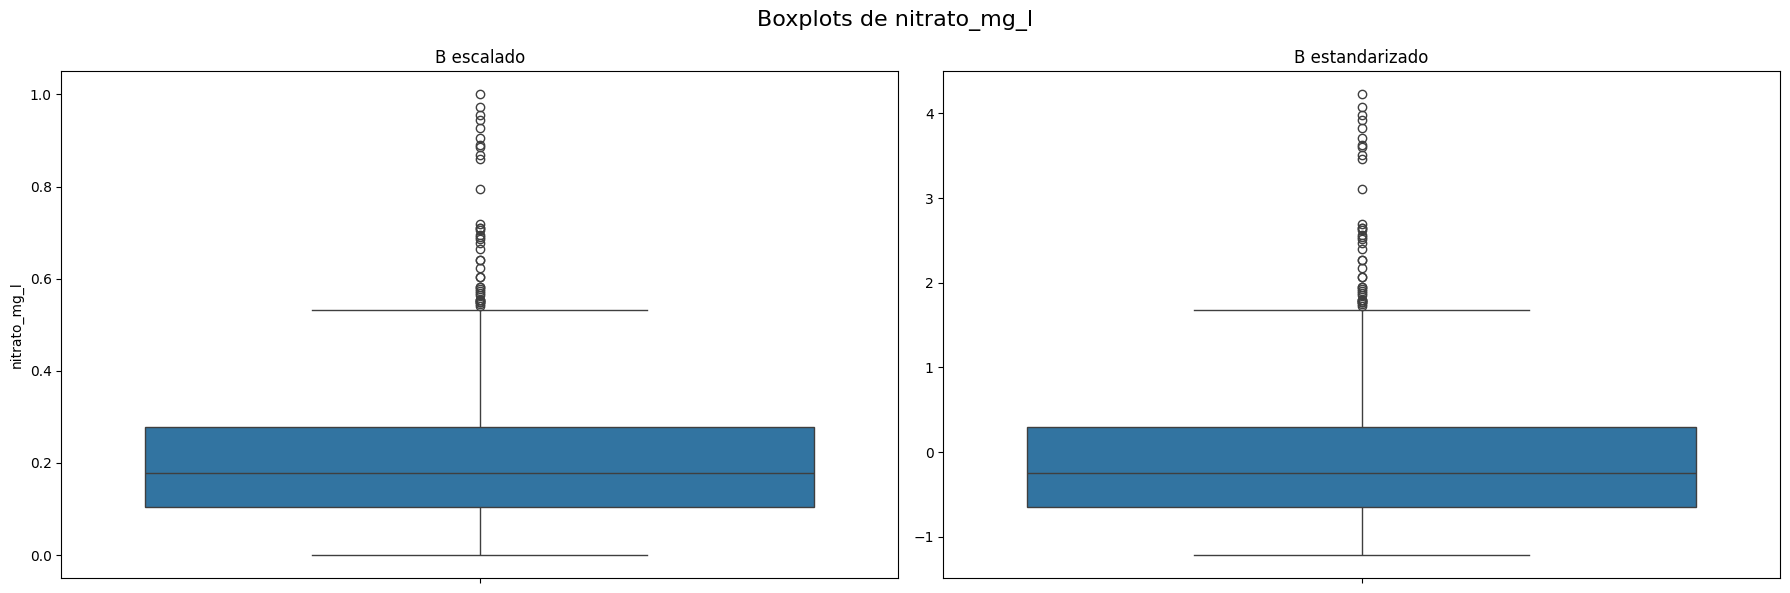

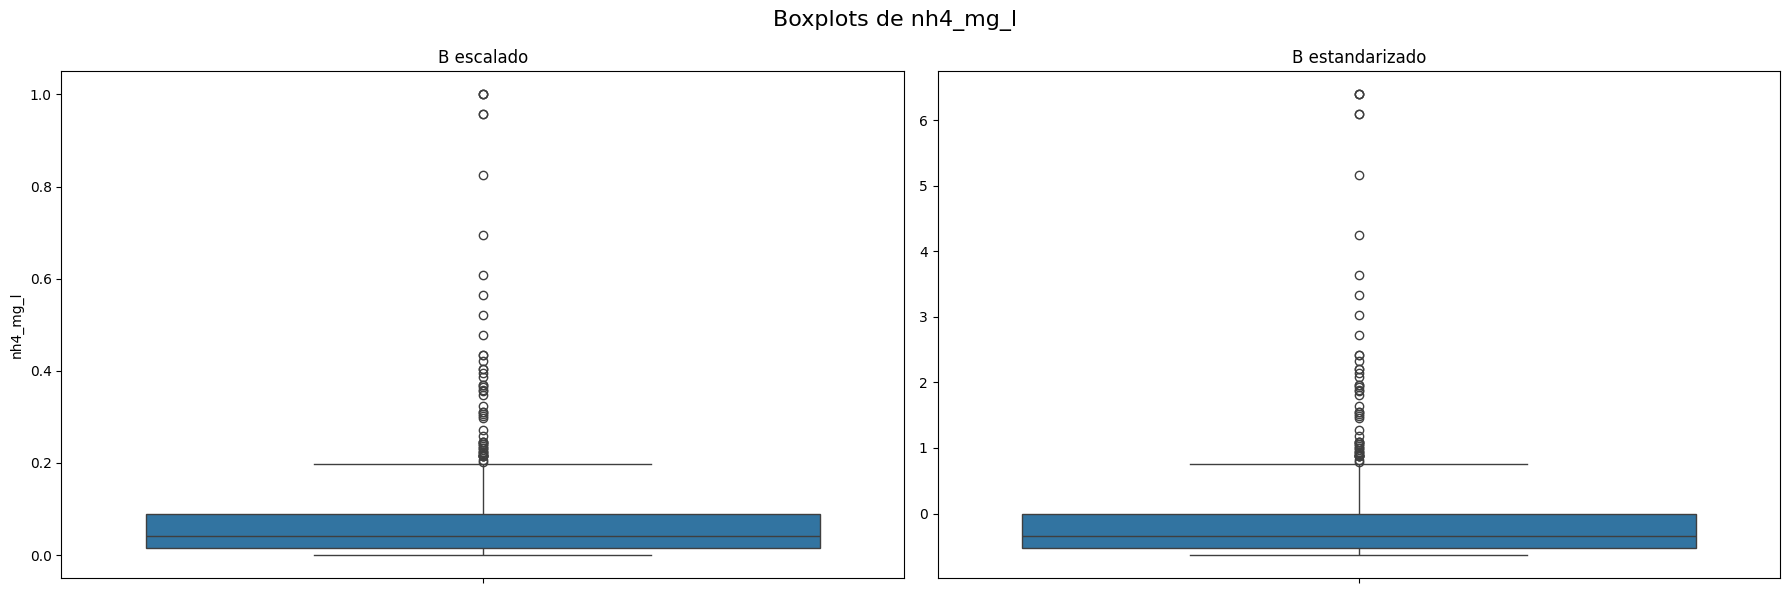

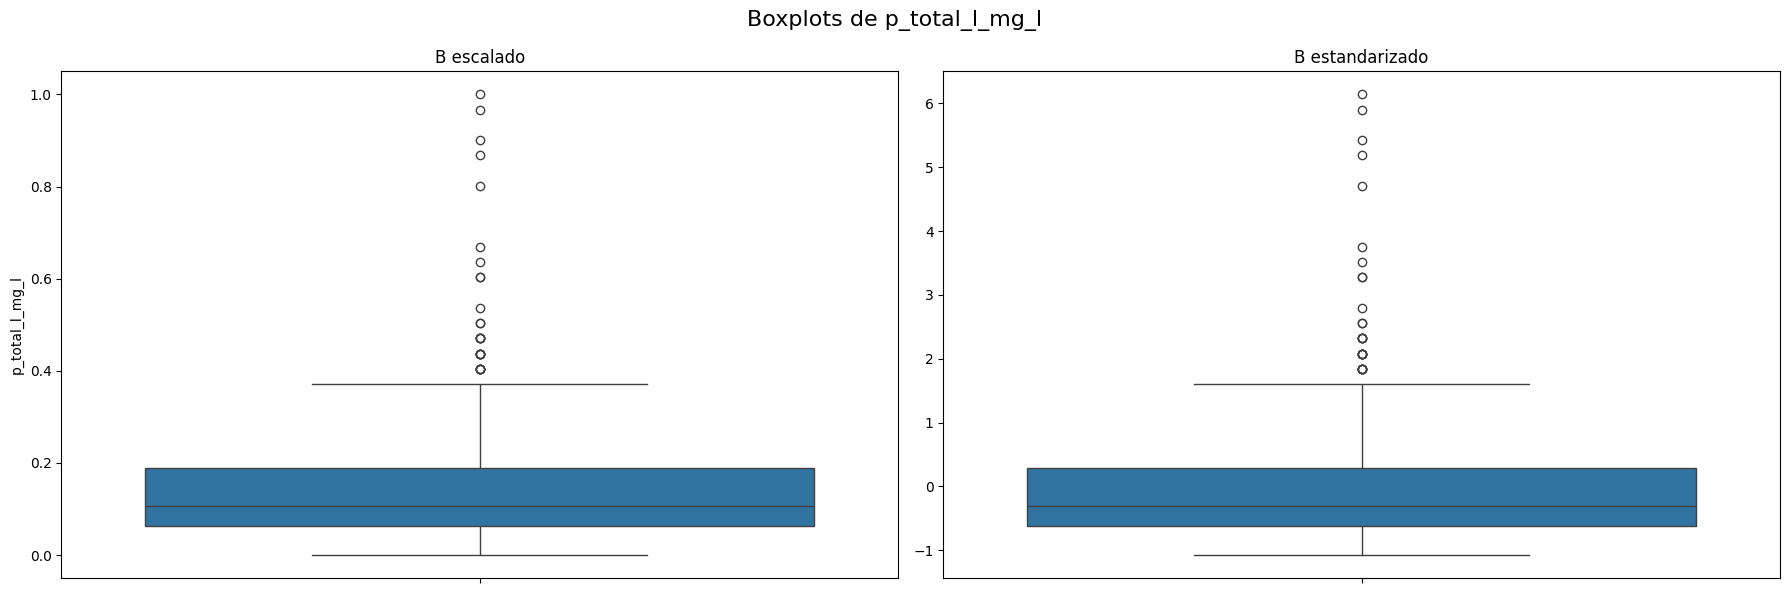

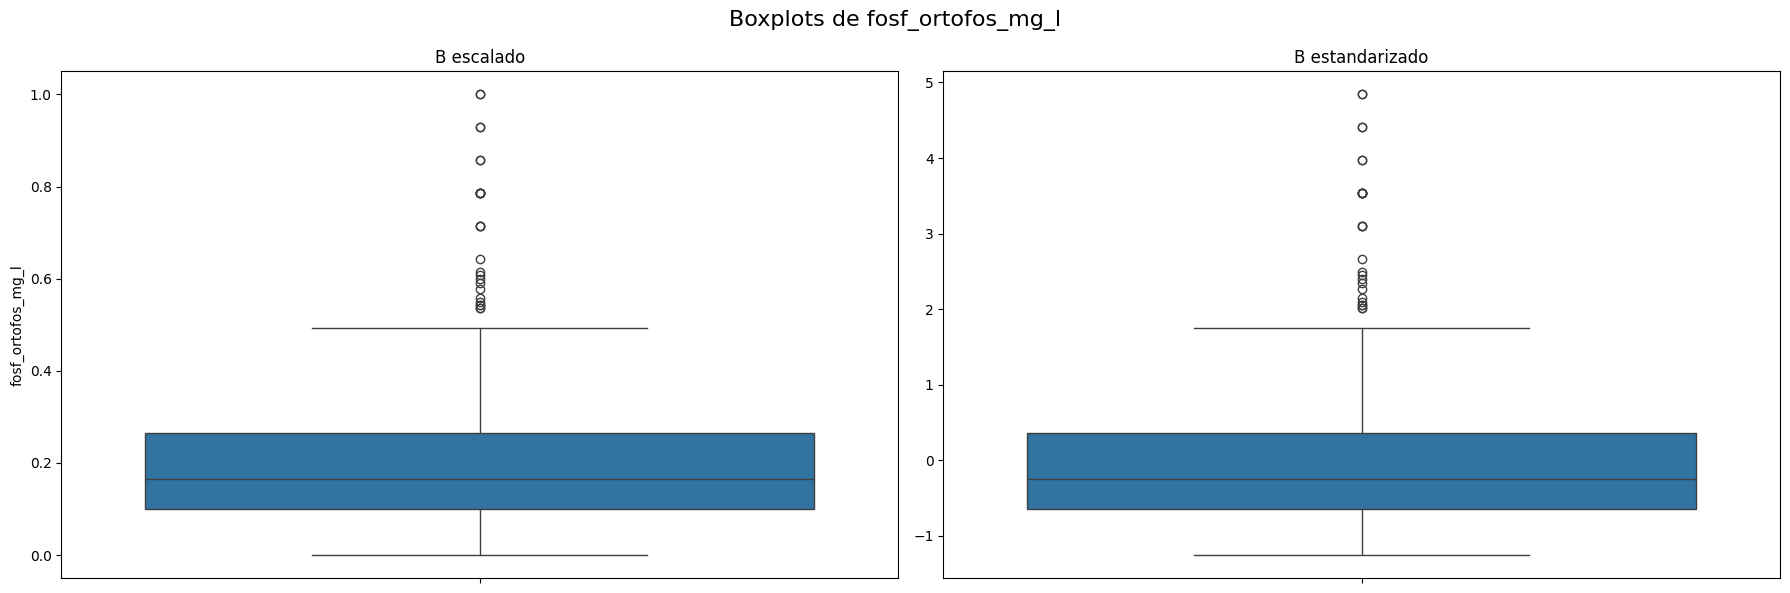

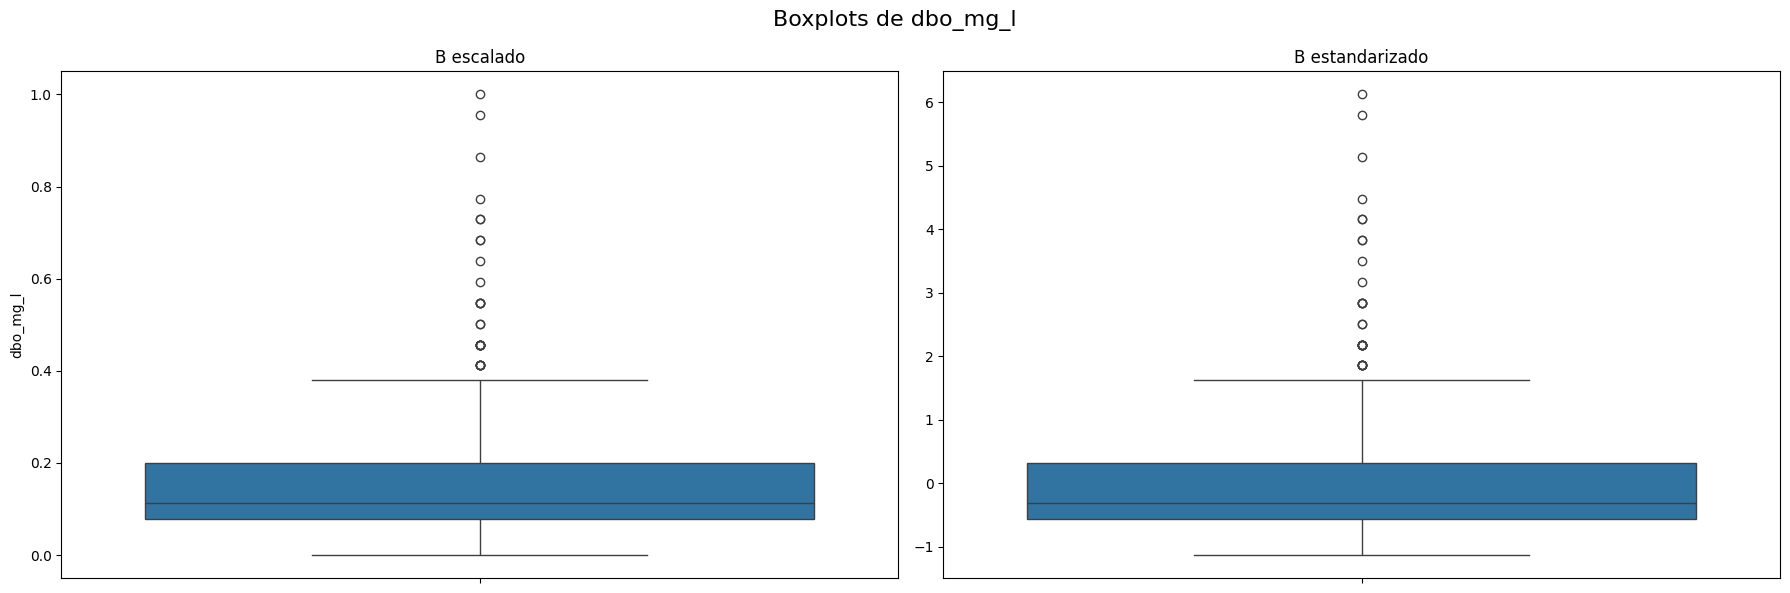

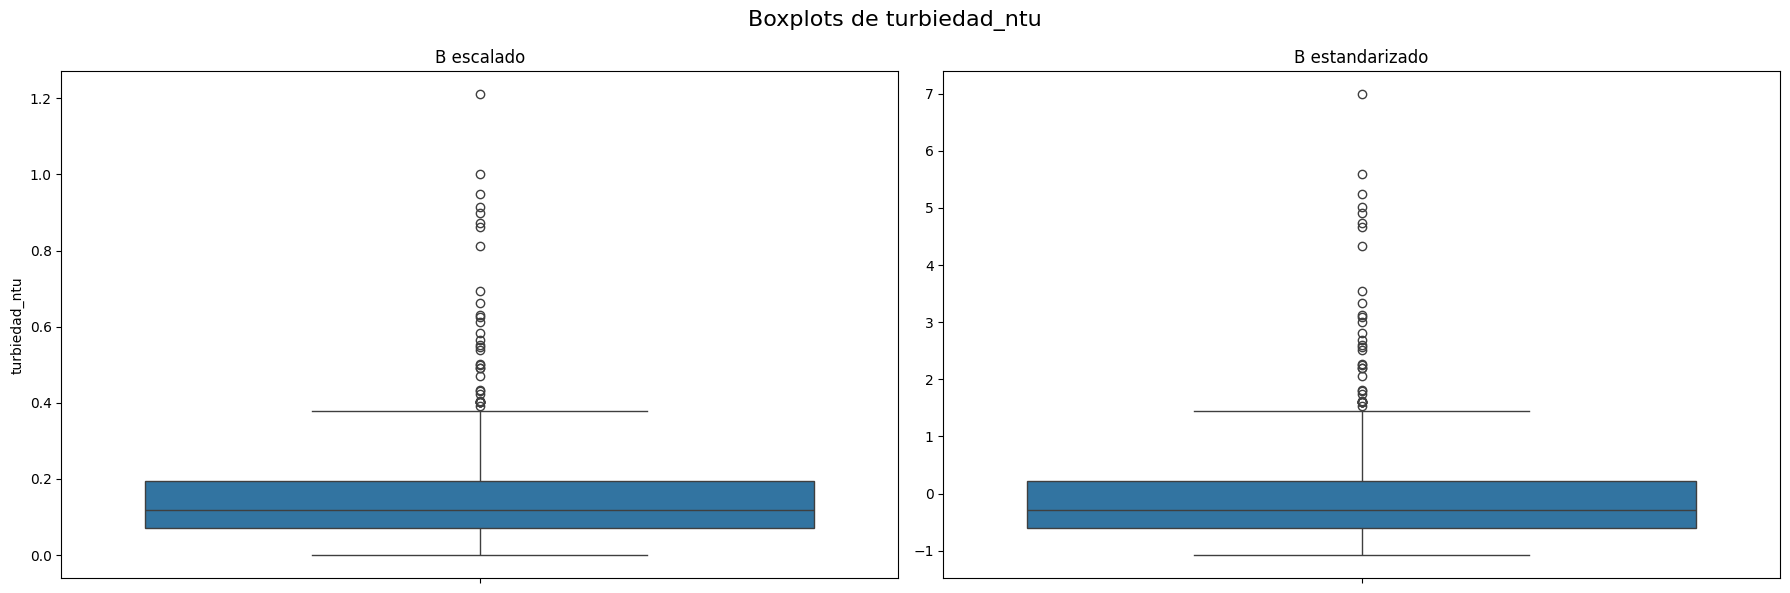

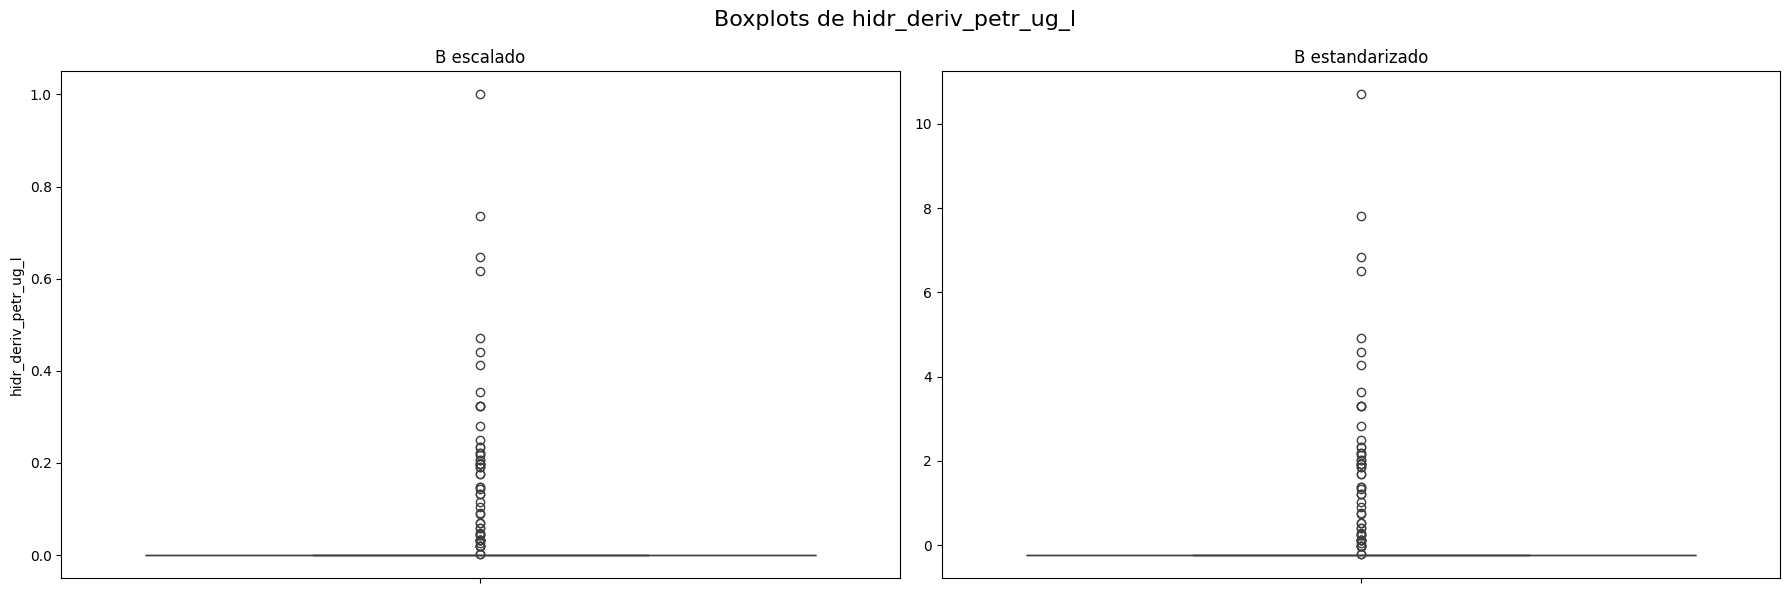

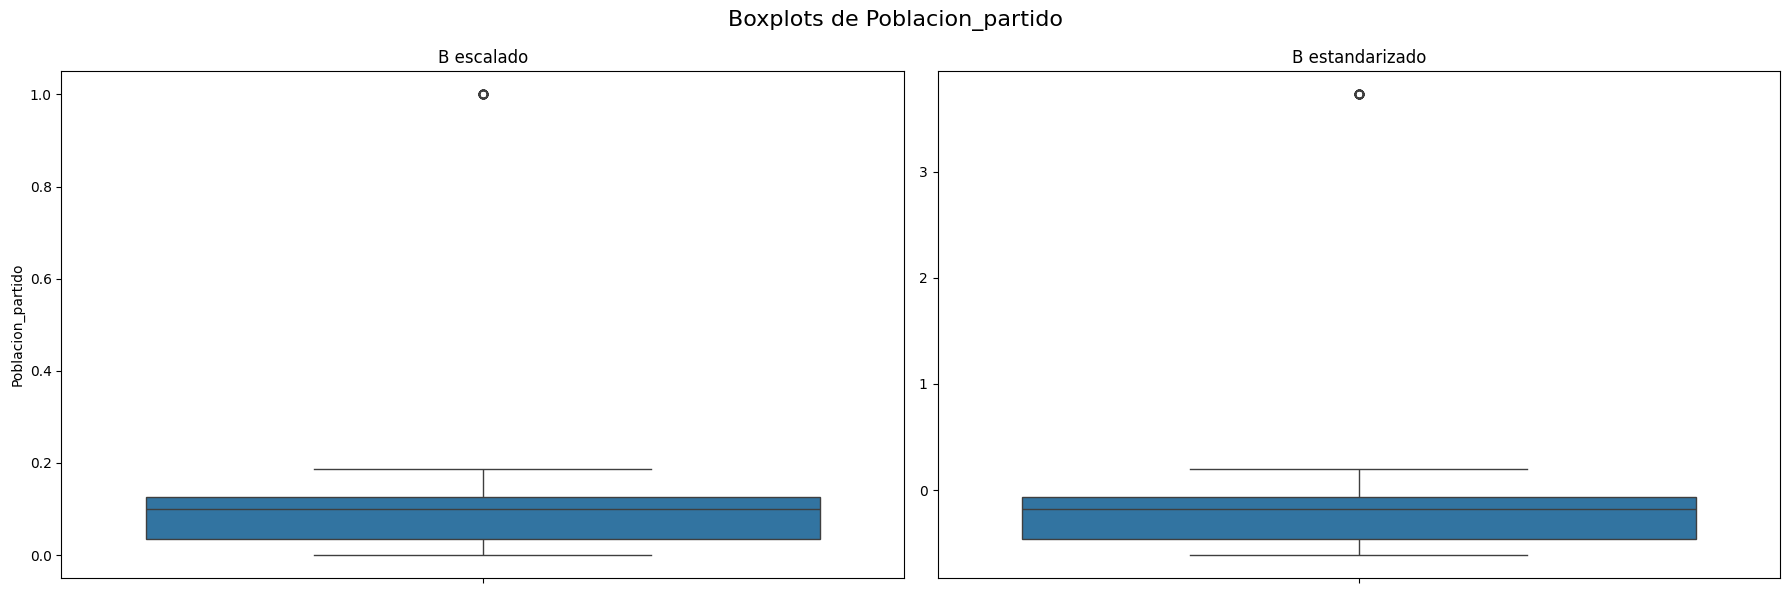

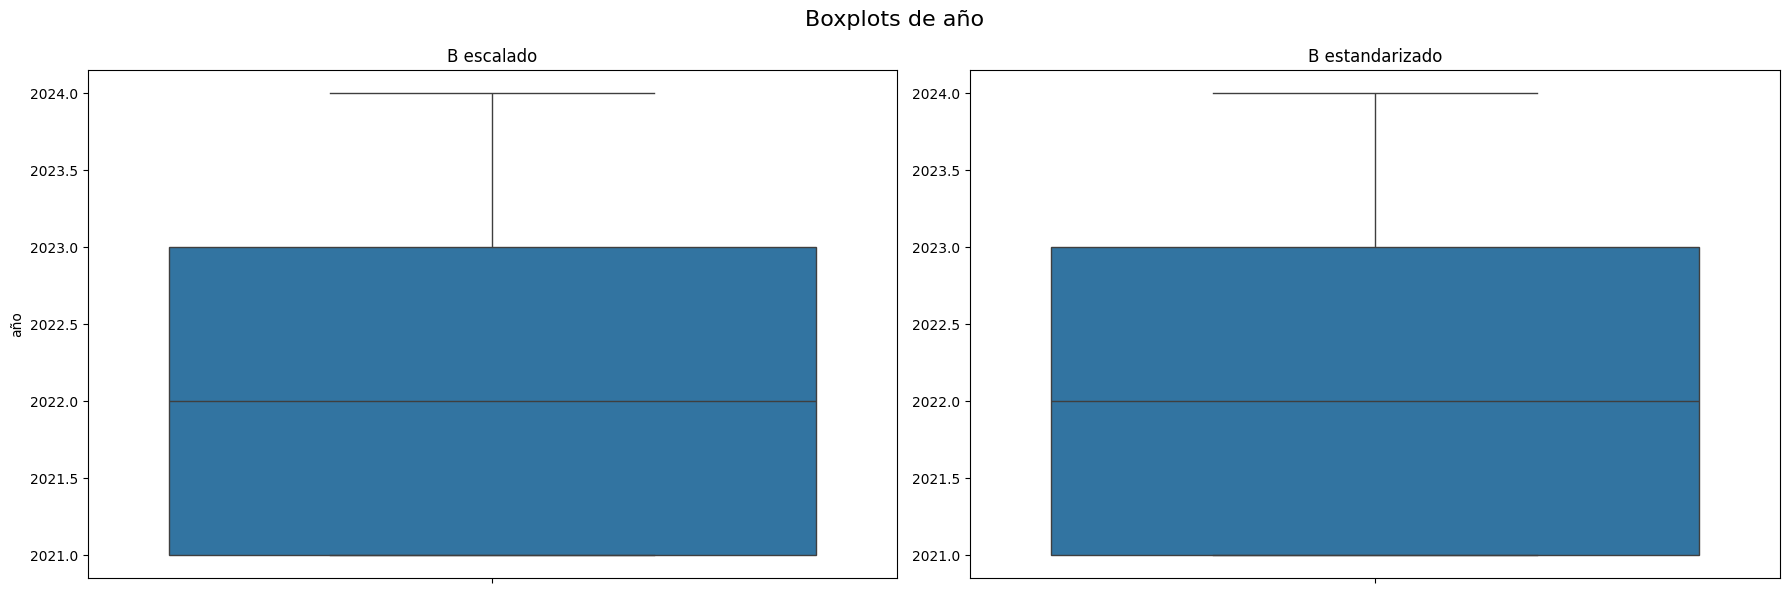

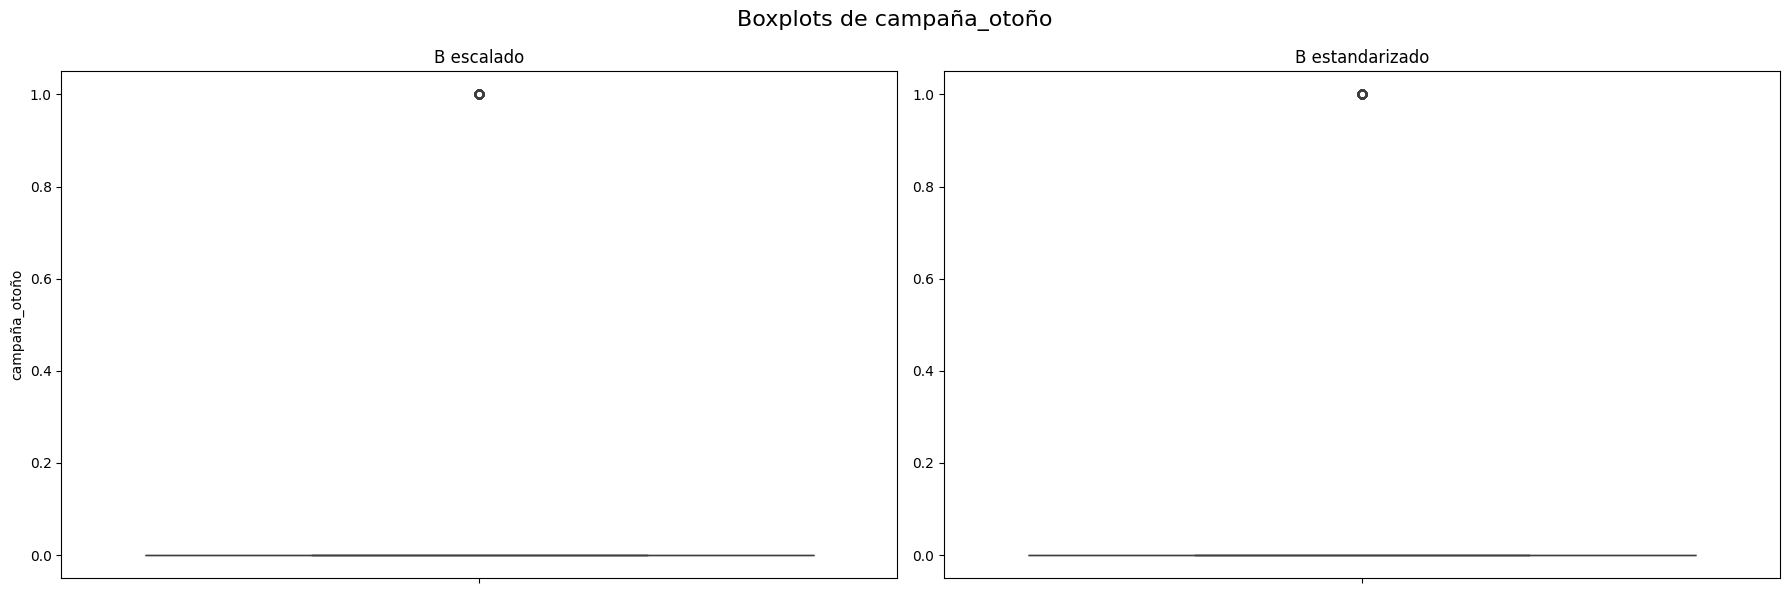

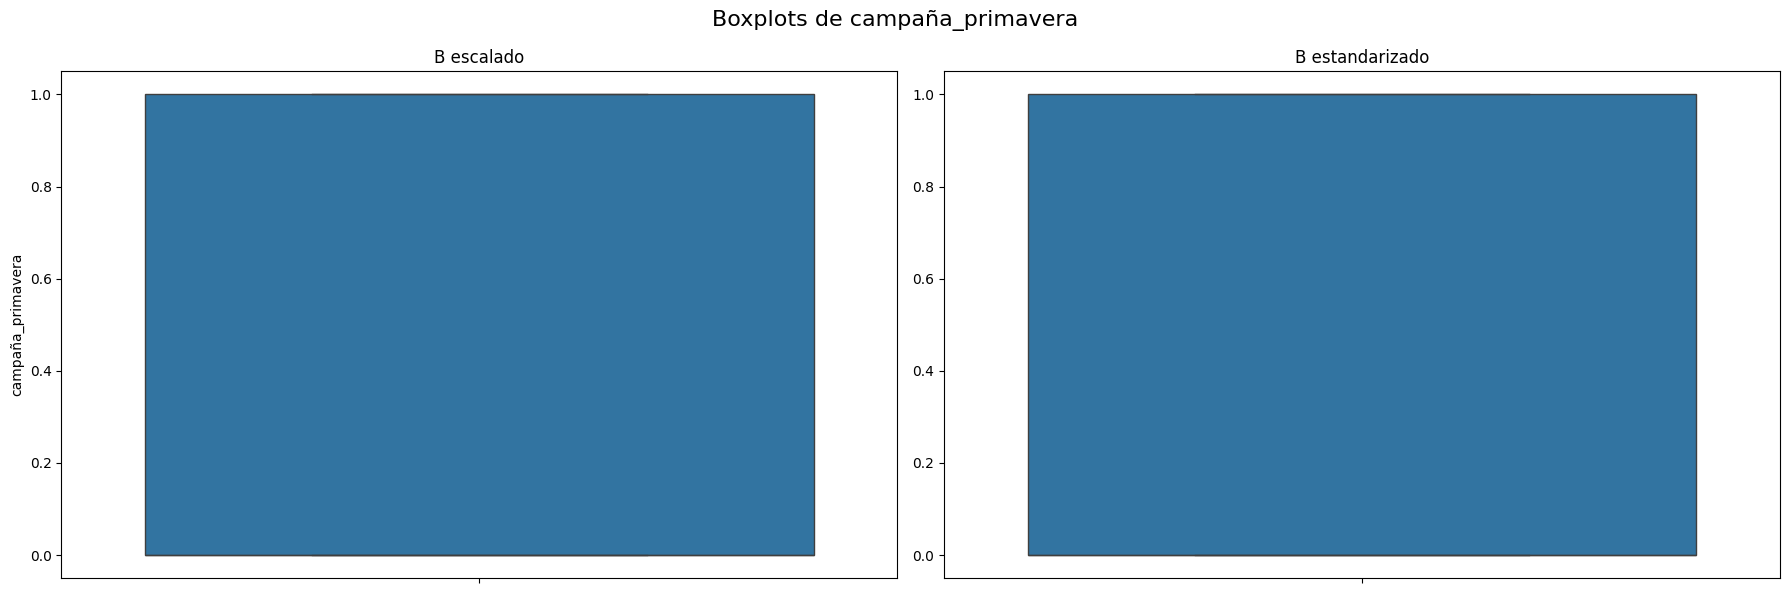

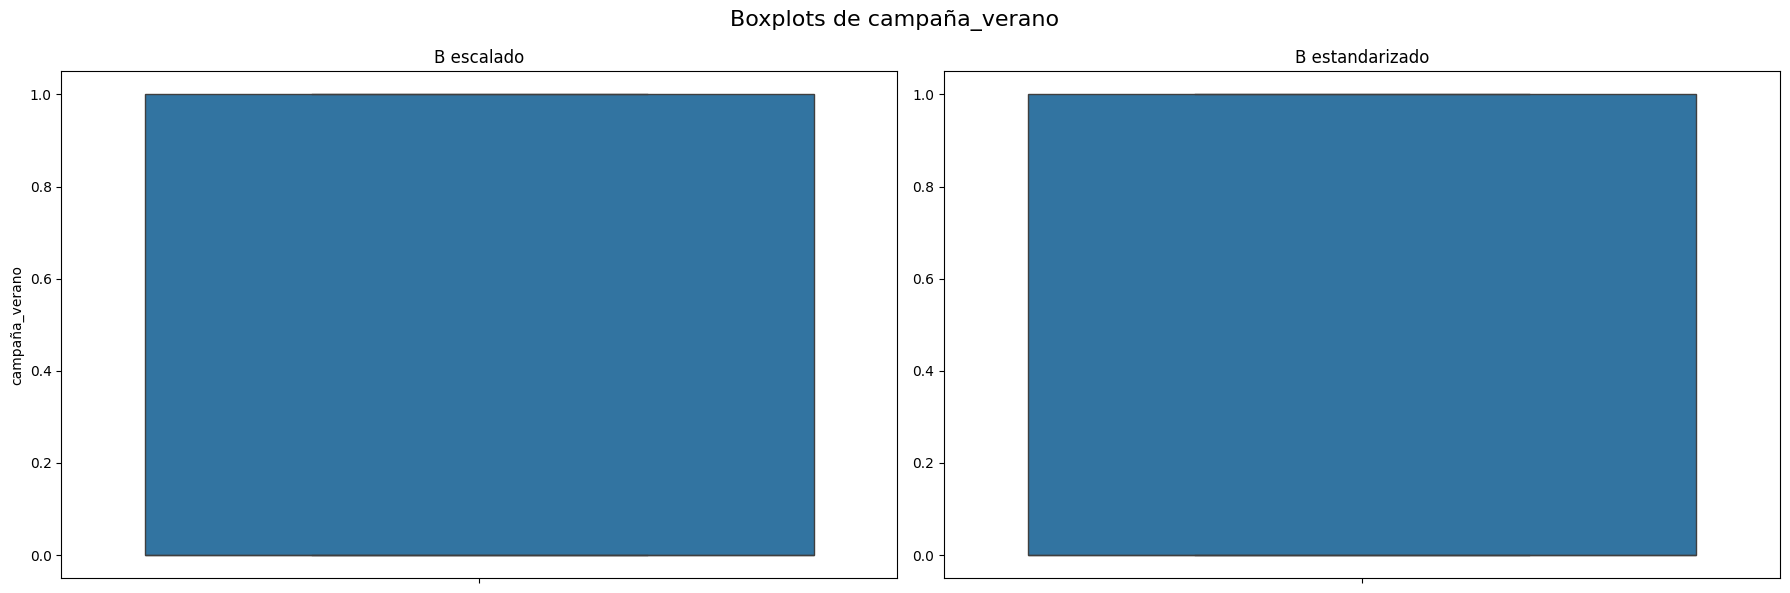

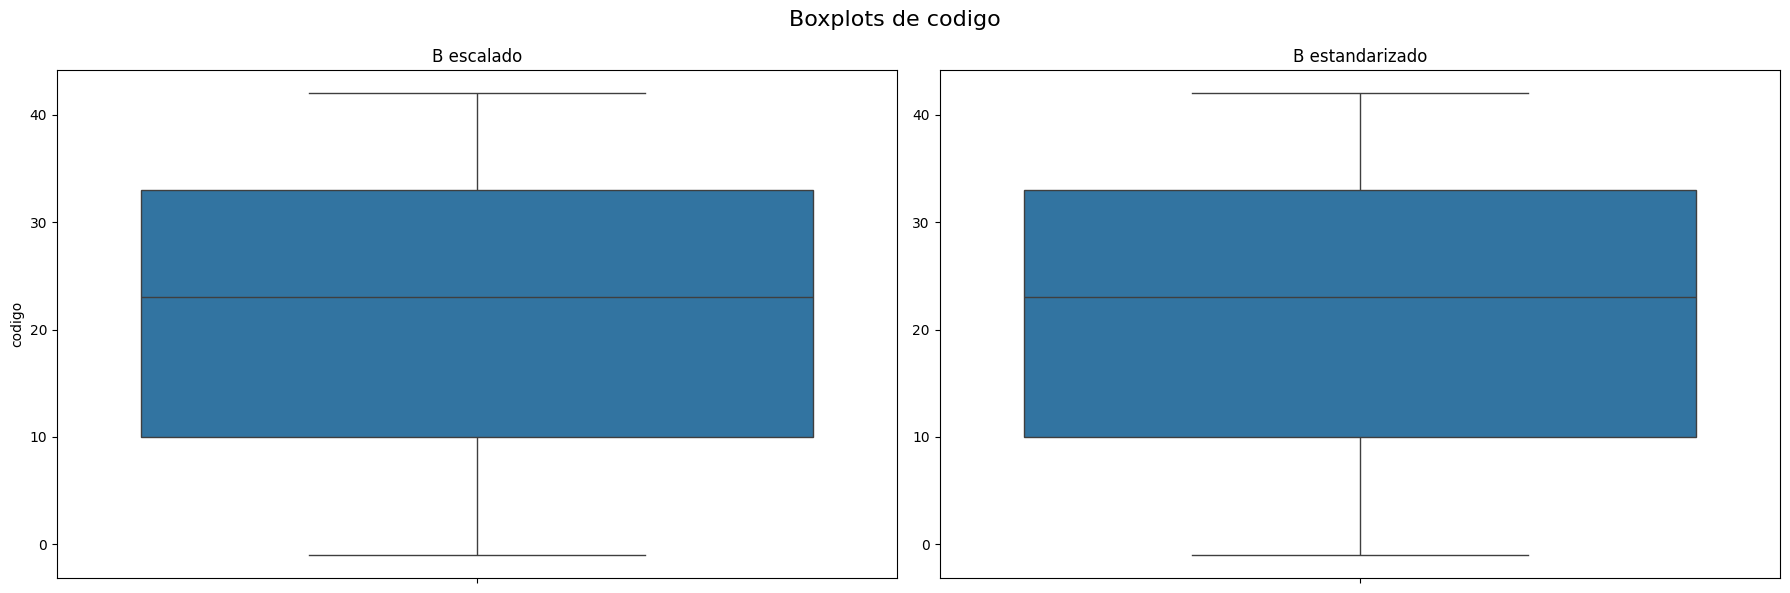

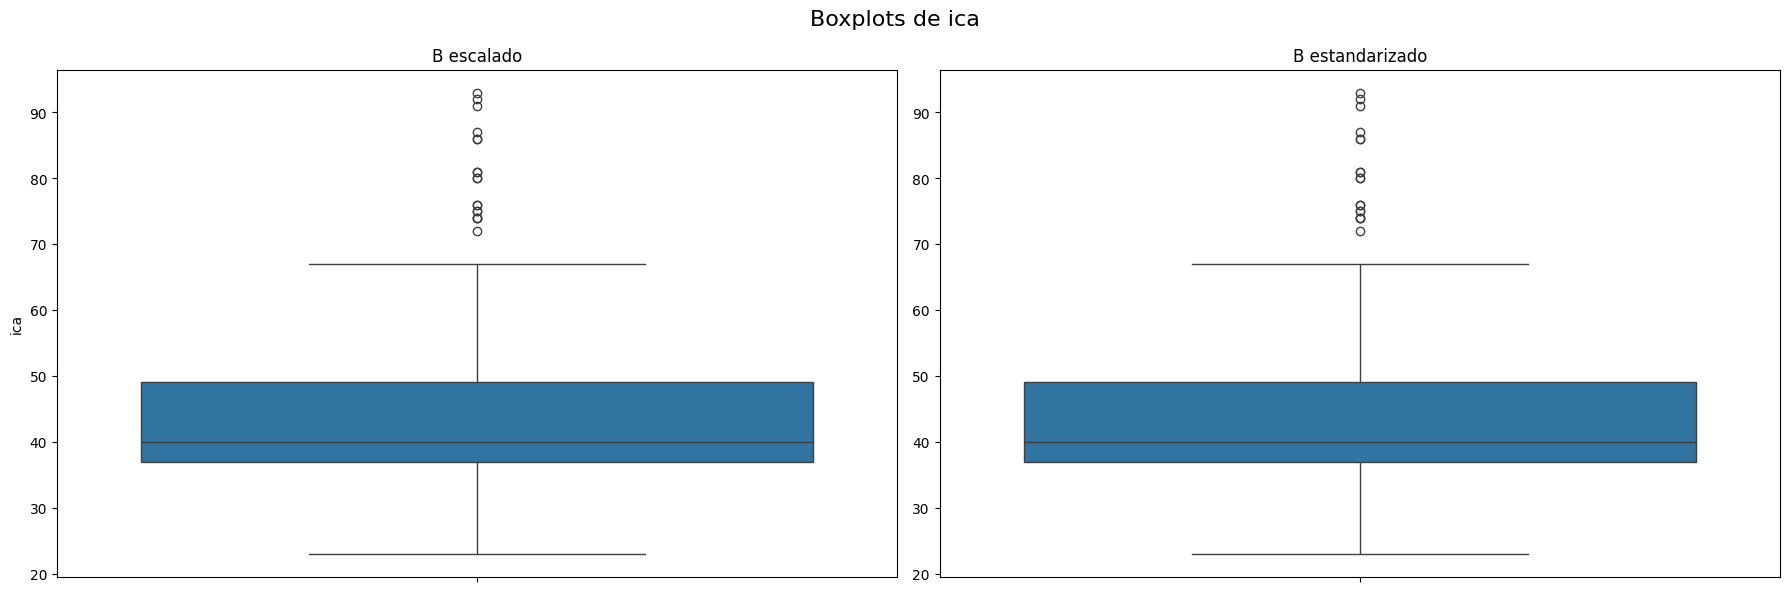

In [19]:
## Veamos boxplots para datasets B
boxplots(datasets_B, cols_B, 1, 2)

### 1.E. Verificación de Existencia de Muestras Repetidas

Verificamos si existen muestras repetidas. Lo hacemos excluyendo la columna de la variable objetivo 'ica'.

In [20]:
print('Cantidad de valores duplicados en:')
for name, dataset in datasets.items():
    print(f"\t{name}: {dataset.drop(labels='ica', axis=1, inplace=False).duplicated().sum()}")

Cantidad de valores duplicados en:
	A escalado: 0
	A estandarizado: 0
	B escalado: 0
	B estandarizado: 0


---
## 2. Modelos de Regresión

En esta sección exploraremos diferentes tipos de modelos de regresión que consideraremos para la solución de este problema. Exploraremos sus hiperparámetros, parámetros, ventajes y desventajas. Elegiremos algunos modelos particulares para modelar el problema planteado.

### 2.A. Regresión Polinómica

Consiste en ajustar los datos utilizando funciones polinómicas, optimizando mediante la técnica de cuadrados mínimos.

En scikit-learn se implementa en dos pasos:
- Se transforma cada vector de características de entrada en otro vector formado por monomios de las entradas (con coeficientes 1), de forma $\vec{x} = (x_1, x_2,.., x_N) \rightarrow \vec{\hat{x}}=(x_1, x_2, ..., x_N, x_1^2. x_1 x_2, ..., x_1 x_N, ..., x_N^n)$, donde los $\{x_j\}$ son las variables de entrada, $N$ la cantidad de estas y $n$ el grado que tendrá el polinomio.
- Se realiza un ajuste lineal sobre las componentes del vector $\hat{x}$, utilizando cuadados mínimos, para aproximar a la función subyacente $f(\vec{x})$ por $\hat{f}(\vec{x}) = a_{0,..,0} + a_{1,0,..,0}x_1 + ... + a_{0,...,0,1}x_N + a_{1,1,0,...,0}x_1 x_2 + ... + a_{0,...,0,n}x_N^n$, donde los coeficientes $\{a_{m_1, m_2, ..., m_N}\}$ son los parámetros a optimizar.

El primer paso se implementa mediante la clase PolynomialFeatures, cuyos hiperparámetros son:
- 'degree': Será el grado del polinomio ($n$ en la explicación anterior)
- 'interaction_only': Indica si considerar sólo los llamados términos de interacción, o sea, si utilizar sólo los monomios que relacionen a más de una variable de entrada (de la forma $x_1 x_2$, $x_2 x_3^2 x_4$, etc.)
- 'include_bias': Si considerar un término independiente en el polinomio (parámetro $a_{0,...,0}$ en la explicación anterior).

El segundo paso (el del ajuste en sí) se con la clase LinearRegression, cuyos hiperparámetros considerados son:

- 'positive': Si forzar o no a todos los coeficientes a ser positivos (para realizar ajuste de cuadrados mínimos no-negativo).

Como ventajas de esta técnica respecto a otros algoritmos destacamos su sencillez en la implementación e interpretación, en particular, muchas veces nos permite interpretar la importancia de algunas variables o de la relación entre ellas. Tiene bajo costo computacional para pocas variables y dimensiones bajos, y es bueno para modelar relaciones no lineales simples.

En cuanto a sus desventajas, esta técnica puede ser limitada a la hora de aprender estructuras de datos complejas. Para solventar este último problema, siempre puede aumentarse el grado del polinomio con el que ajustar, aunque esto puede llevar a dos inconvenientes: El primero, si el grado del polinomio es muy alto, se corre riesgo de sobreajustar los datos, y en segundo lugar, tiene escalabilidad limitada, pues la aumentación de los datos de entrada requiere uso de mucha memoria RAM para grados altos, limitando considerablemente las posibilidades reales de ensayar modelos más complejos. Además, estos modelos suelen ser malos extrapolando a datos desconocidos y son poco robustos ante ruido y outliers.

Si bien, por lo indicado arriba, este no parece ser una buena técnica para resolver nuestro problema, será usada como un modelo base para comparar los modelos que siguen.

---
### 2.B. Ajusto Polinómico con LASSO

Similar al caso anterior, pero en lugar de realizar un ajuste lineal de los datos aumentados $\vec{\hat{x}}=(x_1, x_2, ..., x_N, x_1^2. x_1 x_2, ..., x_1 x_N, ..., x_N^n)$ utilizando cuadrados mínimos, lo hacemos con **LASSO (least absolute shrinkage and selection operator)**. Esta técnica permite ajustar los datos con un conjunto de coeficientes esparsos, es decir, en el que varios de ellos son exactamente cero, lo que equivale a seleccionar las variables que el modelo considere más relevantes. Esto se consigue añadiendo a la función costo utilizada en cuadrados mínimos un término de regularización $L^1$, por lo que la función que se busca minimizar es:

$$min_{\vec{w}} \frac{1}{2n_{samples}}||\vec{\hat{x}}\vec{w}||_{L^2}^2+\alpha ||\vec{w}||_{L^1}$$

Donde:
- $\vec{w}$ es el vector de coeficientes
- $n_{samples}$ es la cantidad de muestras
- $||\cdot||_{L^2}$ es la norma $L^2$
- $||\cdot||_{L^1}$ es la norma $L^1$
- $\alpha$ es la constante de regularización.

La implementación se realizará usando la clase PolynomialFeatures (como en el caso anterior, con los mismos hiperparámetros) y la clase Lasso, cuyos hiperparámetros son:
- 'alpha': Constante de regularización
- 'positive': Si forzar o no a los coeficientes a ser positivos

La ventaja de utilizar LASSO es que permite obtener soluciones con menor cantidad de coeficientes, ayudando a prevenir el overfitting y manteniendo la interpretatividad de la regresión lineal con cuadrados mínimos. Es más robusto ante multicolinealidad y datos ruidosos. Útil para la adquisición comprimida, es decir, para procesar y recuperar datos o señales a partir de pocas mediciones.

En cuanto a sus desventajes, si bien LASSO es mejor previniendo el overfitting, presenta las mismas que la regresión lineal por cuadrados mínimos asociadas al embedding polinomial del vector de características: la memoria que requiere almacenar dicha información puede ser un impedimento (y lo fue a la hora de realizar este trabajo) a la hora de probar modelos más complejos (polinomios de mayor grado).

Por último, LASSO es muy sensible a la elección de $\alpha$: la penalización puede o bien volverse demasiado grande, lo que lleva a la eliminación de muchas variables, o demasiado chica, lo que lo lleva a comportarse como un regresor lineal ordinario.

---
### 2.C. Algoritmos Basados en Árboles de Decisión

#### 2.C.a. Random Forest

Está formado por múltiples árboles de decisión individuales. Cada uno de estos árboles es entrenado con una muestra ligeramente diferente de los datos de entrenamiento, generada mediante una técnica conocida como bootstrapping. Al realizar predicciones sobre nuevas observaciones, los resultados de todos los árboles se combinan en problemas de clasificación a través de votación mayoritaria, y en problemas de regresión mediante el promedio de las salidas.

Tiene como ventaja:

- La capaces de seleccionar predictores más relevantes de forma automática.
- Pueden aplicarse a problemas de regresión y clasificación.
- Los árboles pueden, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.
- Es muy útil en la exploración de datos, permite identificar de forma rápida y eficiente las variables (predictores) más importantes.
- Es adecuado para conjuntos de datos con un gran número de observaciones, demostrando una buena escalabilidad.

Tiene como desventaja:

- La combinación de múltiples árboles reduce la capacidad de interpretación en comparación con modelos basados en un solo árbol.
- Al tratar con predictores continuos, se puede perder parte de la información al categorizarlos durante la división de los nodos.
- La técnica de recursive binary splitting utilizada para crear las ramificaciones de los árboles puede favorecer a los predictores continuos o cualitativos con muchos niveles, ya que tienen una mayor probabilidad de contener un punto de corte óptimo por azar.

En el caso de la clasificación, el modelo recibe el nombre de Random Forest Classifier y se emplea para predecir variables categóricas. La predicción final se obtiene mediante un mecanismo de votación mayoritaria entre todos los árboles del bosque.

Por su parte, cuando se trabaja con variables continuas, se utiliza el Random Forest Regressor, orientado a resolver problemas de regresión. En este escenario, la predicción final corresponde al promedio de las salidas de todos los árboles, en lugar de una votación.

Se eligio para prueba el modelo Random Forest Regressor en el cual se ensayaron diferentes valores del hiperparámetro n_estimators, correspondiente a la cantidad de árboles en el bosque. En particular, se evaluaron configuraciones con 100, 500 y 800 árboles, con el objetivo de analizar el impacto de este parámetro en el desempeño del modelo.

#### 2.C.b. XGBoost (Extreme Gradient Boosting)

XGBoost es un algoritmo de aprendizaje conjunto basado en la técnica de gradient boosting, que construye un modelo predictivo mediante la combinación secuencial de múltiples modelos débiles (típicamente árboles de decisión). El algoritmo optimiza una función objetivo que incluye tanto el error de predicción como términos de regularización para controlar la complejidad del modelo.

La implementación se basa en el entrenamiento iterativo de árboles de decisión, donde cada nuevo árbol se entrena para corregir los errores del conjunto de árboles anteriores. En cada iteración $t$, se añade un nuevo árbol $f_t(x)$ al modelo según:

$$\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta f_t(x_i)$$

donde $\hat{y}_i^{(t)}$ es la predicción para la muestra $i$ en la iteración $t$, $\eta$ es la tasa de aprendizaje y $f_t(x_i)$ es la predicción del nuevo árbol para la muestra $i$.

La función objetivo que XGBoost minimiza está dada por:

$$\mathcal{L}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t)$$

donde $l$ es la función de pérdida, $y_i$ es el valor real y $\Omega(f_t)$ es un término de regularización que controla la complejidad del árbol.

En scikit-learn, XGBoost se implementa mediante la clase XGBRegressor, cuyos principales hiperparámetros son:

- 'n_estimators': Número de árboles en el conjunto (iteraciones de boosting)
- 'max_depth': Profundidad máxima de cada árbol individual
- 'learning_rate' (η): Tasa de aprendizaje que controla la contribución de cada árbol
- 'reg_alpha': Parámetro de regularización L1 aplicado a los pesos de las hojas
- 'reg_lambda': Parámetro de regularización L2 aplicado a los pesos de las hojas
- 'subsample': Fracción de muestras utilizadas para entrenar cada árbol
- 'colsample_bytree': Fracción de características utilizadas para entrenar cada árbol

Como ventajas principales de XGBoost destacamos:

- Capacidad para modelar relaciones no lineales complejas sin necesidad de transformaciones manuales de características
- Alta eficiencia computacional gracias a optimizaciones como el cálculo paralelo y el manejo inteligente de valores faltantes
- Excelente rendimiento predictivo en una amplia variedad de problemas
- Robustez ante outliers y datos ruidosos
- Incorporación de mecanismos de regularización que ayudan a prevenir el sobreajuste

En cuanto a sus desventajas:

- Requiere un ajuste cuidadoso de múltiples hiperparámetros para obtener un rendimiento óptimo, lo que puede hacer el proceso de optimización más complejo y costoso computacionalmente
- El modelo resultante es menos interpretable que los métodos lineales, funcionando como una "caja negra" que dificulta entender las relaciones específicas entre variables
- Puede ser propenso al sobreajuste si no se regularizan adecuadamente los hiperparámetros, especialmente con conjuntos de datos pequeños
- Aunque es más eficiente que otros métodos de boosting, sigue teniendo mayor costo computacional que los modelos lineales simples

A pesar de estas limitaciones, XGBoost es ampliamente reconocido como uno de los algoritmos más efectivos para problemas de regresión y clasificación, siendo frecuentemente utilizado en competencias de ciencia de datos y aplicaciones industriales por su balance entre rendimiento predictivo y eficiencia computacional.

---
### 2.D. Redes Neuronales

Las redes neuronales consisten en modelos de aprendizaje inspirados en el cerebro humano, aprendiendo patrones según una estructura basada en una serie de nodos (neuronas) interconectados en el procesamiento de la información. Mediante un proceso iterativo se procede a reducir el error de las predicciones a través de la modificación de los parámetros que constituyen los algoritmos de la red. Los datos se propagan desde la capa de entrada hacia la de salida y luego los errores se retroalimentan en sentido contrario para el ajuste de los parámetros (pesos).

##### Arquitectura

La arquitectura de una red neuronal consta de los siguientes componentes:

- **Neuronas**: Unidades elementales de procesamiento
- **Pesos y sesgos**: Para ajustar las funciones de activación de cada neurona
- **Capas**: Conjuntos de neuronas que procesan en paralelo la información provista total o parcialmente según el diseño:
  - Capa de entrada
  - Capas ocultas
  - Capa de salida
- **Funciones de activación**: Los algoritmos empleados en el procesamiento de la información efectuado por cada unidad
- **Función de pérdida**: La cual mide los desvíos y se busca optimizar
- **Optimizador**: Función de modificación de los parámetros en base a los desvíos percibidos

Dada la descripción de los elementos que conforman una red neuronal pueden inferirse cuáles serán los parámetros de diseño (arquitectura). Claramente, las opciones posibles a contemplar son infinitas y se hará selección acotada de posibilidades para contrastar los resultados frente a los restantes métodos en cuestión.

##### Ventajas y Desventajas

La aplicación de redes neuronales brinda una serie de ventajas frente a otros métodos:

- Permite modelar relaciones complejas o no lineales
- Procesa grandes dimensiones de datos
- Reduce la necesidad de asignación manual de características gracias al aprendizaje automático

Por otra parte, presenta las siguientes desventajas:

- Requieren grandes volúmenes de datos para brindar resultados satisfactorios
- Requieren altas capacidades computacionales
- Son difíciles de interpretar
- Son sensibles a la configuración de hiperparámetros (número de neuronas, número de capas, etc.)

##### Implementación

Para la confección de las redes neuronales a comparar, se empleará la función MLPRegressor, en la cual el tamaño de las capas de entrada y de salida se adaptan a los datos empleados. En nuestro caso:

- **Capa de entrada**: Tendrá 25 ó 26 neuronas (para los datasets A y B, según el caso)
- **Capa de salida**: Una neurona (predicción del ICA)
- **Función de activación**: Se consideró que la más apropiada para esta aplicación es la del tipo RELU, al promover esparcidad de resultados (devuelve 0 para entradas negativas) y ser computacionalmente más eficiente que otras
- **Optimizador**: Se eligió el del tipo Adam (Adaptive Moment Estimation) debido a su rapidez y adaptabilidad
- **Capas ocultas**: Los tamaños se asignaron combinaciones en forma de "embudo" con potencias de 2 descendientes

---
## 3. Métricas

En esta sección exploraremos distintas métricas posibles, ventajas y desventajas y elegiremos cuál se utilizará para resolver el problema planteado.

Al tratarse de un problema de regresión, las predicciones erogan valores numéricos a comparar con las etiquetas provistas durante las etapas de entrenamiento y de prueba. Los desvíos percibidos se pueden medir bajo diferentes metodologías aplicando diferentes algoritmos. En este caso se descartarán los métodos relativos, dada la irrelevancia para el análisis de comparar los resultados individuales con la media arrojada. Es decir, es necesario medir los errores respecto a cada etiqueta independientemente.

Entre los métodos más empleados se encuentran el Error Absoluto Medio, la Mediana del Error Absoluto, el Error Cuadrático Medio y la Raíz del Error Cuadrático Medio. Se procede a describir muy brevemente estas cuatro ampliamente empleadas métricas y a optar por una de ellas a fin de determinar el modelo más eficaz en esta aplicación.

El error absoluto medio consiste en el cálculo del error absoluto valor a valor, promediado por el número de valores. El algoritmo es el siguiente:

$$
MAE = \frac{1}{n}\sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

Se trata de un método más robusto que el Error Cuadrático Medio frente a outliers y tiene la ventaja de interpretarse en las mismas unidades de la variable independiente.

El segundo método, el de la Mediana del Error Absoluto, es somolar al anterior y provee las mismas ventajas frente a outliers. En el cálculo se dan los conteos de los errores absolutos por valores independientes y se determina sobre ellos la media como resultado.

$$
MedAE = \operatorname{median}\left( \big| y_i - \hat{y}_i \big| \right), \quad i = 1, \dots, n
$$


El tercer método, el del Error Cuadrático Medio, consiste en el promedio del error cuadrático de las predicciones frente a las etiquetas. Claramente el signo del error queda automáticamente suprimido gracias a la potencia par en el cálculo:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

A diferencia de los métodos anteriores, el Error Cuadrático Medio provee valores de magnitud diferente a las comparadas debido a la potencia. Otra consecuencia del diferente algoritmo es la mayor penalización a desvíos más grandes. Independientemente de ello, puede efectuarse un estudio sobre las distribuciones de los errores más allá de la métrica obtenida en términos globales. Aplicando la raíz cuadrada del Error Cuadrático Medio se obtiene el cuarto método, cuya ventaja sobre el anterior consiste en la provisión de valores comparables con los comparados:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{MSE}
$$

---
## 4. Selección de Modelo

En esta sección elegiremos el modelo a utilizar para modelar este problema. Para ello:
- Entrenaremos un modelo básico mediante una regresión polinomial. Este nos dará una performance mínima que esperamos los siguientes modelos superen.
- Para cada modelo seleccionado en la [sección 2](#2.-Modelos-de-Regresi%C3%B3n) (incluyendo la regresión polinómica mencionada arriba) realizaremos una búsqueda de hiperparámetros óptimos mediante la técnica de random search. Buscaremos entre una cantidad máxima de 20 combinaciones de valores de hiperparámetros para cada modelo. Este procedimiento se realizará para cada uno de los 4 datasets propuestos (A_std, A_scaled, B_std y B_scaled). Se seleccionará para cada modelo la combinación de hiperámetros-dataset con mejor rendimiento encontrada.
- Como se mencionó arriba, el rendimiento será evaluado con la métrica RMSE.

El código con el que se realizó la búsqueda de hiperparámetros puede consultarse en el notebook 'optimizacion_hiperparametros.ipynb'. Los modelos fueron exportados en archivos .joblib para poder ser reutilizados.

A continuación se detallan los valores de los hiperparámetros ensayados para cada modelo:

- **Regresión polinómica con Cuadrados Mínimos:**
    - degree: 1-2
    - interaction_only: True, False
    - include_bias: True, False
    - positive: True, False

- **Regresión polinómica con LASSO:**
    - degree: 1-5
    - interaction_only: True, False
    - include_bias: True, False
    - positive: True, False
    - alpha: $10^{-4}$ - $10^{4}$

- **XGBoost:**
    - n_estimators: 100, 200, 300
    - max_depth: 3, 5, 7, 9
    - learning_rate: 0.01, 0.05, 0.1, 0.2
    - subsample: 0.6, 0.8, 1.0
    - colsample_bytree: 0.6, 0.8, 1.0
    - reg_alpha: 0, 0.1, 1, 10 (L1 regularization)
    - reg_lambda: 1, 10, 50 (L2 regularization)

- **Red Neuronal:**
    - hidden_layer_sizes: (32,), (64,), (64, 32), (64, 32, 16), (128, 64, 32, 16), (128, 64, 32)
    - activation: relu
    - solver: adam

- **Random Forest:**
    - n_estimators: 100, 500, 800
    - max_depth: None, 5, 10
    - min_samples_split: 2, 5, 10

A continuación se resumen los parámetros óptimos, mejor dataset y el mejor score obtenido para cada modelo, ordenados desde el de mejor al de peor rendimiento:

| Modelo               | Parámetros óptimos                                                                 | Dataset        | RSME total |
|-----------------------|------------------------------------------------------------------------------------|----------------|------------|
| XGBoost | n_estimators: 100<br>max_depth: 7<br>learning_rate: 0.1<br>subsample: 0.8<br>colsample_bytree: 1.0<br>reg_alpha: 0.1<br>reg_lambda: 1 | A estandarizado | 6.3140 |
| Random Forest | n_estimators: 800<br>max_depth: None<br>min_samples_split: 2 | B estandarizado | 6.9578 |
| Regresión polinómica + LASSO | degree: 1<br>interaction_only: True<br>include_bias: True<br>positive: False<br>alpha: 0.1 | A estandarizado | 10.3910 |
| <span style="color:red">Regresión polinómica</span> | <span style="color:red">degree: 1<br>interaction_only: True<br>include_bias: True</span><br><span style="color:red">positive: False</span> | <span style="color:red">A estandarizado</span> | <span style="color:red">10.4708</span> |
| Red Neuronal | hidden_layer_sizes: (64,)<br>activation: relu<br>solver: adam | A estandarizado | 10.5805 |

<span style="color:red">En rojo</span> el modelo base.

---
## 5. Entrenamiento del Modelo Final

A partir de los resultados anteriores optamos por el modelo XGBoost con el que se obtuvo el menor valor RMSE con los parámetros óptimos.

Por otro lado, se decide re-entrenar dicho modelo incluyendo los datos de test también. Ver desarrollo en notebook `.TP3/testing/XGBoost/XGBoost_train_best_model.ipynb`

Finalmente se evalua este modelo con el dataset A Standard obteniendo los siguientes resultados:


In [ ]:
def evaluar_modelo(model_path, X_test, y_test, nombre):
    # Load model
    model = joblib.load(model_path)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"{nombre} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


evaluar_modelo("./models/xgboost_final_A.joblib", X_A_test_std, y_A_test, "A_std")

A_std -> MSE: 0.1137, RMSE: 0.3372, R2: 0.9992


---
## 6. Utilización de Datos Satelitales para Complementar la Base de Datos

Se desarrolló un análisis complementario a partir de datos satelitales que puede observarse en el siguiente notebook: `TP3_MMFE_COMPLEMENTARIO.ipynb`

### Conclusión análisis satelital

En este trabajo se demuestra que no todas las variables medidas en una estación de monitoreo tienen la misma relevancia para evaluar la calidad del agua. Si bien todas aportan información, la clorofila-a se destaca como uno de los indicadores más importantes, ya que refleja directamente los procesos de eutrofización y el estado ecológico del sistema. En contraste, parámetros como la turbidez y la temperatura cumplen un rol complementario, aportando contexto a la interpretación de los resultados.

El índice de calidad de agua aplicado, adaptado a los datos disponibles, logra representar de manera razonable los parámetros críticos medidos en las estaciones. Sin embargo, presenta la limitación de considerar menos variables que el ICA-NSF original. Aun así, se observan tendencias claras: la calidad del agua está fuertemente condicionada por la estacionalidad, con valores muy bajos de clorofila en 2021 y aumentos significativos en los años siguientes, sobre todo durante el invierno y la primavera.

Aunque este conjunto de datos no incluye información poblacional, resulta evidente que la presión demográfica y antrópica en las áreas costeras del Río de la Plata se relaciona indirectamente con la calidad del agua, al influir en las cargas de nutrientes y en la generación de condiciones menos favorables.

Todavía queda mucho por analizar y probar. Se requiere tiempo y dedicación para un estudio más profundo que incorpore nuevas variables y técnicas. No obstante, el tema resulta sumamente interesante y abre un campo de investigación prometedor, tanto para el ámbito académico como para la gestión ambiental.

En definitiva, la calidad del análisis depende directamente de la calidad de la información de base.

---
## 7. Resultados Finales y Conclusiones

En las secciones 4 y 5, llevamos a cabo un proceso para seleccionar el mejor modelo para nuestro problema de regresión. Evaluamos cinco modelos diferentes: regresión polinómica básica, regresión polinómica con LASSO, XGBoost, redes neuronales y Random Forest, buscando los hiperparámetros óptimos para cada uno mediante random search y el mejor dataset para cada modelo.

Los resultados muestran que XGBoost con el dataset A estandarizado alcanzó un RMSE de 6.3140 sobre el conjunto de testeo. Para evaluar si este rendimiento es aceptable, comparamos este valor con la media de la variable ICA que es de 45.26. El RMSE representa aproximadamente un 14% de la media del ICA, lo que indica un resultado relativamente bueno ya que el error promedio es considerablemente menor que el valor típico de la variable objetivo. Esta combinación resultó ser la ganadora del proceso de selección.

Es interesante notar que el dataset A estandarizado fue consistentemente el que mejor funcionó para la mayoría de los modelos, sugiriendo que esta versión de los datos captura mejor los patrones subyacentes del problema.

Random Forest mostró un desempeño similar con un RMSE de 6.9578, posicionándose como una alternativa viable, aunque ligeramente inferior. Sin embargo, tanto la regresión polinómica (con y sin LASSO) como las redes neuronales mostraron un rendimiento significativamente peor, con valores de RMSE superiores a 10. Esto sugiere que la naturaleza no lineal y compleja de los datos se beneficia más de los métodos basados en árboles de decisión que de los enfoques lineales o las redes neuronales con las arquitecturas probadas.

La decisión de reentrenar el modelo XGBoost final incorporando también los datos de prueba permitió aprovechar toda la información disponible para obtener el mejor desempeño posible. Como resultado, se alcanzó un RMSE de 0.3372 en el conjunto de evaluación final. Si se compara este valor con la media del ICA (45.26), el error corresponde apenas al 0.74% de dicha media, lo que evidencia un error promedio muy reducido en relación con la magnitud típica de la variable objetivo.